# Mass Shooting Final Project
## Laura Contreras and Teresa Vail

## Introduction/Motivation

Laura and I have had mass shootings on our minds when we started the project because the news is flooded with reports of them - particularly the aftermath of the tragic Uvdale school shooting in Texas on May 24th (19 late elementary-aged students and 2 teachers killed) and the Highland Park Parade Shooting near Chicago on July 4th (seven killed and dozens wounded). Both Laura and I have grown up in post-Columbine School Shooting era and are acutely aware of lockdown drills in schools, the mental toll it can takes on students and educators, and the United States's legislators' actions toward passing bills or laws to reduce gun violence in the country.

Sometimes a shooting doesn't even get noticed by the media, especially if the shooting results in no or low fatality and the media is covering more deadly shootings that has occurred at the same time. For this reason, we are focusing on mass shootings since they would be far more likely to be reported in the news and thus captured by the Gun Violence Archive, which is a website that collect and validate gun violence and crime incidents from 7,500 sources daily (their website is https://www.gunviolencearchive.org/). 

Interestingly, there is no universal or federal definition of mass shooting. Gun Violence Archive defines as an incident where four or more people are shot or killed, not including the attacker. According to Booty et. al in their article, 'Describing a "mass shooting": the role of databases in understanding burden' in the Injury Epidemiology Journal, even databases may not have the same incidents recorded even if they met the standards for being included in the database (https://injepijournal.biomedcentral.com/articles/10.1186/s40621-019-0226-7). The authors stated that the researchers of gun violence should adovcate for a standard definition that considers both fatalities and nonfatalies to help standarize databases. They did note that the Gun Violence Archive tends to record the most mass shooting incidents, even when the strictest fatal mass shooting definition is used (four or more individuals fatally shot). 

## Dataset

Our search on GitHub led us to James Ko's repository (https://github.com/jamesqo/gun-violence-data) that incorporated data from the Gun Violence Archive. James felt like the database was incompleted, so he included scripts on web-scrapping on filling in the crucial fields for each incident. His dataset is 260k gun violence incidents in the US between January 2013 to March 2018, inclusive. 

The dataset contained the following 29 attributes:
- incident_id: (int) gunviolencearchive.org ID for incident
- date: (str) date of occurrence
- state: (str)
- city_or_county: (str)
- address: (str) address where incident took place
- n_killed: (int) number of people killed
- n_injured: (int) number of people injured
- incident_url: (str) link to gunviolencearchive.org webpage containing details of incident
- source_url: (str) link to online news story concerning incident
- incidents_url_fields_missing : (bool) ignore, always False
- congressional_district: (int)
- gun_stolen: (dict[int, str]) key: gun ID, value: "Unknown" or "Stolen"
- gun_type: (dict[int, str]) key: gun ID, value: description of gun type
- incident_characteristics: (list[str]) list of incident characteristics
- latitude: (float)
- location_description: (str) description of where incident took place
- longitude: (float)
- n_guns_involved: (int) number of guns involved
- notes: (str) additional notes about the incident
- participant_age: (dict[int, str]) key: participant ID
- participant_age_group : (dict[int, str]) key: participant ID, valuue: description of age group, e.g. 'Adult 18+'
- participant_gender: (dict[int, str]) key: participant ID, value: 'Male' or 'Female'
- participant_name: (dict[int, str]) key: participant ID
- participant_relationship: (dict[int, str]) key: participant ID, value: relationship of participant to other participants
- participant_status: (dict[int, str]) key: parrticipant ID, value: 'Arrested', 'Killed', 'Injured', or 'Unharmed'
- participant_type: (dict[int, str]) key: participant ID, value: 'Victim' or 'Subject-Suspect'
- sources: list(str) links to online news stories concerning incident
- state_house_district: (int)
- state_senate_district: (int)

You can run the scripts to download the dataset, or just download the csv file. Both Laura and I tried to run the scripts to get additional data past March 2018, but they didn't work for us.

We downloaded the csv file and selected 16 columns. Due to the lack of federal definition of mass shooting, we have defined a mass shooting as an incident with three or more fatalies. This definition significantly cut down the dataset of 260k+ incidents to just over 800 incidents. 

## Actual Task Definition/Research Question

Our original research question is we want to see the correlation between gun types and how they impact mass shootings and the shooter's attriibutes. However, we've realized that there is a very large number of unknown gun types in comparison to known gun types (you'll see a bar graph of it later in the code), so we've shifted our focus from that research question to more of exploratory data analysis (EDA) on our dataset. We did, however, do regression models on known gun types. 

## Literature Review - what other work has been done in this area, and how is your work novel compared to others?


### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import folium 
from folium.plugins import StripePattern
import warnings
warnings.filterwarnings('ignore')

temp = pd.read_csv("stage3.csv")

In [2]:
#Organzied by State and date

temp = temp.sort_values(by=['state', "date"])

temp = temp.drop(columns=["incident_url", "address", "source_url", "incident_url_fields_missing", "incident_characteristics", "location_description", "notes", "sources", "state_house_district",
            "state_senate_district", "participant_name", "congressional_district", "city_or_county"])

#### Description of variables used

In [3]:
temp.head(n=5)

incident_id        date    state  n_killed  n_injured gun_stolen  \
127       490395  2013-07-06  Alabama         0          4        NaN   
272       496668  2013-12-28  Alabama         3          5        NaN   
296        92342  2014-01-01  Alabama         1          0        NaN   
315        94194  2014-01-01  Alabama         0          3        NaN   
320        92337  2014-01-01  Alabama         1          0        NaN   

    gun_type  latitude  longitude  n_guns_involved  \
127      NaN   34.7982   -87.6854              NaN   
272      NaN   32.3719   -86.2952              NaN   
296      NaN   34.7663   -86.6028              NaN   
315      NaN   33.2482   -87.5670              NaN   
320      NaN   31.7839   -86.1926              NaN   

                                       participant_age  \
127                                              4::22   
272  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
296                                       0::21||1::24   
315                         3::17||4::19||5::19||6::19   
320                                       0::18||1::19   

                                 participant_age_group  \
127                                       4::Adult 18+   
272  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
296                         0::Adult 18+||1::Adult 18+   
315  3::Teen 12-17||4::Adult 18+||5::Adult 18+||6::...   
320                         0::Adult 18+||1::Adult 18+   

                                    participant_gender  \
127                                          4::Female   
272  0::Female||1::Male||2::Male||3::Male||4::Male|...   
296                                 0::Female||1::Male   
315  0::Male||1::Male||2::Female||3::Male||4::Male|...   
320                                 0::Female||1::Male   

              participant_relationship  \
127                                NaN   
272  9::Mass shooting - Random victims   
296                                NaN   
315                                NaN   
320                                NaN   

                                    participant_status  \
127  0::Injured||1::Injured||2::Injured||3::Injured...   
272  0::Killed||1::Killed||2::Injured||3::Injured||...   
296                             0::Killed||1::Unharmed   
315  0::Injured||1::Injured||2::Injured||3::Unharme...   
320                             0::Killed||1::Unharmed   

                                      participant_type  
127  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
272  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
296                      0::Victim||1::Subject-Suspect  
315  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
320                      0::Victim||1::Subject-Suspect

* incident_id	- ID of shooting incident
* date - date of incident
* state - state where the incident occured	
* n_killed - number of people killed in the incident
* n_injured - number of people injured in the incident
* gun_stolen - guns stolen, unknown, or not stolen for the incident
* gun_type - type of gun involved in the incident
* latitude - the latitude coordinate of the incident
* longitude - the longitude coordinate of the incident
* n_guns_involved	- number of guns involved in the incident
* participant_age	- participants age, killed, injured, or assailant in the incident
* participant_age_group - age group of participants in the incident
* participant_gender	- gender of participants in the incident
* participant_relationship - participant relationships to other participants in the incident
* participant_status - participant status: 'Arrested', 'Killed', 'Injured', or 'Unharmed' in the incident
* participant_type - particpant type:  'Victim' or 'Subject-Suspect in the incident

## Data cleaning process

We have defined mass shootings as incidents where three or more people have been killed. The suspect/shooter can be among the peeople killed in our dataset. We will first select the incidents (rows/records) that have number of killed greater than or equal to 3. 

In [4]:
temp = temp[temp['n_killed']>= 3]

In [5]:
## Checking the data type of columns

temp.dtypes

temp.info(verbose=True)

##  re-indexing the dataframe

temp = temp.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 272 to 223588
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   incident_id               802 non-null    int64  
 1   date                      802 non-null    object 
 2   state                     802 non-null    object 
 3   n_killed                  802 non-null    int64  
 4   n_injured                 802 non-null    int64  
 5   gun_stolen                538 non-null    object 
 6   gun_type                  538 non-null    object 
 7   latitude                  776 non-null    float64
 8   longitude                 776 non-null    float64
 9   n_guns_involved           538 non-null    float64
 10  participant_age           775 non-null    object 
 11  participant_age_group     797 non-null    object 
 12  participant_gender        797 non-null    object 
 13  participant_relationship  294 non-null    object 
 14  parti

In [6]:
## making the date column a datetime column

temp['date'] = pd.to_datetime(temp['date'])

## double-checking that the data types are correct

temp.dtypes

incident_id                          int64
date                        datetime64[ns]
state                               object
n_killed                             int64
n_injured                            int64
gun_stolen                          object
gun_type                            object
latitude                           float64
longitude                          float64
n_guns_involved                    float64
participant_age                     object
participant_age_group               object
participant_gender                  object
participant_relationship            object
participant_status                  object
participant_type                    object
dtype: object

In [7]:
# ## Note gun_stolen column values is a string, but with inner and outer separators, according to James' Gun Violence data repository

## Make sure that it is in a string format

temp1 = temp.astype({'gun_stolen':str})

## Now create a recursive function to take care of || and :: ....

text_list = [] 
def extract(x):
    """This is a recursive function to extract text separated by ||"""
    ch = '|'
    if ch not in x:
        for i in range(len(x)):
            if x[i] == ":" and x[i+1] == ":":
                text = x[i+2:]
                text_list.append(text)
                return text_list
    else:
        for i in range(len(x)):
            if x[i] == '|' and x[i+1] == '|':
                first_text = x[0:i]
                for j in range(len(first_text)):
                    if first_text[j] == ":" and first_text[j+1] == ":":
                        better_text = first_text[j+2:]
                        text_list.append(better_text)
                        break
                newtext = x[i+2:]
                extract(newtext)
                break
        return text_list


In [8]:
## Now apply extract function to gun_stolen column

for i in range(len(temp1)):
    stats = temp1.loc[i, 'gun_stolen']
    text_list = []
    complete_list = extract(stats)
    temp1.at[i, 'gun_stolen'] = complete_list
    

In [9]:
temp1.sample(5)

incident_id       date           state  n_killed  n_injured  \
531       288421 2015-02-04  North Carolina         4          0   
690       169008 2014-08-03           Texas         3          0   
440       624485 2016-08-08        Missouri         3          0   
400       767523 2017-02-04        Michigan         3          0   
456      1080392 2018-03-29        Missouri         3          0   

             gun_stolen                gun_type  latitude  longitude  \
531           [Unknown]                  0::9mm   36.3457   -80.3199   
690                None                     NaN   26.3748   -98.7990   
440  [Unknown, Unknown]  0::Handgun||1::Handgun       NaN        NaN   
400           [Unknown]              0::Unknown   42.3675   -83.0123   
456           [Unknown]              0::Unknown   38.7780   -90.3145   

     n_guns_involved           participant_age  \
531              1.0  0::34||1::6||2::9||3::36   
690              NaN                     3::24   
440              2.0       0::53||1::20||2::21   
400              1.0                     0::58   
456              1.0        0::29||1::6||2::31   

                                 participant_age_group  \
531  0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...   
690                                       3::Adult 18+   
440           0::Adult 18+||1::Adult 18+||2::Adult 18+   
400           0::Adult 18+||1::Adult 18+||2::Adult 18+   
456          0::Adult 18+||1::Child 0-11||2::Adult 18+   

                       participant_gender  \
531  0::Female||1::Male||2::Male||3::Male   
690    0::Male||1::Male||2::Male||3::Male   
440             0::Male||1::Male||2::Male   
400             0::Male||1::Male||2::Male   
456         0::Female||1::Female||2::Male   

                 participant_relationship  \
531                             3::Family   
690                                   NaN   
440  2::Home Invasion - Perp Knows Victim   
400                                   NaN   
456                                   NaN   

                               participant_status  \
531    0::Killed||1::Killed||2::Killed||3::Killed   
690  0::Killed||1::Killed||2::Killed||3::Unharmed   
440               0::Killed||1::Killed||2::Killed   
400               0::Killed||1::Killed||2::Killed   
456               0::Killed||1::Killed||2::Killed   

                                      participant_type  
531  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
690  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
440           0::Victim||1::Victim||2::Subject-Suspect  
400                    0::Victim||1::Victim||2::Victim  
456           0::Victim||1::Victim||2::Subject-Suspect

In [10]:
## Replacing Null/NA values with "Unknown". This is important if we want to have an accurate count for the "Nuumber_Unknown_Guns" column later on. 

maximum = 0
for i in range(len(temp1)):
    l = temp1.loc[i, 'gun_stolen']
    if not l:
        l = ["Unknown"]
        temp1.at[i, 'gun_stolen'] = l
    

In [11]:
# Let's expand the dataframe to include three more columns

temp1[["Number_Unknown_Guns", "Number_Stolen_Guns", "Number_Not_Stolen_Guns"]] = None

In [12]:
temp1.head(5)

incident_id       date    state  n_killed  n_injured gun_stolen  gun_type  \
0       496668 2013-12-28  Alabama         3          5  [Unknown]       NaN   
1       187367 2014-09-06  Alabama         3          0  [Unknown]       NaN   
2       195207 2014-09-23  Alabama         3          0  [Unknown]       NaN   
3       261048 2014-12-04  Alabama         3          0  [Unknown]       NaN   
4       308861 2015-03-15  Alabama         3          1  [Unknown]  0::Rifle   

   latitude  longitude  n_guns_involved  \
0   32.3719   -86.2952              NaN   
1   33.4905   -86.9639              NaN   
2   33.5683   -86.7649              NaN   
3   30.6911   -88.0999              NaN   
4   31.0878   -85.3250              1.0   

                                     participant_age  \
0  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
1                                       0::29||2::32   
2                                0::33||1::46||2::45   
3                                0::43||1::67||2::56   
4                                0::43||2::74||3::45   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1          0::Adult 18+||1::Child 0-11||2::Adult 18+   
2           0::Adult 18+||1::Adult 18+||2::Adult 18+   
3           0::Adult 18+||1::Adult 18+||2::Adult 18+   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0  0::Female||1::Male||2::Male||3::Male||4::Male|...   
1                        0::Female||1::Male||2::Male   
2                          0::Male||1::Male||2::Male   
3                        0::Male||1::Female||2::Male   
4               0::Female||1::Male||2::Male||3::Male   

            participant_relationship  \
0  9::Mass shooting - Random victims   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

                                  participant_status  \
0  0::Killed||1::Killed||2::Injured||3::Injured||...   
1                    0::Killed||1::Killed||2::Killed   
2                    0::Killed||1::Killed||2::Killed   
3                    0::Killed||1::Killed||2::Killed   
4        0::Killed||1::Killed||2::Injured||3::Killed   

                                    participant_type Number_Unknown_Guns  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...                None   
1           0::Victim||1::Victim||2::Subject-Suspect                None   
2           0::Victim||1::Victim||2::Subject-Suspect                None   
3           0::Victim||1::Victim||2::Subject-Suspect                None   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...                None   

  Number_Stolen_Guns Number_Not_Stolen_Guns  
0               None                   None  
1               None                   None  
2               None                   None  
3               None                   None  
4               None                   None

In [13]:
# Rearranging the columns so the newly added columns are next to gun_stolen

temp2 = temp1[['incident_id', 'date', 'state', 'latitude', 'longitude', 'n_killed', 'n_injured', 'gun_stolen', 
'Number_Unknown_Guns', 'Number_Stolen_Guns', 'Number_Not_Stolen_Guns', 'gun_type', 'n_guns_involved', 'participant_age', 'participant_age_group', 
'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']]

#### Extracting the number of guns stolen

In [14]:
# Let's create a dictionary of items in gun_stolen and count them. Then put appropriate numbers in appropriate columns
for i in range(len(temp2)):
    gunstolen_list = temp2.loc[i, 'gun_stolen']
    gunstolen_dict = {}
    for j in gunstolen_list:
        gunstolen_dict[j] = gunstolen_dict.get(j, 0) + 1
    temp2.at[i, 'Number_Unknown_Guns'] = gunstolen_dict.get('Unknown')
    temp2.at[i, 'Number_Stolen_Guns'] = gunstolen_dict.get('Stolen')
    temp2.at[i, 'Number_Not_Stolen_Guns'] = gunstolen_dict.get('Not-Stolen')



In [15]:
temp2.head(5)

incident_id       date    state  latitude  longitude  n_killed  n_injured  \
0       496668 2013-12-28  Alabama   32.3719   -86.2952         3          5   
1       187367 2014-09-06  Alabama   33.4905   -86.9639         3          0   
2       195207 2014-09-23  Alabama   33.5683   -86.7649         3          0   
3       261048 2014-12-04  Alabama   30.6911   -88.0999         3          0   
4       308861 2015-03-15  Alabama   31.0878   -85.3250         3          1   

  gun_stolen Number_Unknown_Guns Number_Stolen_Guns Number_Not_Stolen_Guns  \
0  [Unknown]                   1               None                   None   
1  [Unknown]                   1               None                   None   
2  [Unknown]                   1               None                   None   
3  [Unknown]                   1               None                   None   
4  [Unknown]                   1               None                   None   

   gun_type  n_guns_involved  \
0       NaN              NaN   
1       NaN              NaN   
2       NaN              NaN   
3       NaN              NaN   
4  0::Rifle              1.0   

                                     participant_age  \
0  0::21||1::22||2::20||3::20||4::23||5::20||6::2...   
1                                       0::29||2::32   
2                                0::33||1::46||2::45   
3                                0::43||1::67||2::56   
4                                0::43||2::74||3::45   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1          0::Adult 18+||1::Child 0-11||2::Adult 18+   
2           0::Adult 18+||1::Adult 18+||2::Adult 18+   
3           0::Adult 18+||1::Adult 18+||2::Adult 18+   
4  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   

                                  participant_gender  \
0  0::Female||1::Male||2::Male||3::Male||4::Male|...   
1                        0::Female||1::Male||2::Male   
2                          0::Male||1::Male||2::Male   
3                        0::Male||1::Female||2::Male   
4               0::Female||1::Male||2::Male||3::Male   

            participant_relationship  \
0  9::Mass shooting - Random victims   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

                                  participant_status  \
0  0::Killed||1::Killed||2::Injured||3::Injured||...   
1                    0::Killed||1::Killed||2::Killed   
2                    0::Killed||1::Killed||2::Killed   
3                    0::Killed||1::Killed||2::Killed   
4        0::Killed||1::Killed||2::Injured||3::Killed   

                                    participant_type  
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
1           0::Victim||1::Victim||2::Subject-Suspect  
2           0::Victim||1::Victim||2::Subject-Suspect  
3           0::Victim||1::Victim||2::Subject-Suspect  
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...

In [16]:
#Transform None to 0s so we can plot and describe data more easily
target = ['Number_Unknown_Guns', 'Number_Stolen_Guns','Number_Not_Stolen_Guns']
for t in target:
    temp2[t] = temp2[t].fillna(0)
    
temp2.tail(10)

incident_id       date          state  latitude  longitude  n_killed  \
792       679868 2016-10-19  West Virginia   39.2681   -81.5439         3   
793       333750 2015-05-03      Wisconsin   44.2029   -88.4656         4   
794       471715 2015-12-24      Wisconsin   46.5932   -90.8756         3   
795       516691 2016-03-05      Wisconsin   43.0231   -87.9227         3   
796       517474 2016-03-06      Wisconsin   42.9845   -88.0271         3   
797       548991 2016-04-27      Wisconsin   44.3861   -89.8133         3   
798       800363 2017-03-22      Wisconsin   44.8975   -89.6129         5   
799       912653 2017-08-13      Wisconsin   42.6696   -88.0312         3   
800       974997 2017-10-27      Wisconsin   45.2932   -91.6246         3   
801      1009368 2017-12-16      Wisconsin       NaN        NaN         3   

     n_injured          gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  \
792          0           [Unknown]                    1                   0   
793          1  [Unknown, Unknown]                    2                   0   
794          0           [Unknown]                    1                   0   
795          0           [Unknown]                    1                   0   
796          0           [Unknown]                    1                   0   
797          0           [Unknown]                    1                   0   
798          0  [Unknown, Unknown]                    2                   0   
799          0           [Unknown]                    1                   0   
800          0           [Unknown]                    1                   0   
801          0           [Unknown]                    1                   0   

     Number_Not_Stolen_Guns              gun_type  n_guns_involved  \
792                       0            0::Handgun              1.0   
793                       0    0::9mm||1::Handgun              2.0   
794                       0                   NaN              NaN   
795                       0            0::Unknown              1.0   
796                       0              0::Rifle              1.0   
797                       0            0::Unknown              1.0   
798                       0  0::Rifle||1::Handgun              2.0   
799                       0            0::Unknown              1.0   
800                       0            0::Unknown              1.0   
801                       0            0::Unknown              1.0   

                       participant_age  \
792                0::38||1::28||2::31   
793  0::33||1::11||2::31||3::31||4::27   
794                0::23||1::84||2::54   
795                0::45||1::12||2::41   
796         0::40||1::36||2::32||3::39   
797                  0::5||1::3||2::36   
798  0::67||1::62||2::40||3::43||4::45   
799                0::30||1::30||2::26   
800                0::55||1::17||2::15   
801                0::32||1::32||2::43   

                                 participant_age_group  \
792           0::Adult 18+||1::Adult 18+||2::Adult 18+   
793  0::Adult 18+||1::Child 0-11||2::Adult 18+||3::...   
794           0::Adult 18+||1::Adult 18+||2::Adult 18+   
795          0::Adult 18+||1::Teen 12-17||2::Adult 18+   
796  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
797         0::Child 0-11||1::Child 0-11||2::Adult 18+   
798  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
799           0::Adult 18+||1::Adult 18+||2::Adult 18+   
800         0::Adult 18+||1::Teen 12-17||2::Teen 12-17   
801           0::Adult 18+||1::Adult 18+||2::Adult 18+   

                                    participant_gender  \
792                        0::Male||1::Female||2::Male   
793    0::Male||1::Female||2::Male||3::Female||4::Male   
794                      0::Female||1::Female||2::Male   
795                      0::Female||1::Male||2::Female   
796               0::Male||1::Female||2::Male||3::Male   
797                        0::Female||1::Male||2::Male   
798  0::

#### Let's clean the rest of the columns that has ::

In [17]:
## Gun Type
temp2 = temp2.astype({'gun_type':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'gun_type']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'gun_type'] = complete_list

## Participant_Age
temp2 = temp2.astype({'participant_age':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_age']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_age'] = complete_list

## Participant Age Group
temp2 = temp2.astype({'participant_age_group':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_age_group']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_age_group'] = complete_list

## Participant Gender
temp2 = temp2.astype({'participant_gender':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_gender']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_gender'] = complete_list


## Participant Relationship
temp2 = temp2.astype({'participant_relationship':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_relationship']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_relationship'] = complete_list

## Participant Status

temp2 = temp2.astype({'participant_status':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_status']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_status'] = complete_list

## Participant Type

temp2 = temp2.astype({'participant_type':str})

for i in range(len(temp2)):
    stats = temp2.loc[i, 'participant_type']
    text_list = []
    complete_list = extract(stats)
    temp2.at[i, 'participant_type'] = complete_list

### We're going to print off all values in these columns so we can see what we are working with

In [18]:
### Finding all unique guns

unique_gun = []

for i in range(len(temp2)):
    guns = temp2.loc[i, 'gun_type']
    if guns:
        for i in guns:
            if i not in unique_gun:
                unique_gun.append(i)

print(f'all unique guns: {unique_gun}')

## Finding all participant ages:

ages = []

for i in range(len(temp2)):
    age = temp2.loc[i, 'participant_age']
    if age:
        for i in age:
            if i not in ages:
                ages.append(i)

print(f'all unique ages: {ages}')

## Finding all participant age groups:

age_groups = []

for i in range(len(temp2)):
    age = temp2.loc[i, 'participant_age_group']
    if age:
        for i in age:
            if i not in age_groups:
                age_groups.append(i)

print(f'all unique age groups: {age_groups}')

## Finding all genders:

genders = []

for i in range(len(temp2)):
    g = temp2.loc[i, 'participant_gender']
    if g:
        for i in g:
            if i not in genders:
                genders.append(i)

print(f'all genders: {genders}')

## Finding all relationships

relationship = []

for i in range(len(temp2)):
    relate = temp2.loc[i, 'participant_relationship']
    if relate:
        for i in relate:
            if i not in relationship:
                relationship.append(i)

print(f'all relationships: {relationship}')


###### Finding all statuses

statuses = []

for i in range(len(temp2)):
    status = temp2.loc[i, 'participant_status']
    if status:
        for i in status:
            if i not in statuses:
                statuses.append(i)

print(f'all statuses: {statuses}')

#### Finding all participant types

types = []

for i in range(len(temp2)):
    participants = temp2.loc[i, 'participant_type']
    if participants:
        for i in participants:
            if i not in types:
                types.append(i)

print(f'all participant types: {types}')

all unique guns: ['Rifle', 'Unknown', 'Shotgun', 'Handgun', '9mm', '12 gauge', '223 Rem [AR-15]', '44 Mag', '45 Auto', '357 Mag', '40 SW', '380 Auto', '7.62 [AK-47]', '22 LR', '410 gauge', '32 Auto', 'Other', '25 Auto', '38 Spl', '308 Win', '30-30 Win', '20 gauge']
all unique ages: ['21', '22', '20', '23', '24', '25', '29', '32', '33', '46', '45', '43', '67', '56', '74', '42', '47', '35', '49', '14', '12', '71', '68', '48', '38', '26', '27', '37', '13', '36', '50', '19', '65', '69', '52', '44', '70', '7', '5', '6', '3', '4', '1', '0', '54', '31', '66', '17', '8', '57', '41', '34', '76', '58', '53', '75', '16', '15', '18', '83', '81', '59', '39', '11', '10', '40', '86', '60', '61', '9', '55', '28', '30', '51', '91', '63', '64', '62', '73', '79', '80', '72', '2', '85', '84', '77', '82', '89', '87', '78', '88', '92', '90', '96', '95']
all unique age groups: ['Adult 18+', 'Child 0-11', 'Teen 12-17']
all genders: ['Female', 'Male']
all relationships: ['Mass shooting - Random victims', 'Fami

All columns are pretty straight-forward - except for the statuses. There are a mixture of values in a string that doesn't make sense (e.g. "Killed, Unharmed" - which is impossible if describing just one person). Due to this confusion, and the fact that we have a lot of other columns to extract and investigate, we have opted to not explore the statuses further. 

We will not be expanding nor explore the participant_age column as well; it seems a bit excessive to create a new column for each unique age, especially since the participant_age_group has captured the same information in a more concise format. 


#### Extracting gun types

In [19]:
Guns = [ 'Unknown', 'Handgun', 'Shotgun', 'Rifle', 'Automatic', 'Other']

for i in range(len(temp2)):
    gunstype_list = temp2.loc[i, 'gun_type']
    gunstype_dict = {}
    if gunstype_list is None:
        temp2.at[i, 'None'] = None
        temp2.at[i, 'Unknown_Guns'] = None
        temp2.at[i, 'Handgun'] = None
        temp2.at[i, 'Shotgun'] = None
        temp2.at[i, 'Rifle'] = None
        temp2.at[i, 'Other'] = None
        temp2.at[i, 'Automatic'] = None
        pass
    else:
        for j in gunstype_list:
            if j == 'Unknown':
                gunstype_dict['Unknown'] = gunstype_dict.get('Unknown', 0) + 1
            elif j == 'Handgun' or j ==  '38 Spl' or j == '22 LR' or j == '9mm' or j == '40 SW' or j == '10mm' or 'Win' in j:
                gunstype_dict['Handgun'] = gunstype_dict.get('Handgun', 0) + 1
            elif j == 'Shotgun' or 'guage' in j:
                gunstype_dict['Shotgun'] = gunstype_dict.get('Shotgun', 0) + 1
            elif j == 'Rifle':
                gunstype_dict['Rifle'] = gunstype_dict.get('Rifle', 0) + 1
            elif j == 'Other':
                gunstype_dict['Other'] = gunstype_dict.get('Other', 0) + 1
            else:
                gunstype_dict['Automatic'] = gunstype_dict.get('Automatic', 0) + 1
    temp2.at[i, 'None'] = None
    temp2.at[i, 'Unknown_Guns'] = gunstype_dict.get('Unknown')
    temp2.at[i, 'Handgun'] = gunstype_dict.get('Handgun')
    temp2.at[i, 'Shotgun'] = gunstype_dict.get('Shotgun')
    temp2.at[i, 'Rifle'] = gunstype_dict.get('Rifle')
    temp2.at[i, 'Other'] = gunstype_dict.get('Other')
    temp2.at[i, 'Automatic'] = gunstype_dict.get('Automatic')

In [20]:
Guns = ['Unknown_Guns', 'Handgun', 'Shotgun', 'Rifle', 'Automatic', 'Other']
#Transform None to 0s
for g in Guns:
    temp2[g] = temp2[g].fillna(0)
temp2 = temp2.drop(columns = ['None'])
temp2.sample(5)

incident_id       date       state  latitude  longitude  n_killed  \
711       501153 2016-02-06       Texas   29.1582   -99.7357         4   
71        159753 2014-07-16  California   38.0205  -121.3250         3   
215       225903 2014-11-29     Georgia   33.7100   -84.3798         3   
696       275405 2015-01-08       Texas   29.8700   -95.3826         3   
329       920768 2017-08-25    Kentucky   38.1801   -85.7133         3   

     n_injured gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  ...  \
711          0  [Unknown]                    1                   0  ...   
71           3  [Unknown]                    1                   0  ...   
215          2  [Unknown]                    1                   0  ...   
696          0  [Unknown]                    1                   0  ...   
329          0  [Unknown]                    1                   0  ...   

                             participant_gender participant_relationship  \
711                  [Female, Male, Male, Male]                     None   
71   [Female, Female, Female, Male, Male, Male]                     None   
215            [Male, Male, Male, Male, Female]                     None   
696                    [Male, Male, Male, Male]                     None   
329                        [Male, Male, Female]                 [Family]   

                                    participant_status  \
711                   [Killed, Killed, Killed, Killed]   
71   [Killed, Injured, Injured, Killed, Killed, Inj...   
215         [Killed, Killed, Killed, Injured, Injured]   
696       [Killed, Killed, Killed, Unharmed, Arrested]   
329                           [Killed, Killed, Killed]   

                                      participant_type Unknown_Guns Handgun  \
711          [Victim, Victim, Victim, Subject-Suspect]          0.0     0.0   
71   [Victim, Victim, Victim, Subject-Suspect, Subj...          0.0     0.0   
215           [Victim, Victim, Victim, Victim, Victim]          0.0     0.0   
696          [Victim, Victim, Victim, Subject-Suspect]          1.0     0.0   
329                  [Victim, Victim, Subject-Suspect]          1.0     0.0   

    Shotgun Rifle Other  Automatic  
711     0.0   0.0   0.0        0.0  
71      0.0   0.0   0.0        0.0  
215     0.0   0.0   0.0        0.0  
696     0.0   0.0   0.0        0.0  
329     0.0   0.0   0.0        0.0  

[5 rows x 25 columns]

## Extracting Participant Genders

In [21]:
Genders = [ 'Male', 'Female']

for i in range(len(temp2)):
    gender_list = temp2.loc[i, 'participant_gender']
    gender_dict = {}
    if gender_list is None:
        temp2.at[i, 'Unknown_Gender'] = None
        temp2.at[i, 'Male'] = None
        temp2.at[i, 'Female'] = None
        pass
    else:
        for j in gender_list:
            if j == 'Unknown':
                gender_dict['Unknown'] = gender_dict.get('Unknown', 0) + 1
            elif j == "Male":
                gender_dict['Male'] = gender_dict.get('Male', 0) + 1
            elif j == 'Female':
                gender_dict['Female'] = gender_dict.get('Female', 0) + 1
            else:
                gender_dict['Unknown'] = gender_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Gender'] = gender_dict.get('Unknown')
    temp2.at[i, 'Male'] = gender_dict.get('Male')
    temp2.at[i, 'Female'] = gender_dict.get('Female')

In [22]:
Genders = ['Unknown_Gender', 'Male', 'Female']
#Transform None to 0s
for g in Genders:
    temp2[g] = temp2[g].fillna(0)
temp2.sample(5)

incident_id       date           state  latitude  longitude  n_killed  \
545       773135 2017-02-12  North Carolina   35.1517   -79.6866         3   
306       395860 2015-08-09          Kansas   37.7673  -100.0330         3   
688       156670 2014-07-09           Texas   30.0405   -95.4424         6   
583       314419 2015-03-25        Oklahoma   34.3188   -96.1679         3   
404      1042240 2018-02-03        Michigan   43.0737   -83.7158         3   

     n_injured gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  ...  \
545          0  [Unknown]                    1                   0  ...   
306          0  [Unknown]                    1                   0  ...   
688          1  [Unknown]                    1                   0  ...   
583          0  [Unknown]                    1                   0  ...   
404          0  [Unknown]                    1                   0  ...   

                                      participant_type Unknown_Guns  Handgun  \
545          [Victim, Victim, Victim, Subject-Suspect]          1.0      0.0   
306                  [Victim, Victim, Subject-Suspect]          0.0      0.0   
688  [Victim, Victim, Victim, Victim, Victim, Victi...          1.0      0.0   
583                  [Victim, Victim, Subject-Suspect]          1.0      0.0   
404          [Victim, Victim, Victim, Subject-Suspect]          1.0      0.0   

    Shotgun Rifle Other Automatic Unknown_Gender Male  Female  
545     0.0   0.0   0.0       0.0            0.0  2.0     2.0  
306     0.0   0.0   0.0       0.0            0.0  2.0     1.0  
688     0.0   0.0   0.0       0.0            0.0  4.0     4.0  
583     0.0   0.0   0.0       0.0            0.0  2.0     1.0  
404     0.0   0.0   0.0       0.0            0.0  2.0     2.0  

[5 rows x 28 columns]

## Extracting Participant Age Groups

In [23]:
Age_Groups = [ 'Adult', 'Teen', 'Child']

for i in range(len(temp2)):
    age_list = temp2.loc[i, 'participant_age_group']
    age_dict = {}
    if age_list is None:
        temp2.at[i, 'Unknown_Age'] = None
        temp2.at[i, 'Adult'] = None
        temp2.at[i, 'Teen'] = None
        temp2.at[i, 'Child'] = None
        pass
    else:
        for j in age_list:
            if j == 'Unknown':
                age_dict['Unknown'] = age_dict.get('Unknown', 0) + 1
            elif j == "Adult 18+":
                age_dict['Adult'] = age_dict.get('Adult', 0) + 1
            elif j == 'Teen 12-17':
                age_dict['Teen'] = age_dict.get('Teen', 0) + 1
            elif j == 'Child 0-11':
                age_dict['Child'] = age_dict.get('Child', 0) + 1
            else:
                age_dict['Unknown'] = age_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Age'] = age_dict.get('Unknown')
    temp2.at[i, 'Adult'] = age_dict.get('Adult')
    temp2.at[i, 'Teen'] = age_dict.get('Teen')
    temp2.at[i, 'Child'] = age_dict.get('Child')

In [24]:
Ages = ['Unknown_Age', 'Adult', 'Teen', 'Child']
#Transform None to 0s
for a in Ages:
    temp2[a] = temp2[a].fillna(0)
temp2.sample(5)

incident_id       date         state  latitude  longitude  n_killed  \
514       417937 2015-09-20      New York   40.6949   -73.9819         3   
122      1019128 2017-12-31    California   38.5839  -121.5230         3   
331       958399 2017-10-13      Kentucky   36.7734   -84.7842         3   
653       942292 2017-09-26  South Dakota   43.3492   -96.8917         3   
786      1025158 2017-01-27    Washington   47.5625  -122.8280         4   

     n_injured                   gun_stolen  Number_Unknown_Guns  \
514          0                    [Unknown]                    1   
122          0                    [Unknown]                    1   
331          0  [Unknown, Unknown, Unknown]                    3   
653          0                    [Unknown]                    1   
786          0                    [Unknown]                    1   

     Number_Stolen_Guns  ...  Rifle Other  Automatic Unknown_Gender Male  \
514                   0  ...    0.0   0.0        0.0            0.0  4.0   
122                   0  ...    0.0   0.0        0.0            0.0  1.0   
331                   0  ...    1.0   0.0        0.0            0.0  1.0   
653                   0  ...    0.0   0.0        0.0            0.0  2.0   
786                   0  ...    0.0   0.0        0.0            0.0  4.0   

    Female Unknown_Age Adult Teen  Child  
514    0.0         0.0   4.0  0.0    0.0  
122    2.0         0.0   1.0  1.0    1.0  
331    1.0         0.0   3.0  0.0    0.0  
653    1.0         0.0   2.0  0.0    1.0  
786    1.0         0.0   3.0  2.0    0.0  

[5 rows x 32 columns]

## Extracting Participant Types

In [25]:
types = [ 'Victim', 'Subject-Suspect']

for i in range(len(temp2)):
    type_list = temp2.loc[i, 'participant_type']
    type_dict = {}
    if type_list is None:
        temp2.at[i, 'Unknown_Status'] = None
        temp2.at[i, 'Victim'] = None
        temp2.at[i, 'Suspect'] = None
        pass
    else:
        for j in type_list:
            if j == 'Unknown':
                type_dict['Unknown'] = type_dict.get('Unknown', 0) + 1
            elif j == "Victim":
                type_dict['Victim'] = type_dict.get('Victim', 0) + 1
            elif j == 'Subject-Suspect':
                type_dict['Suspect'] = type_dict.get('Suspect', 0) + 1
            else:
                type_dict['Unknown'] = type_dict.get('Unknown', 0) + 1
    temp2.at[i, 'Unknown_Type'] = type_dict.get('Unknown')
    temp2.at[i, 'Victim'] = type_dict.get('Victim')
    temp2.at[i, 'Suspect'] = type_dict.get('Suspect')

In [26]:
types = ['Unknown_Type', 'Victim', 'Suspect']
#Transform None to 0s
for s in types:
    temp2[s] = temp2[s].fillna(0)
temp2.sample(5)

incident_id       date       state  latitude  longitude  n_killed  \
326       588237 2016-06-25    Kentucky   38.2301   -85.8121         3   
106       742542 2017-01-04  California   34.0442  -117.4850         3   
84        345570 2015-05-23  California   37.8384  -122.2740         3   
398       687269 2016-10-28    Michigan   42.7019   -84.5092         3   
75        204310 2014-10-12  California   38.0014  -121.2930         3   

     n_injured gun_stolen  Number_Unknown_Guns  Number_Stolen_Guns  ...  \
326          0  [Unknown]                    1                   0  ...   
106          1  [Unknown]                    1                   0  ...   
84           0  [Unknown]                    1                   0  ...   
398          0  [Unknown]                    1                   0  ...   
75           1  [Unknown]                    1                   0  ...   

     Unknown_Gender Male  Female Unknown_Age Adult Teen Child Unknown_Type  \
326             0.0  4.0     0.0         0.0   4.0  0.0   0.0          0.0   
106             0.0  3.0     2.0         0.0   5.0  0.0   0.0          0.0   
84              0.0  4.0     0.0         0.0   4.0  0.0   0.0          0.0   
398             0.0  2.0     1.0         0.0   3.0  0.0   0.0          0.0   
75              0.0  3.0     1.0         0.0   4.0  0.0   0.0          0.0   

    Victim  Suspect  
326    3.0      1.0  
106    4.0      1.0  
84     3.0      1.0  
398    2.0      1.0  
75     4.0      0.0  

[5 rows x 35 columns]

# Exploratory Analysis

#### Description of dataset

In [27]:
gun_df=temp2

In [28]:
gun_df.describe()

incident_id    latitude   longitude    n_killed   n_injured  \
count  8.020000e+02  776.000000  776.000000  802.000000  802.000000   
mean   5.469108e+05   36.411180  -93.052277    3.521197    0.665835   
std    2.887225e+05    5.342968   14.918373    2.152761    2.655511   
min    9.232800e+04   19.466400 -154.917000    3.000000    0.000000   
25%    2.998408e+05   32.783500  -98.296375    3.000000    0.000000   
50%    5.089050e+05   36.190950  -88.495000    3.000000    0.000000   
75%    7.917315e+05   40.060725  -81.684950    4.000000    1.000000   
max    1.080392e+06   64.860000  -69.649600   50.000000   53.000000   

       Number_Unknown_Guns  Number_Stolen_Guns  Number_Not_Stolen_Guns  \
count           802.000000          802.000000                   802.0   
mean              1.165835            0.007481                     0.0   
std               1.731310            0.111483                     0.0   
min               0.000000            0.000000                     0.0   
25%               1.000000            0.000000                     0.0   
50%               1.000000            0.000000                     0.0   
75%               1.000000            0.000000                     0.0   
max              46.000000            2.000000                     0.0   

       n_guns_involved  Unknown_Guns  ...  Unknown_Gender        Male  \
count       538.000000    802.000000  ...           802.0  802.000000   
mean          1.291822      0.517456  ...             0.0    2.756858   
std           2.107530      1.703435  ...             0.0    2.798160   
min           1.000000      0.000000  ...             0.0    0.000000   
25%           1.000000      0.000000  ...             0.0    2.000000   
50%           1.000000      0.000000  ...             0.0    2.000000   
75%           1.000000      1.000000  ...             0.0    3.000000   
max          46.000000     46.000000  ...             0.0   61.000000   

           Female  Unknown_Age      Adult        Teen       Child  \
count  802.000000        802.0  802.00000  802.000000  802.000000   
mean     1.554863          0.0    3.71197    0.266833    0.397756   
std      1.593560          0.0    4.31767    1.126737    0.882707   
min      0.000000          0.0    0.00000    0.000000    0.000000   
25%      1.000000          0.0    2.00000    0.000000    0.000000   
50%      1.000000          0.0    3.00000    0.000000    0.000000   
75%      2.000000          0.0    4.00000    0.000000    0.000000   
max     23.000000          0.0  103.00000   27.000000   11.000000   

       Unknown_Type      Victim     Suspect  
count         802.0  802.000000  802.000000  
mean            0.0    3.594763    0.991272  
std             0.0    4.602461    0.753634  
min             0.0    0.000000    0.000000  
25%             0.0    2.000000    1.000000  
50%             0.0    3.000000    1.000000  
75%             0.0    4.000000    1.000000  
max             0.0  102.000000   11.000000  

[8 rows x 25 columns]

Here we see a description of the dataset with continuous variables. The average number of guns involved, injured, and killed are respectively, 3.52 killed, 0.66 injured, and 2.10 guns. We see that the largest number of guns involved in a shooting was 46, while the largest killing of a shooting was 50 killed. 

In [29]:
"""This code is needed to transform positive longitude (which is not possible for any US state) to negative longitude if needed; it's likely that these 
positive longitude are just missing a negative sign. The initial dataset has oodles of positive longitude, but the condensed dataset of just mass shootings
didn't have any positive longitude, so the following code block is commented out. 
"""

# for i in range(len(gun_df)):
#     longitude = gun_df.loc[i, 'longitude']
#     if longitude >= 0:
#         better_longitude = 0 - longitude
#         gun_df.at[i, 'longitude'] = better_longitude

"This code is needed to transform positive longitude (which is not possible for any US state) to negative longitude if needed; it's likely that these \npositive longitude are just missing a negative sign. The initial dataset has oodles of positive longitude, but the condensed dataset of just mass shootings\ndidn't have any positive longitude, so the following code block is commented out. \n"

In [30]:
""" Uncomment this code block if using the initial dataset to double-check that all longitude values are negative"""

# gun_df.describe()

' Uncomment this code block if using the initial dataset to double-check that all longitude values are negative'

## Pair plot for variables: number killed, number guns involved, number injured

In [31]:
pair_df = gun_df[['state', 'n_killed', 'n_injured', 'n_guns_involved']]


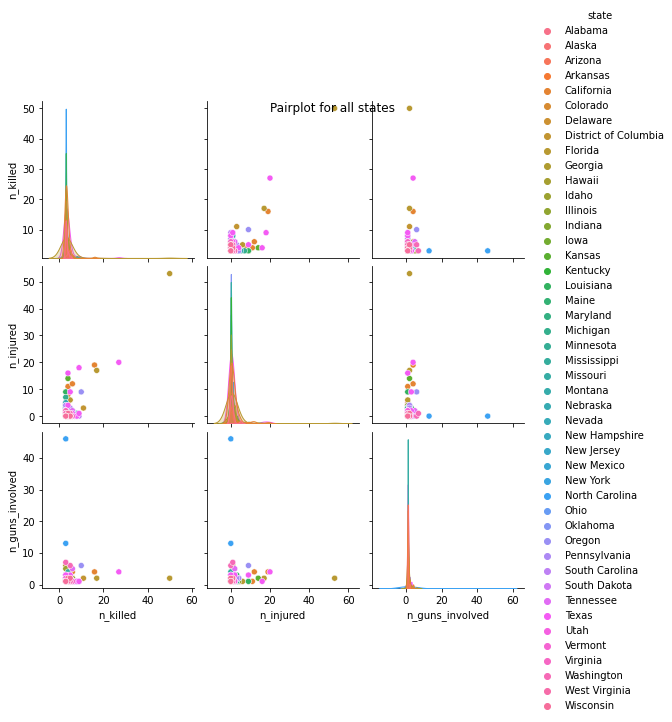

In [32]:
sns.pairplot(pair_df, kind='scatter',hue='state')
plt.suptitle('Pairplot for all states')
plt.show()

### Pair plot by state

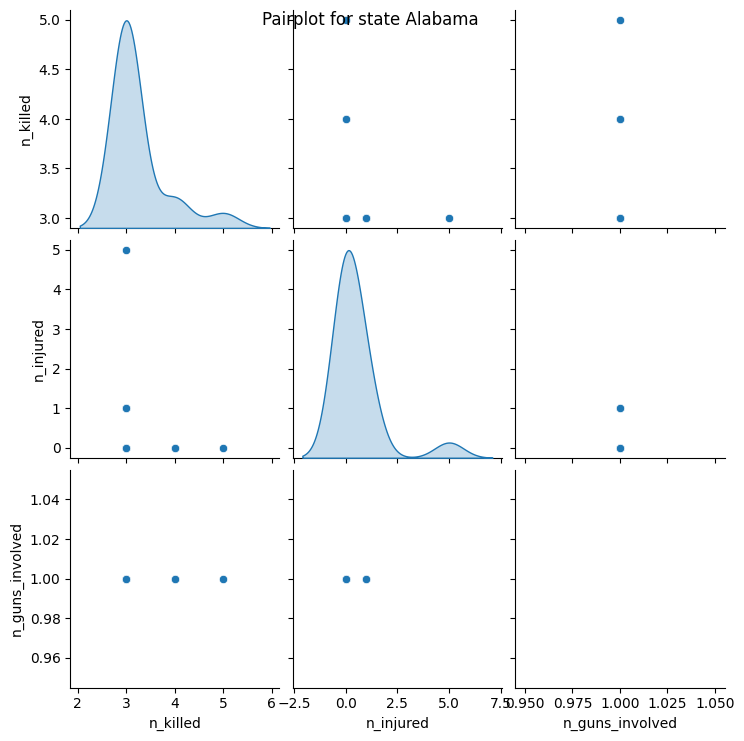

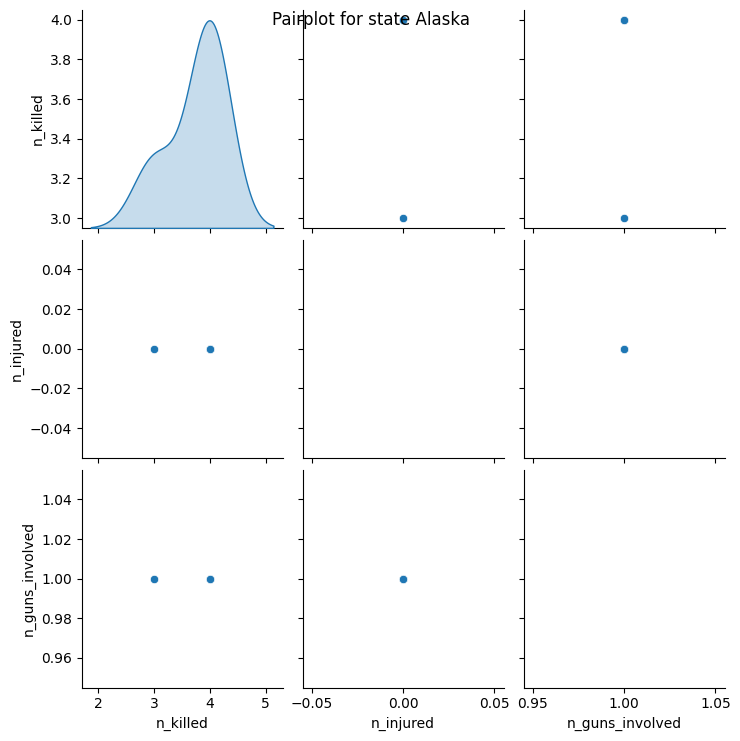

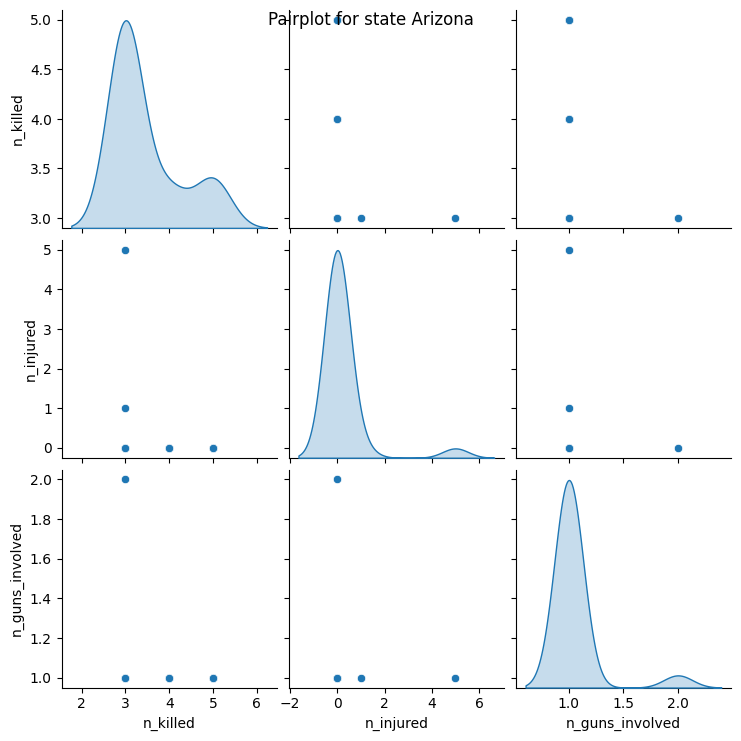

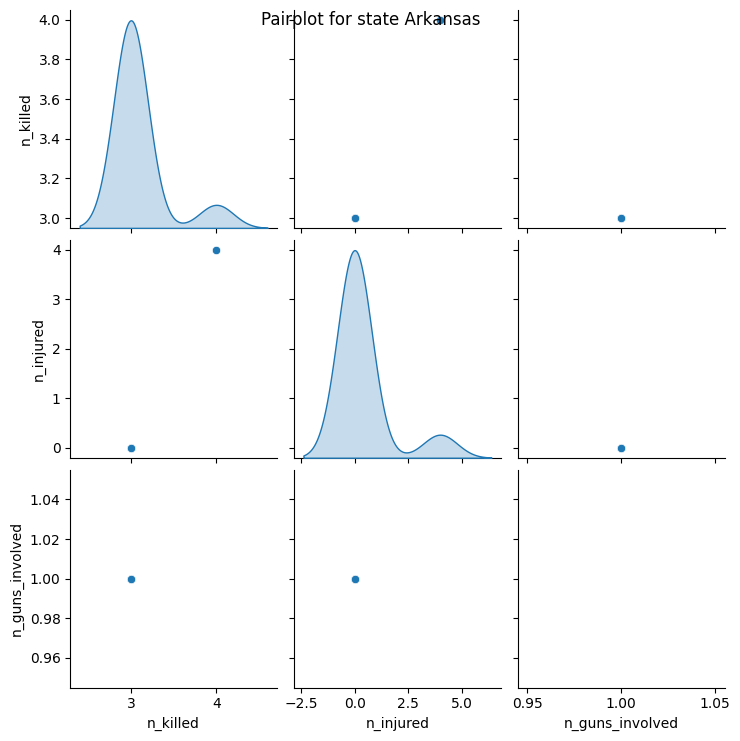

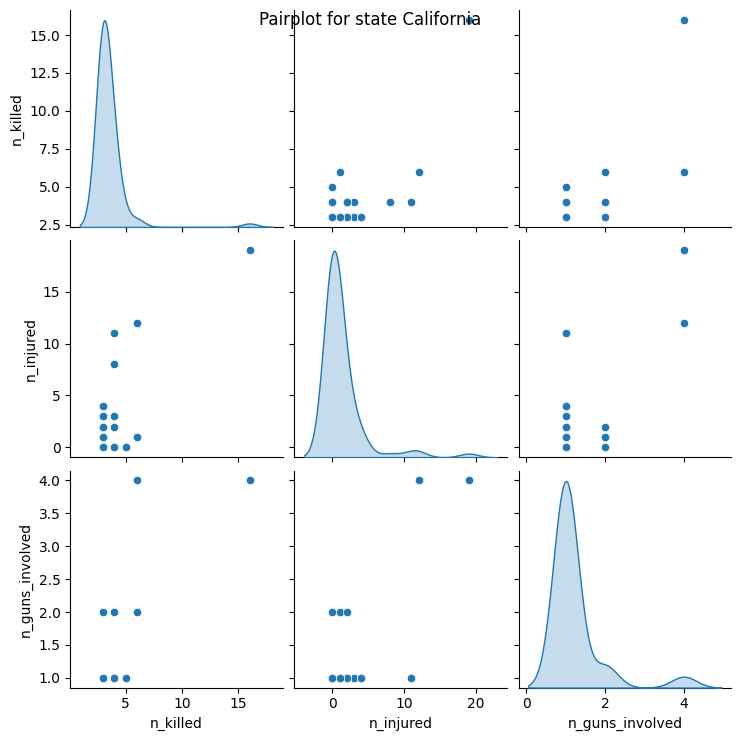

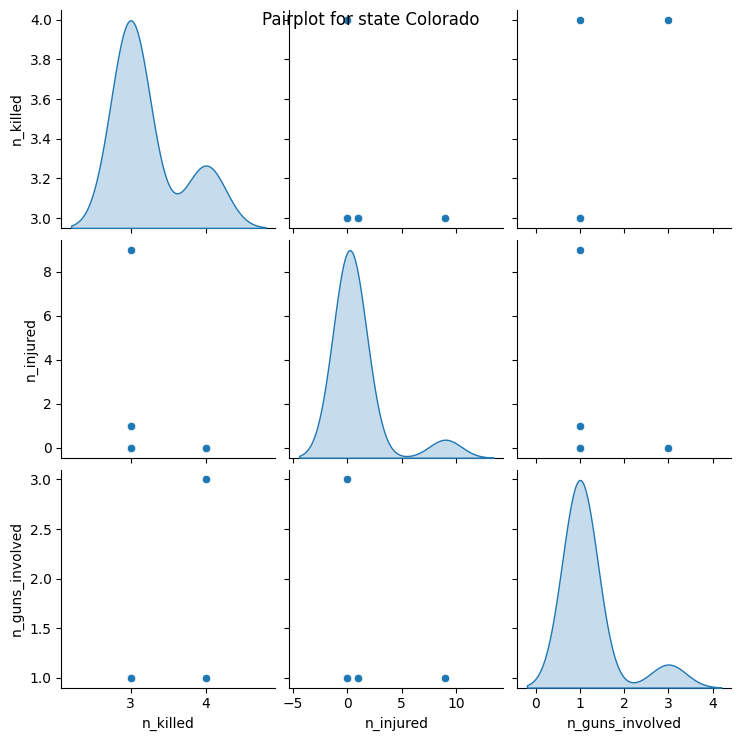

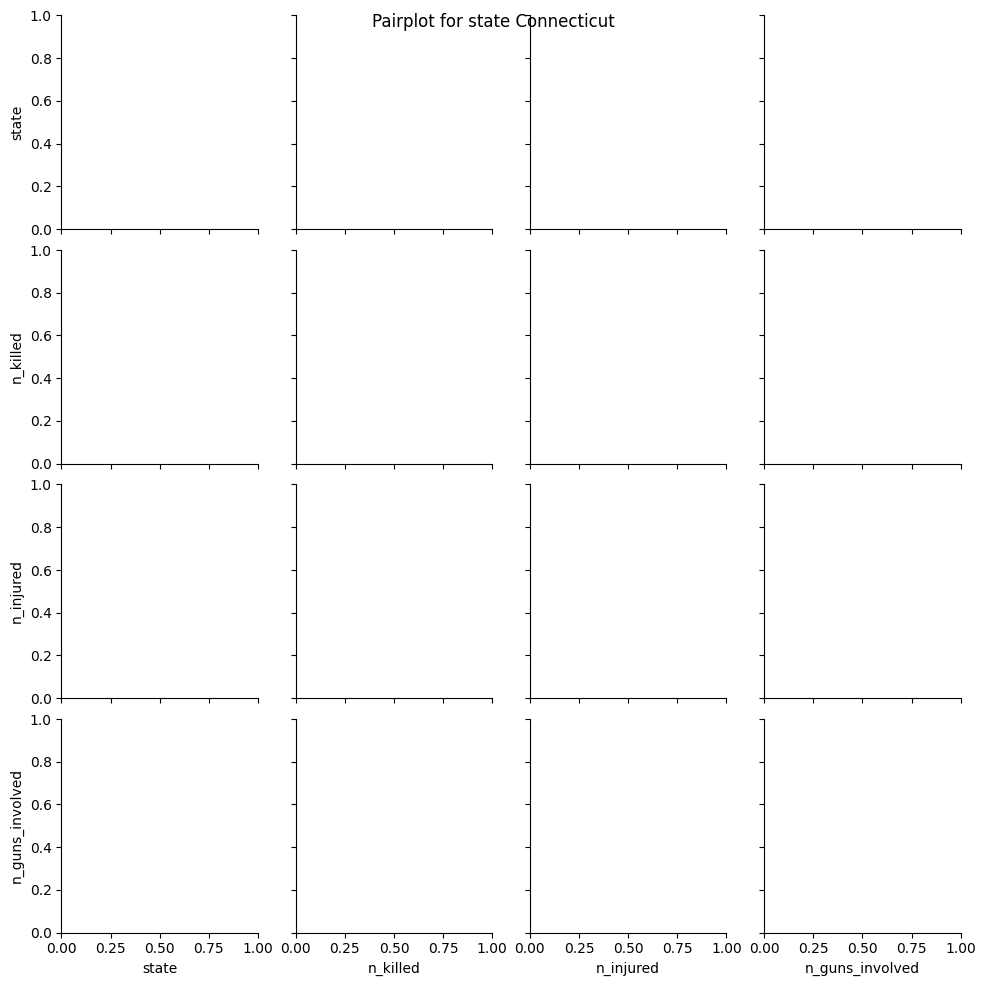

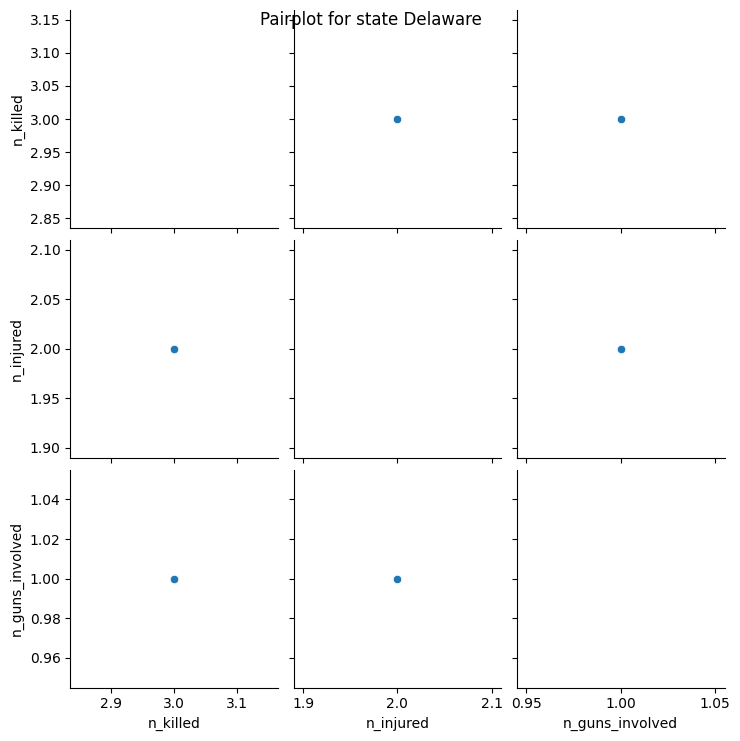

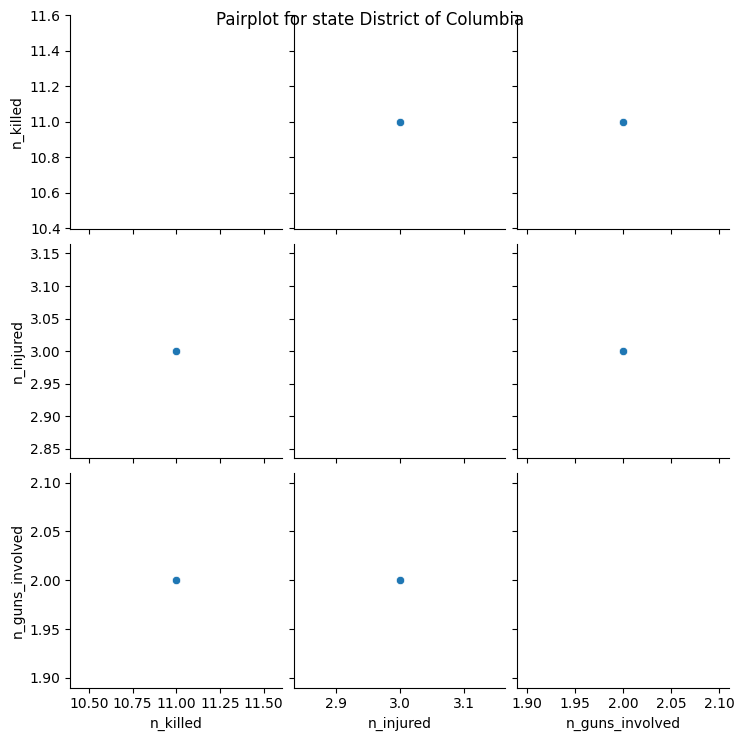

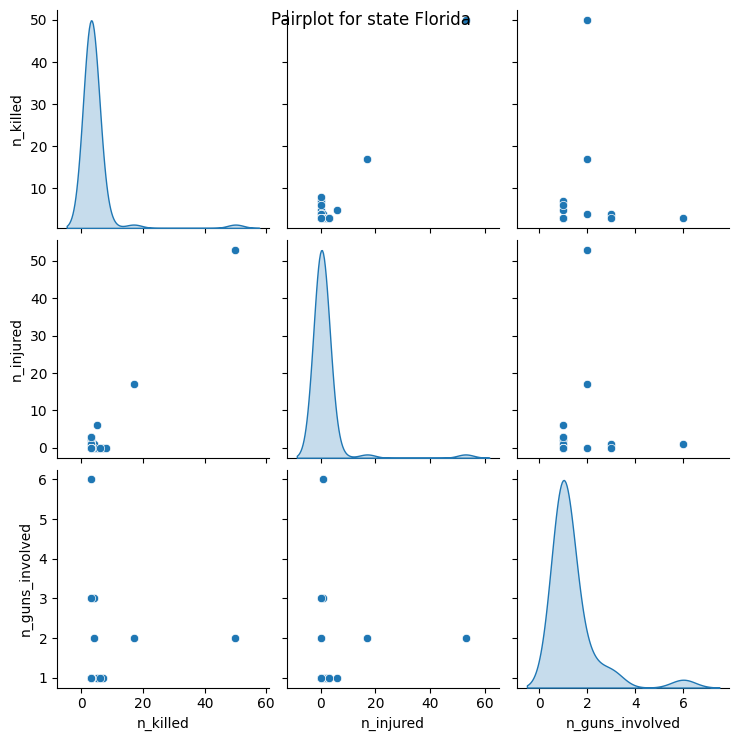

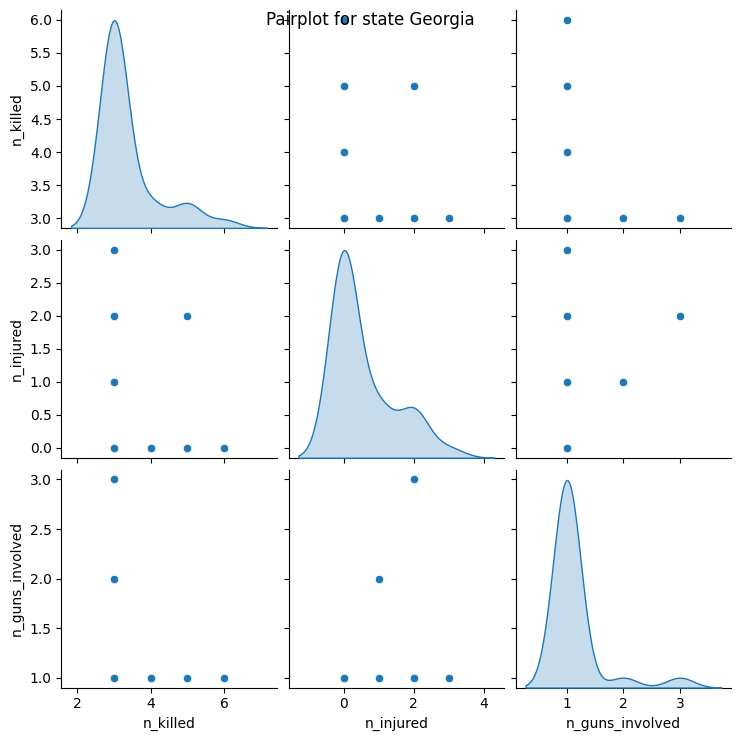

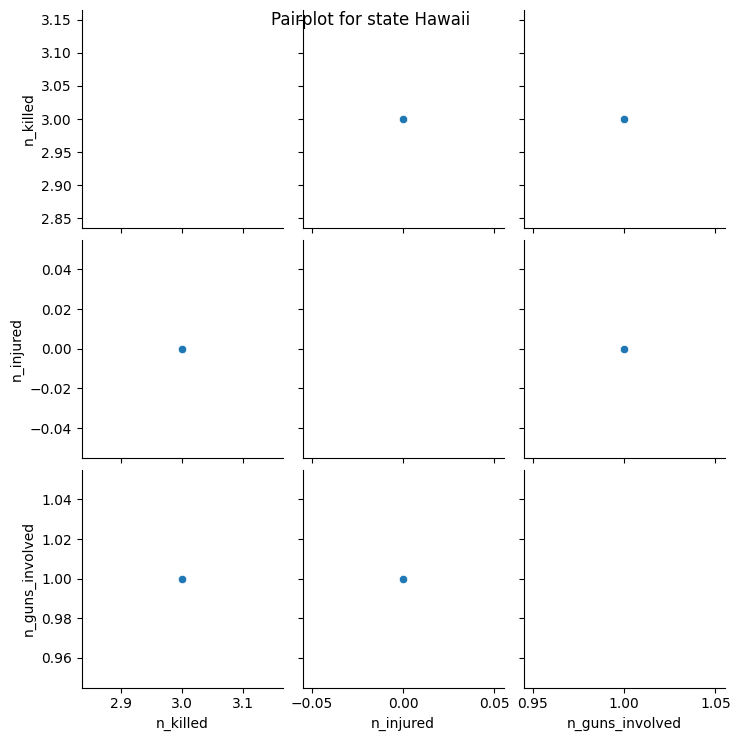

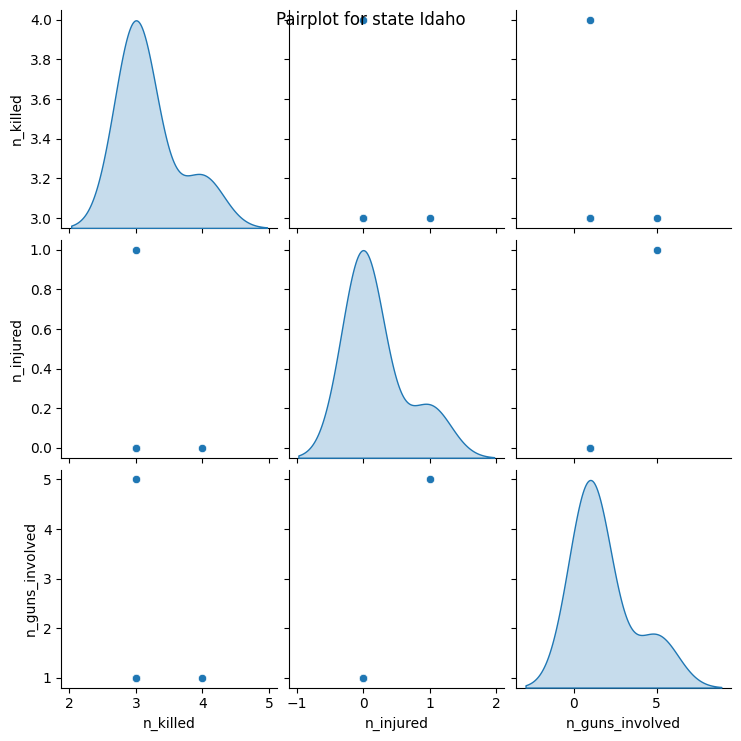

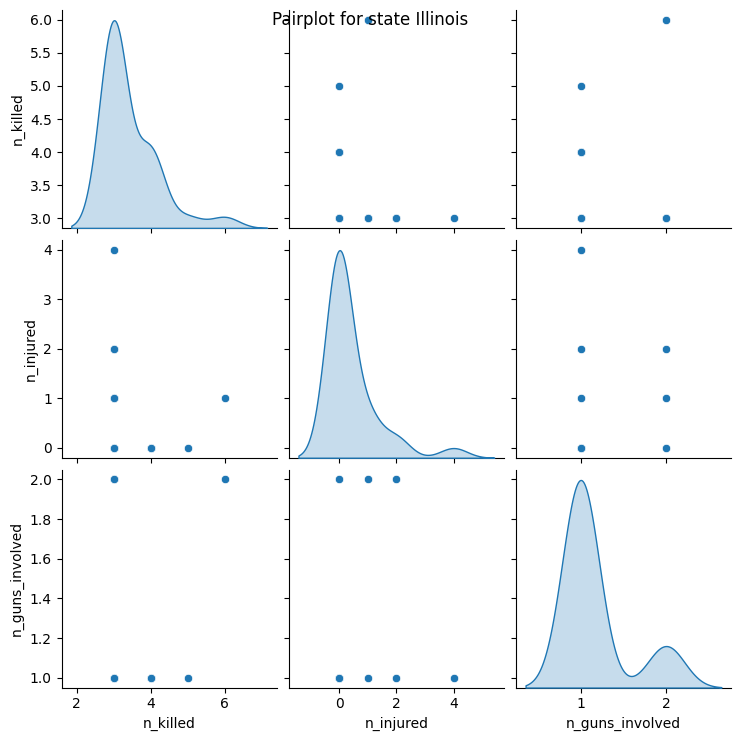

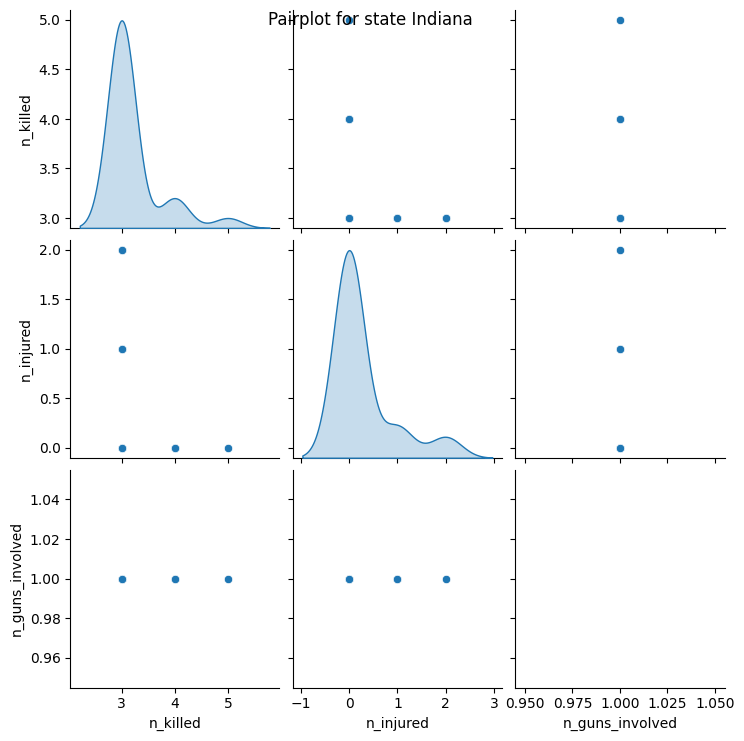

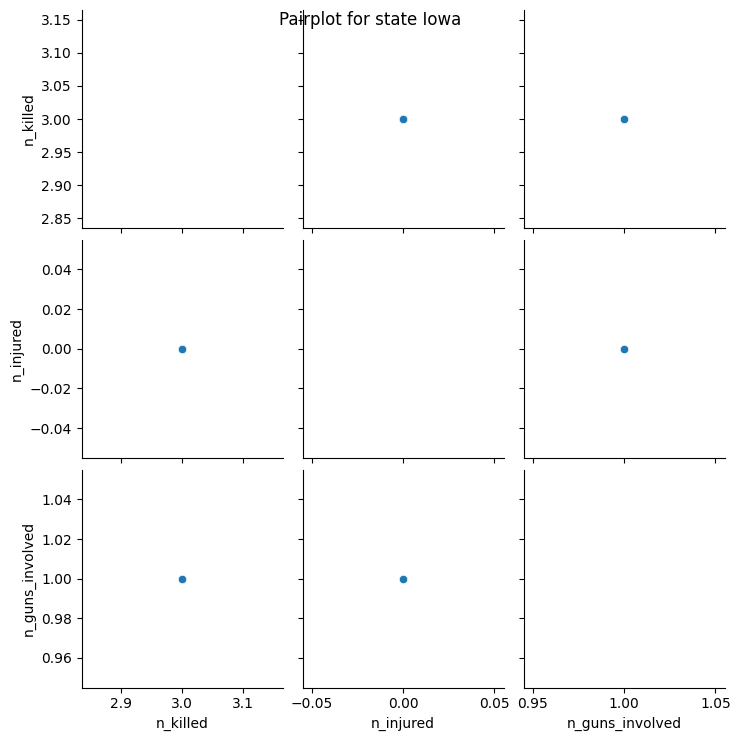

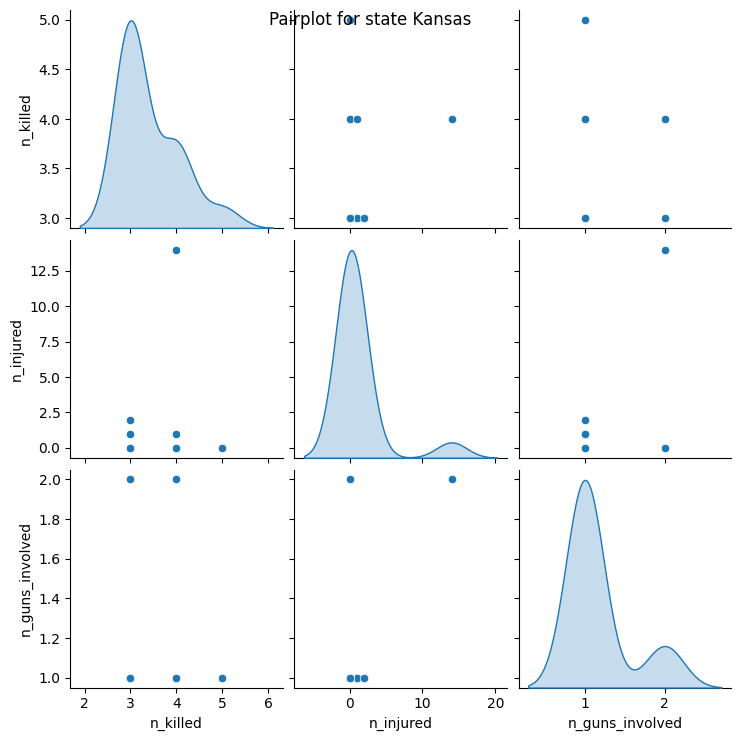

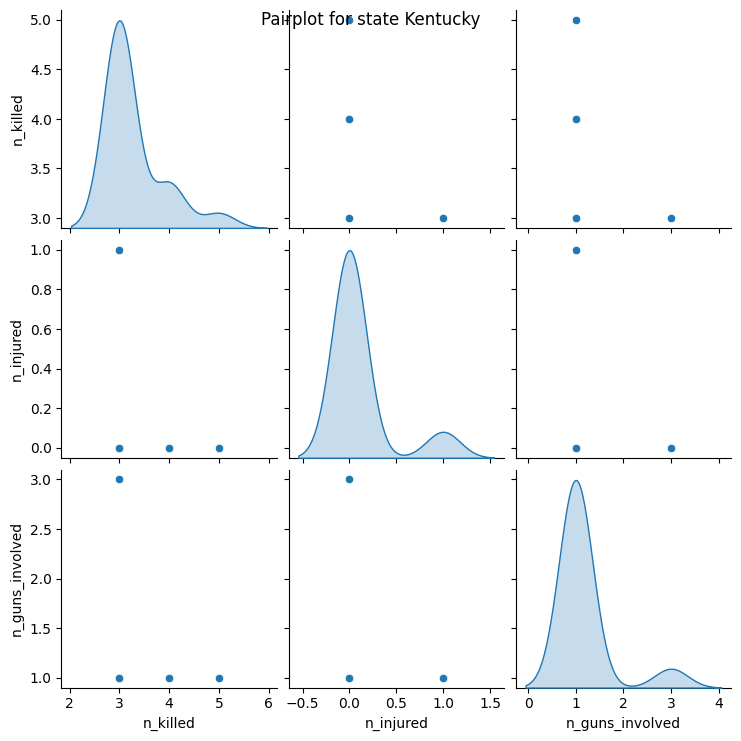

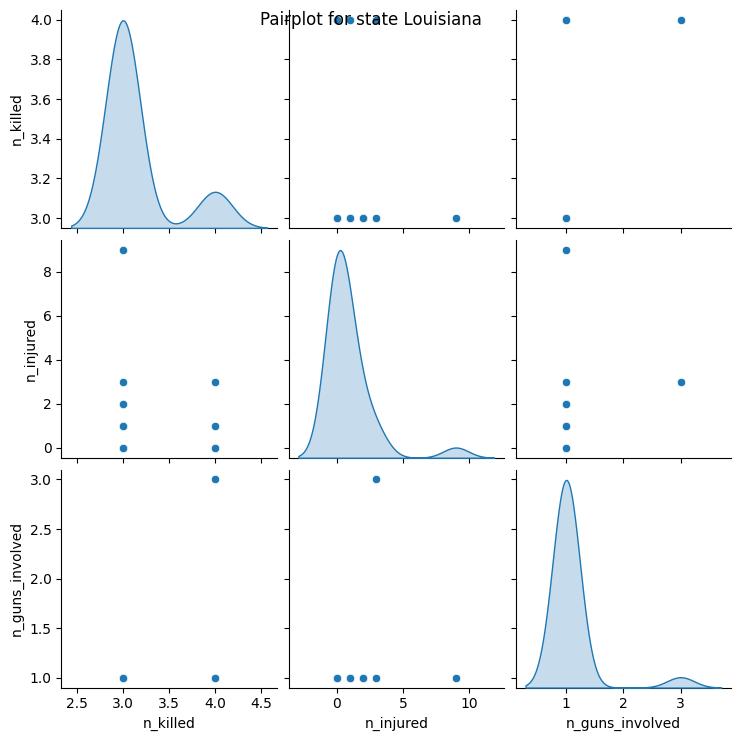

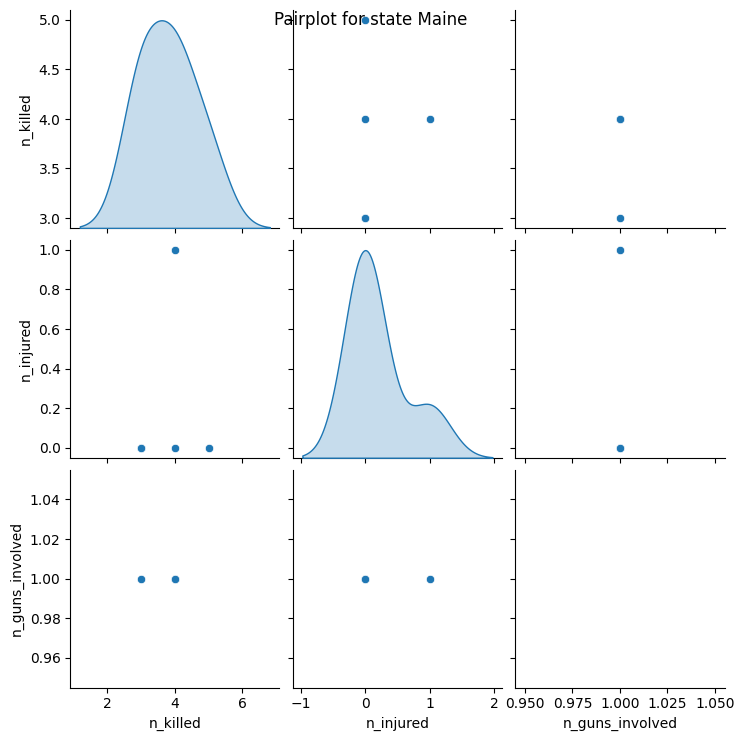

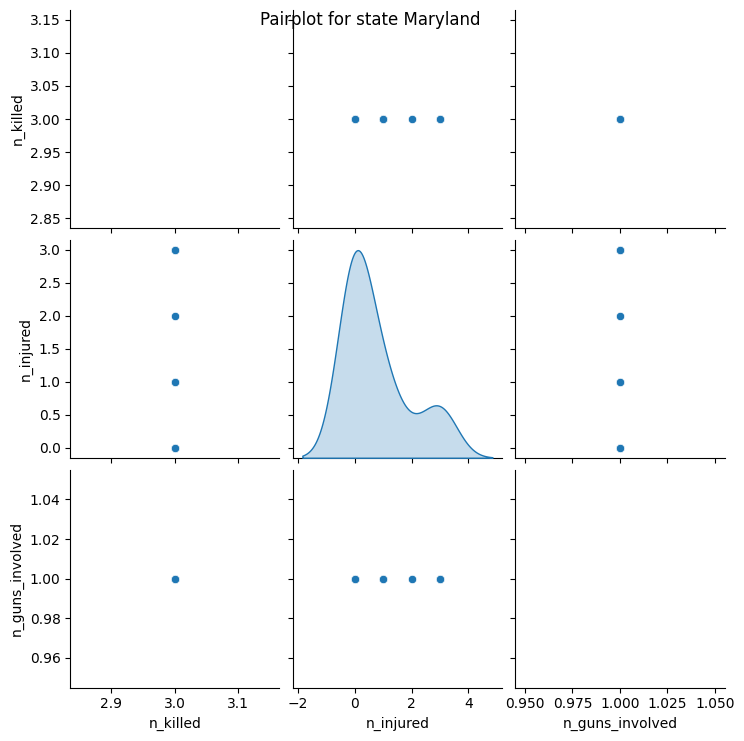

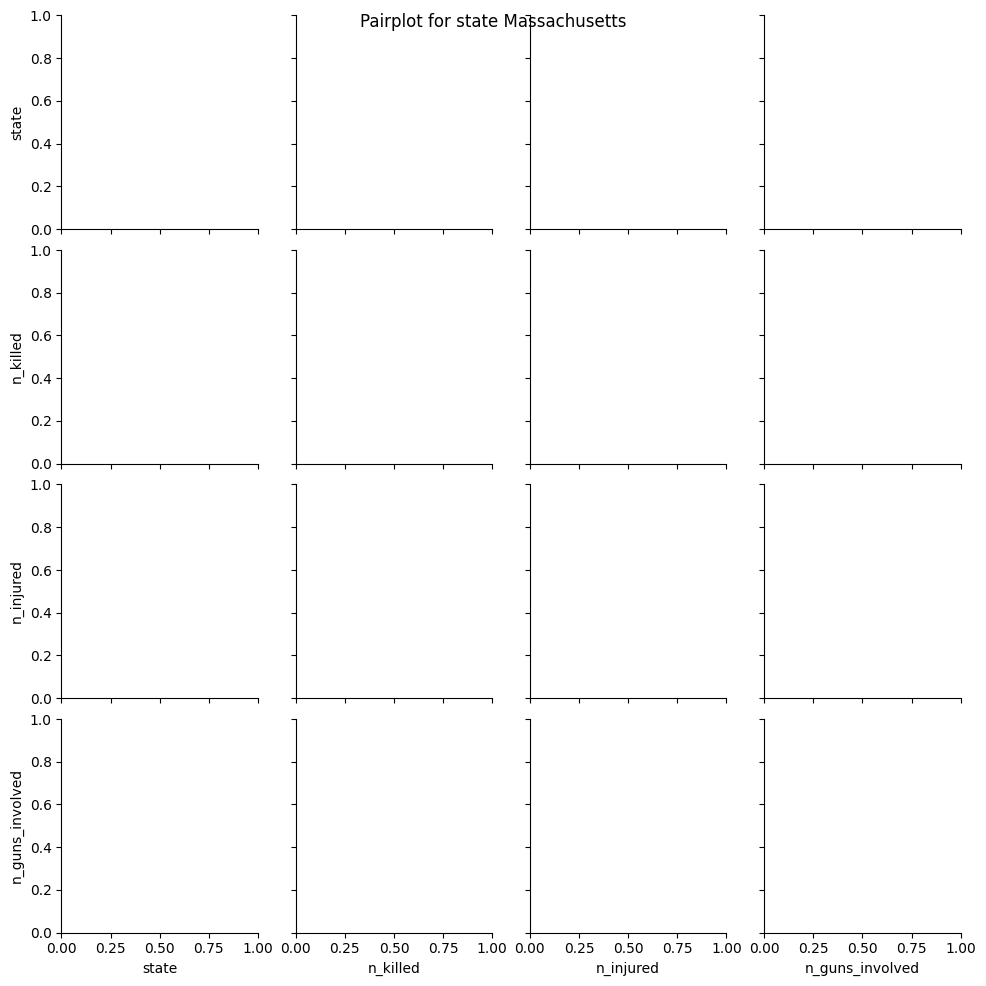

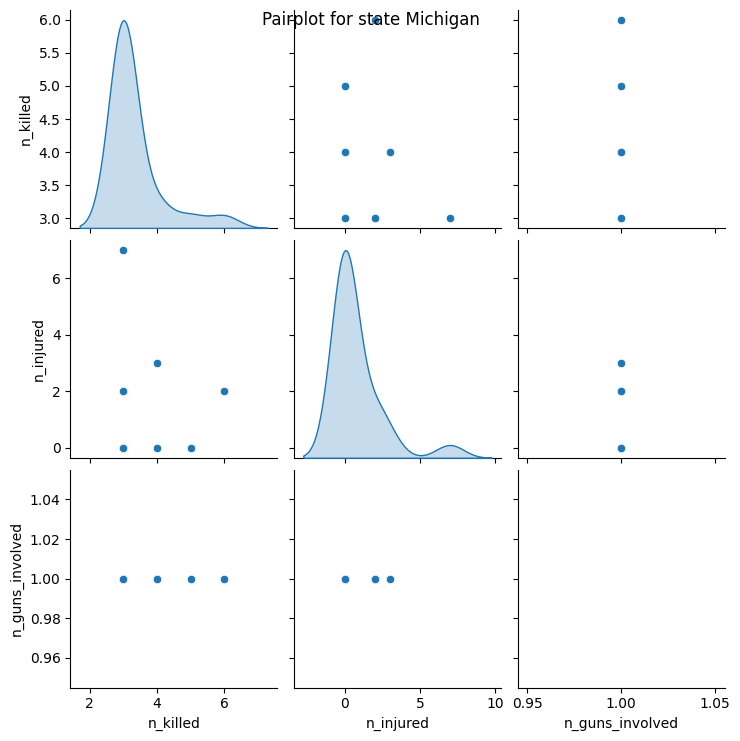

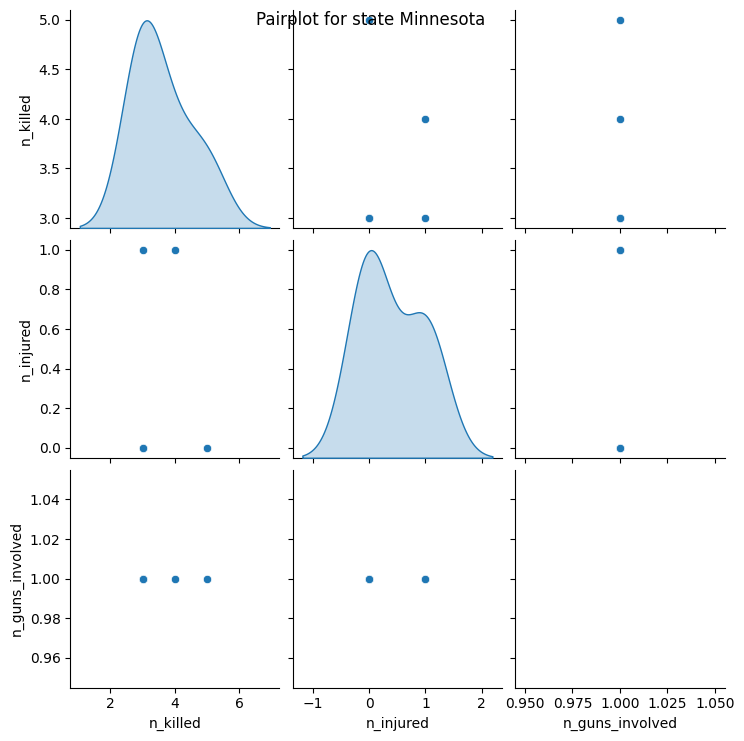

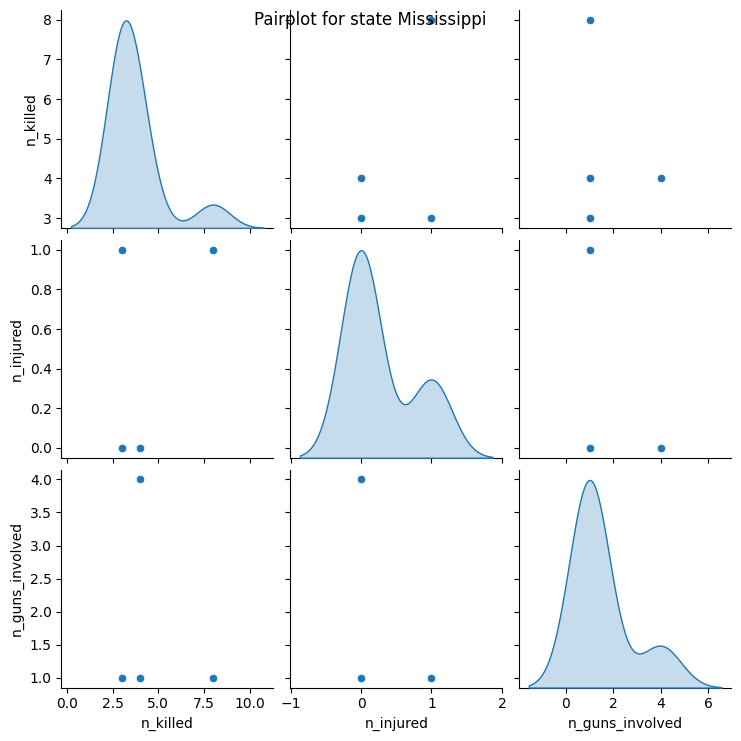

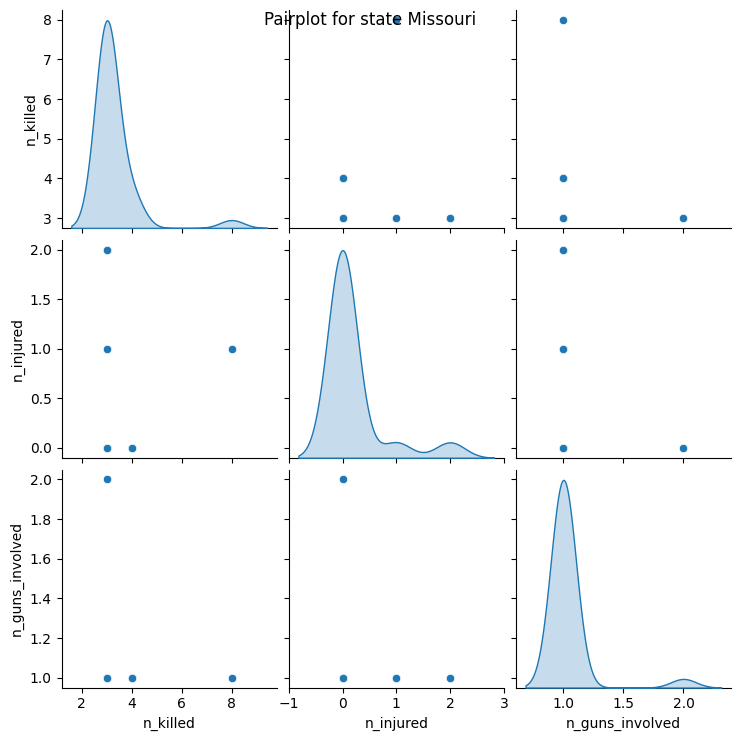

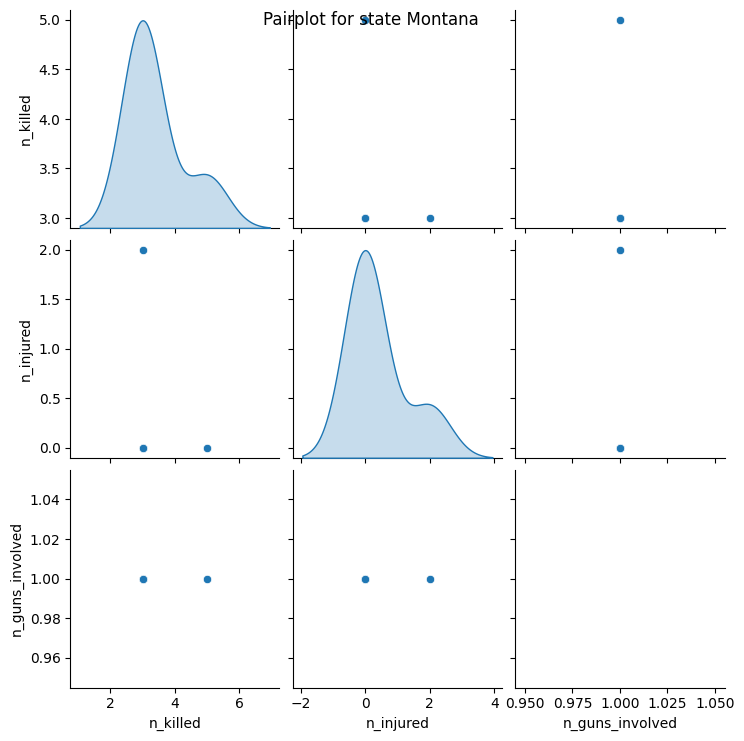

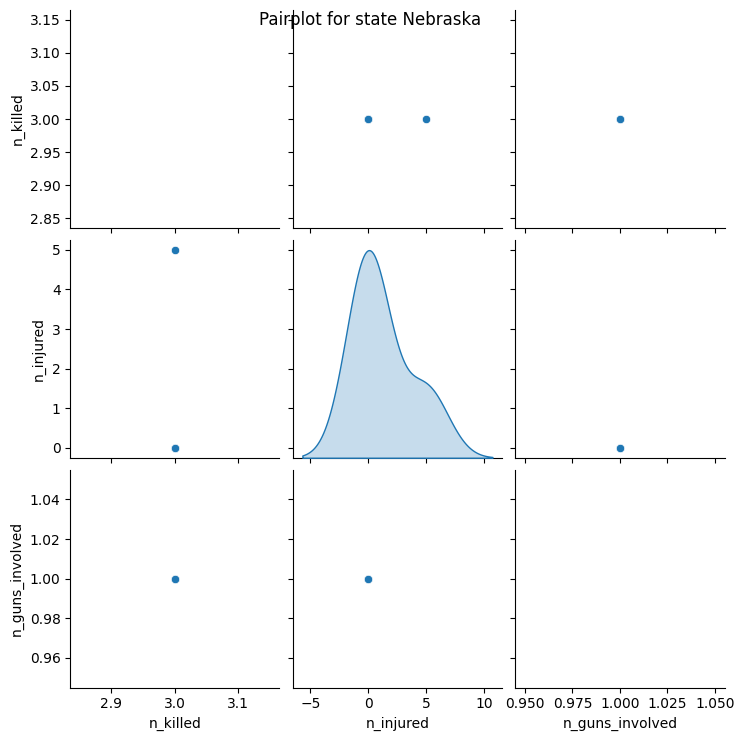

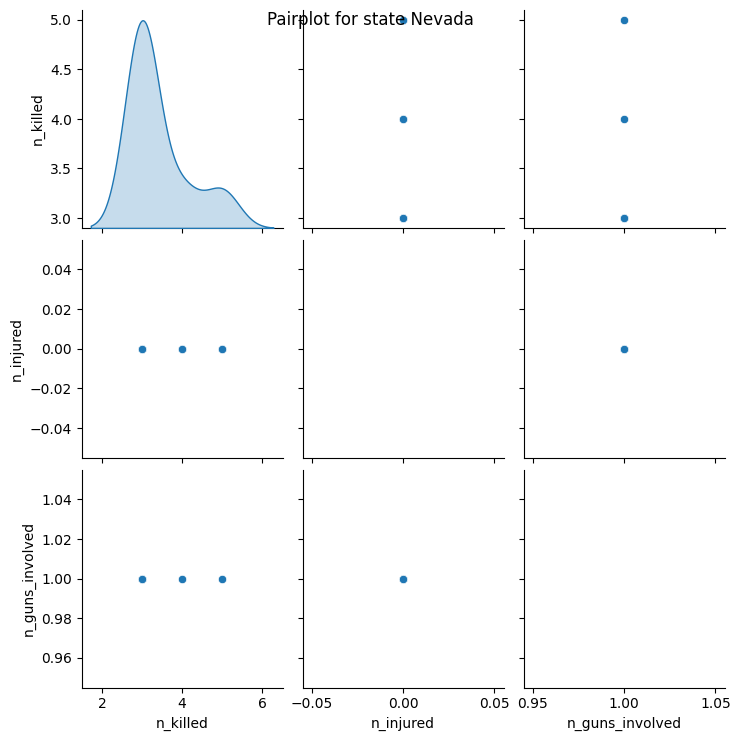

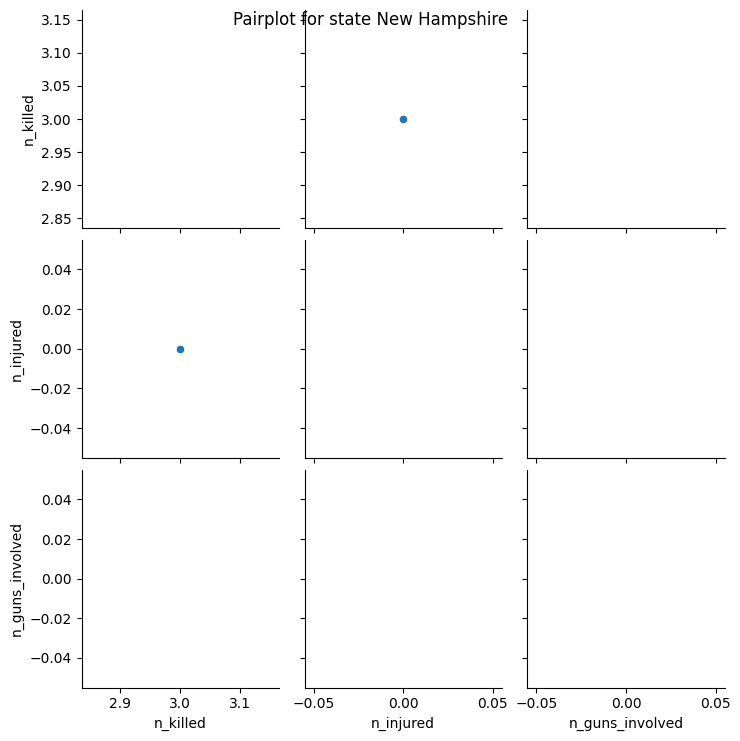

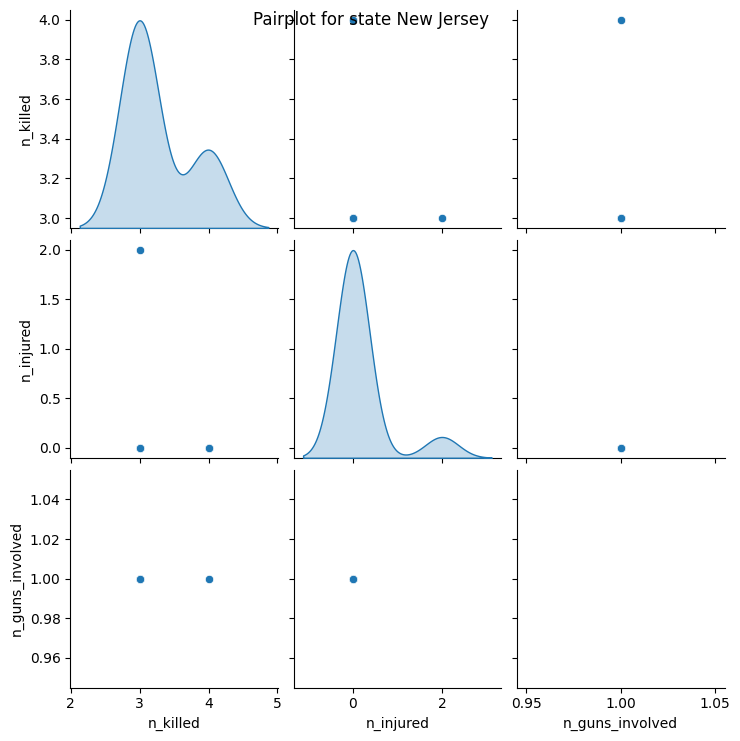

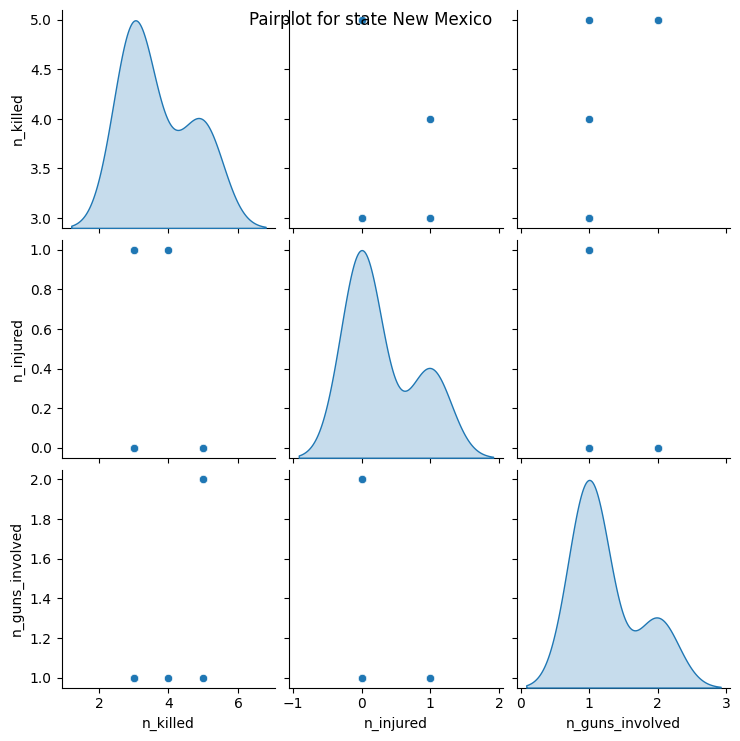

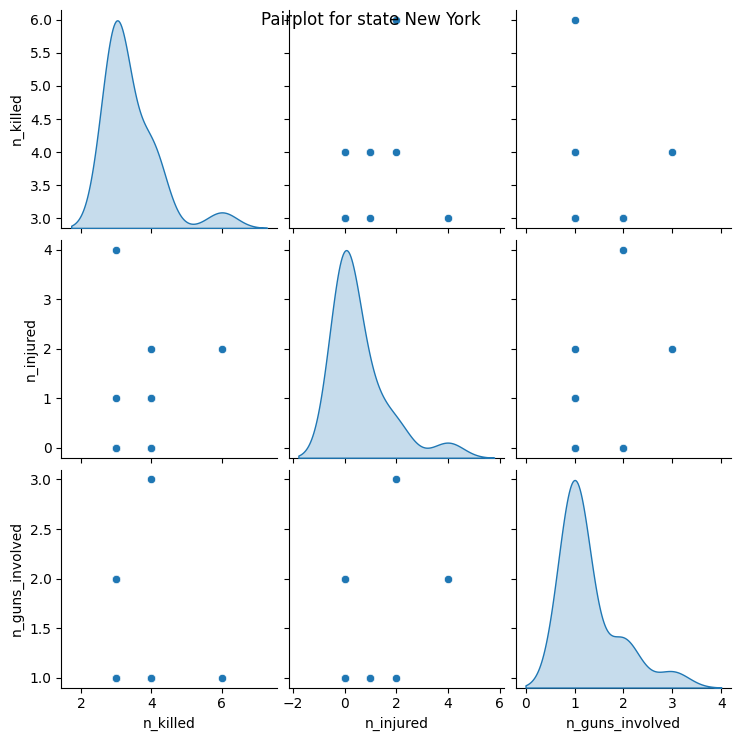

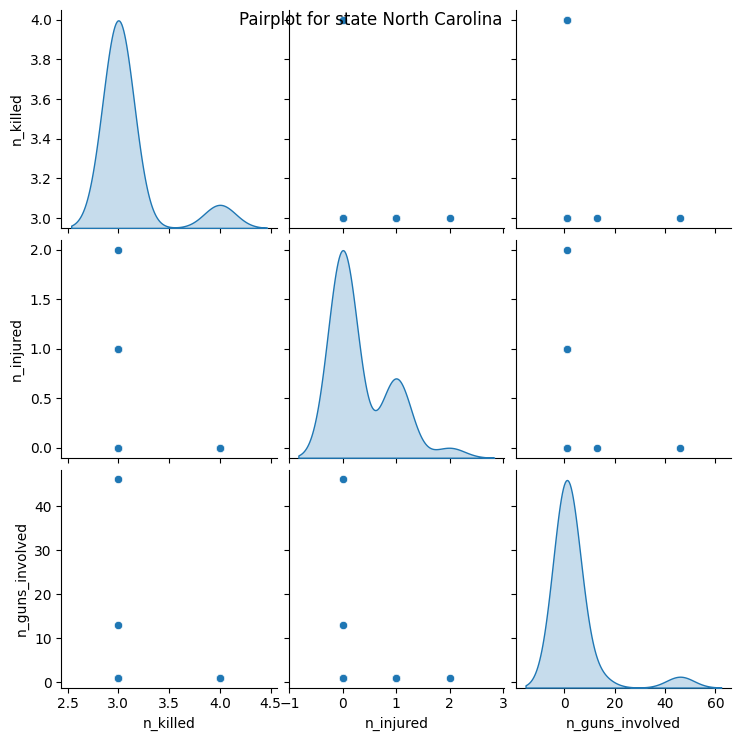

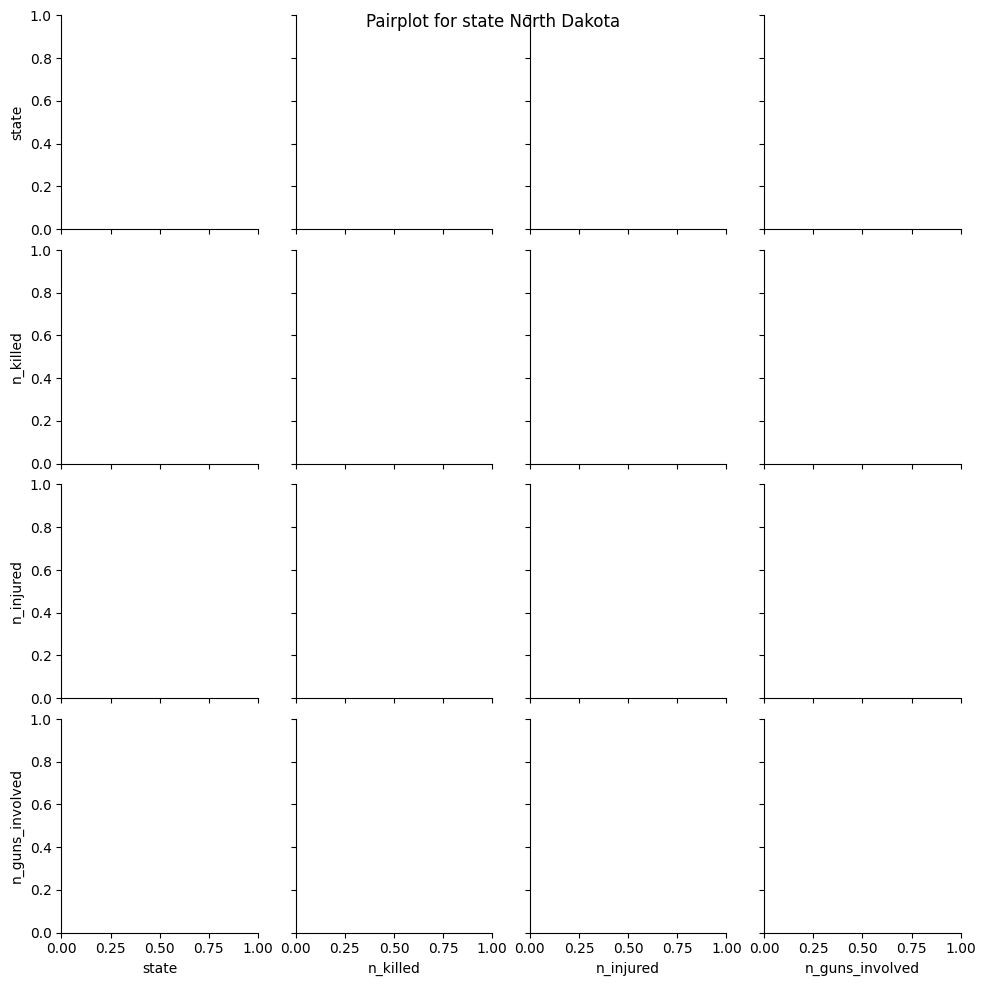

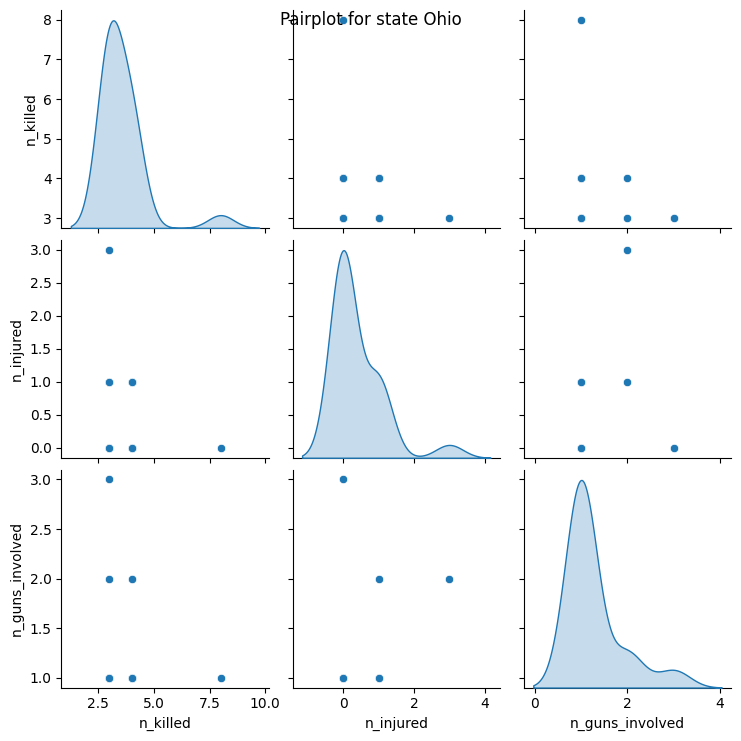

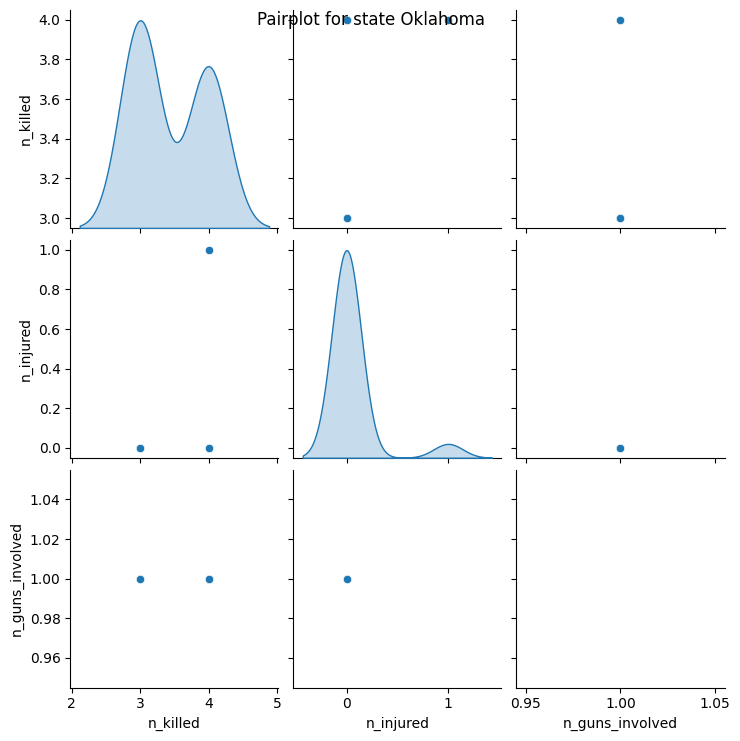

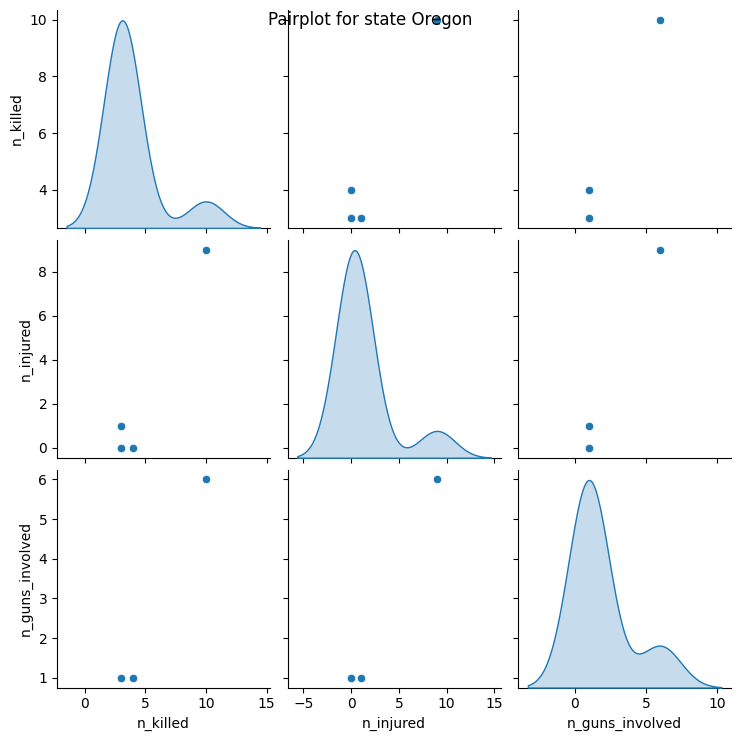

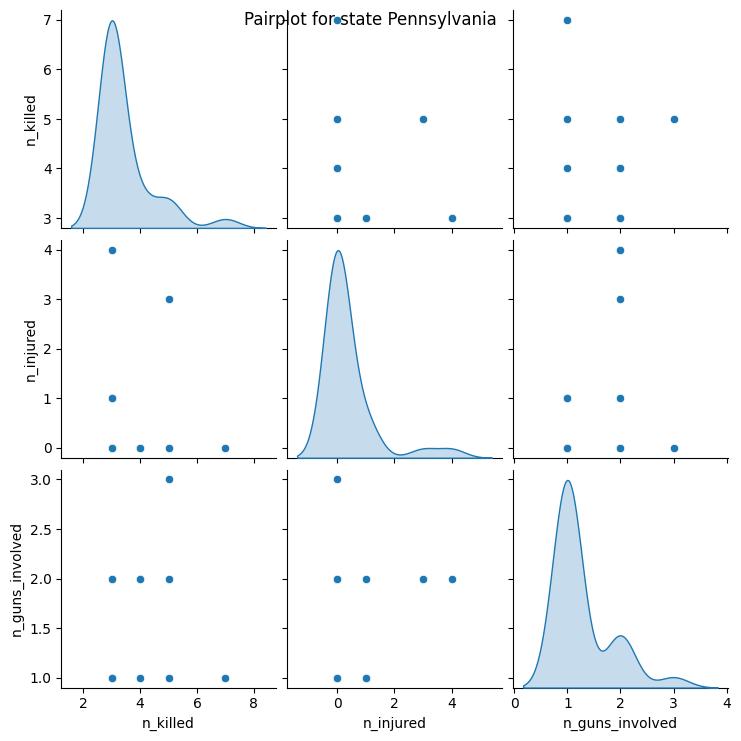

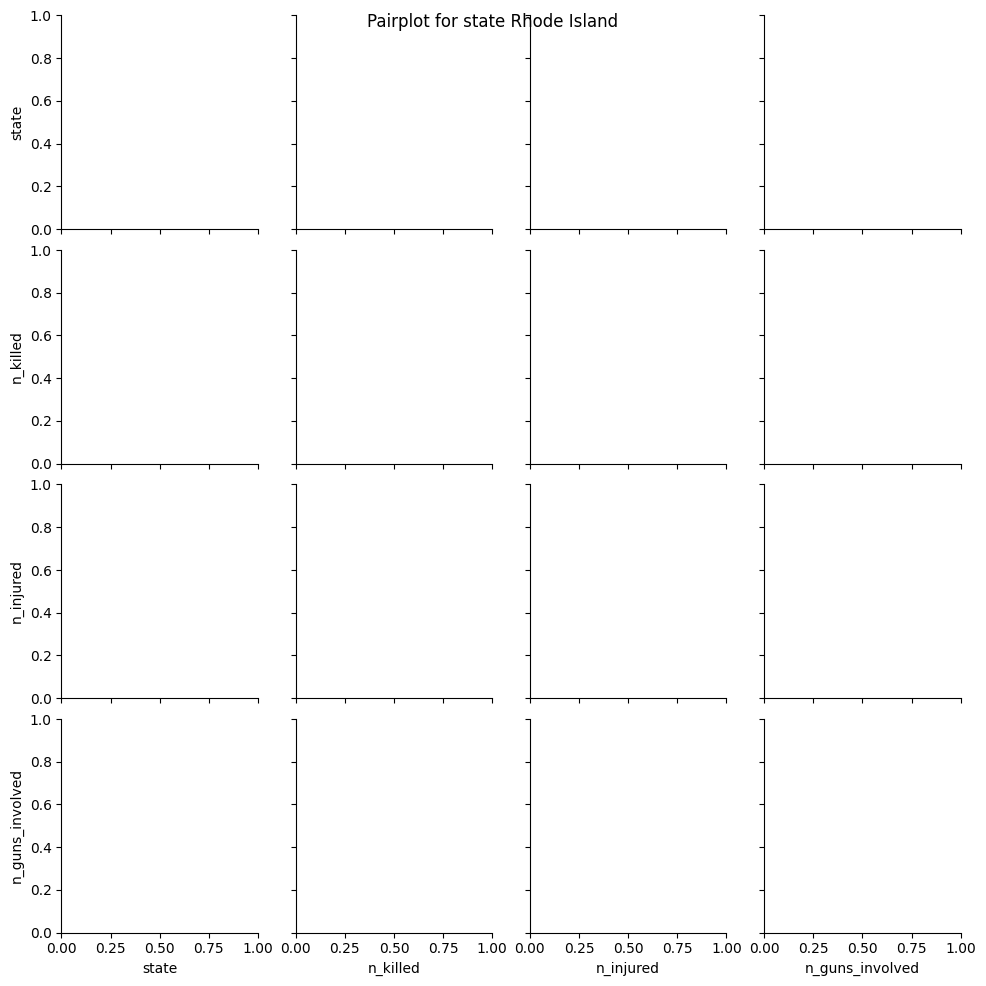

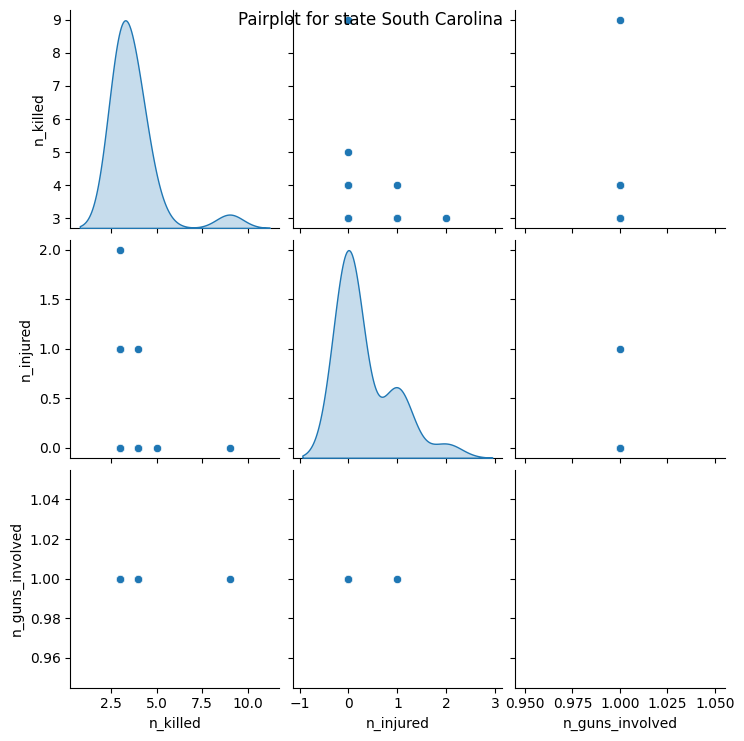

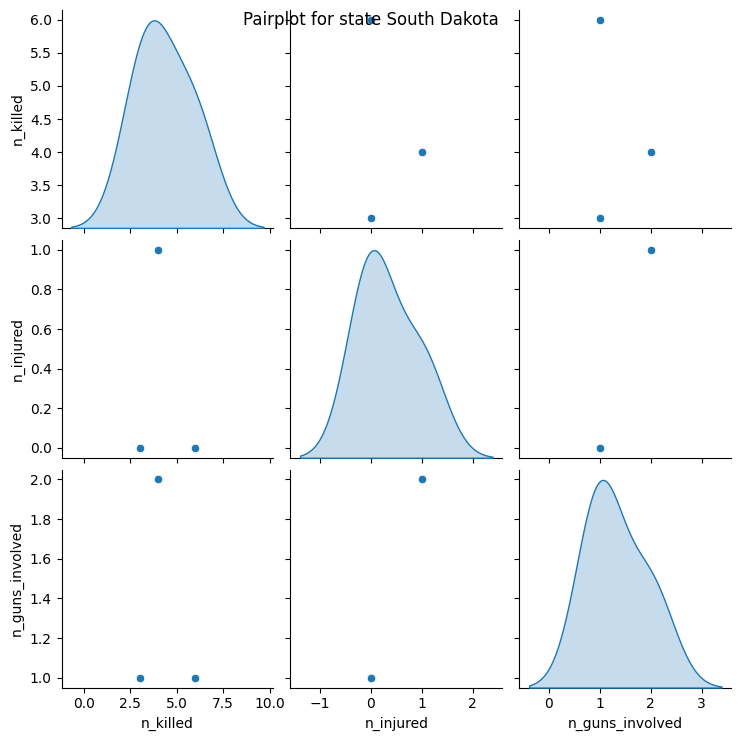

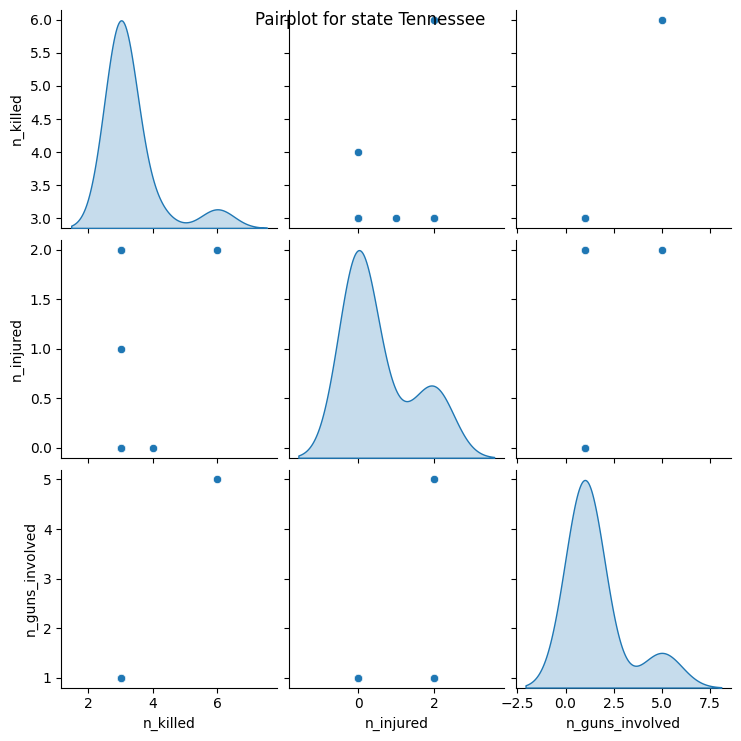

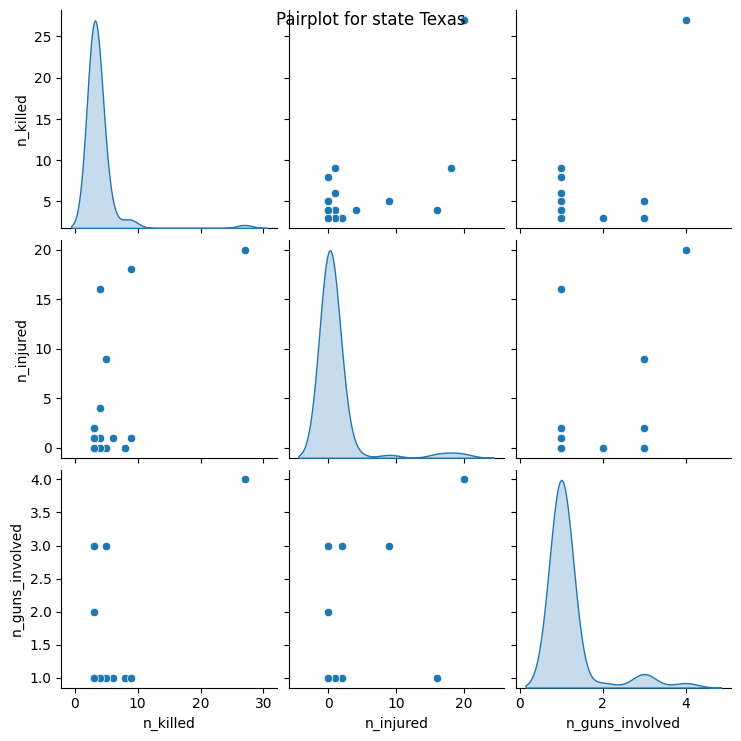

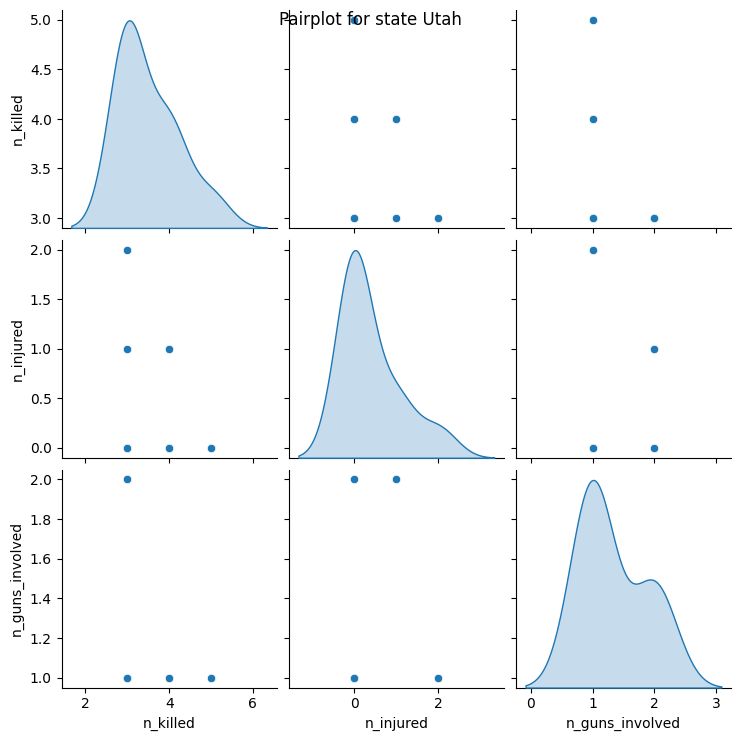

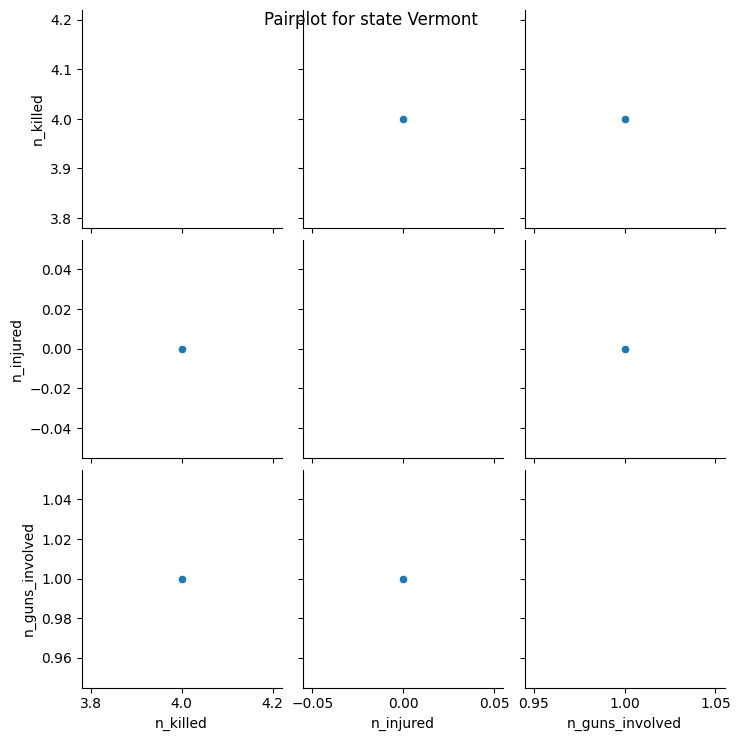

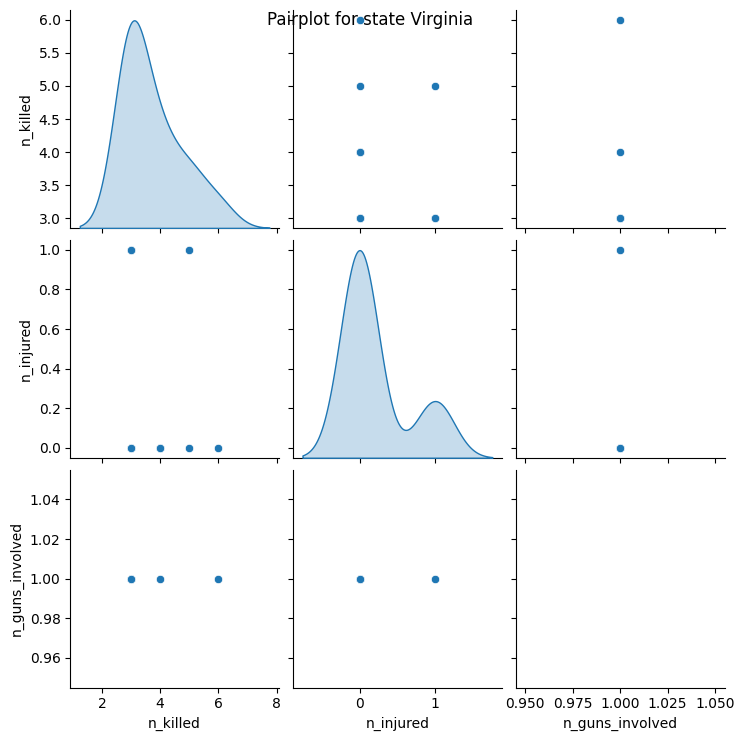

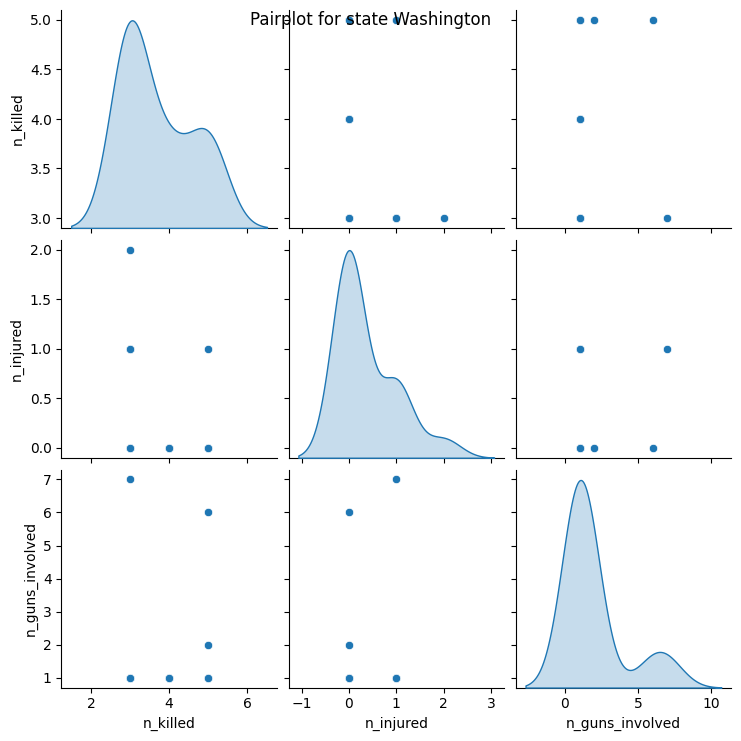

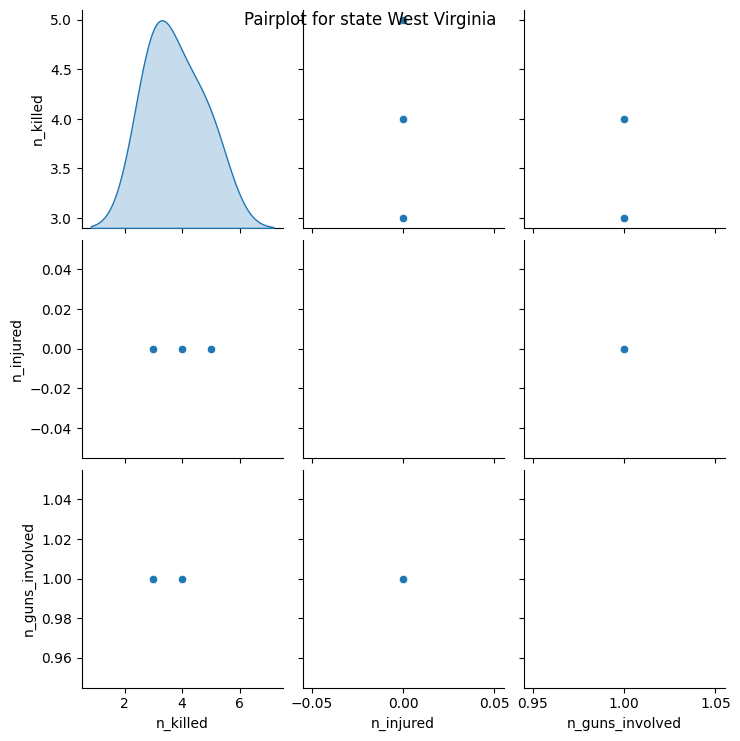

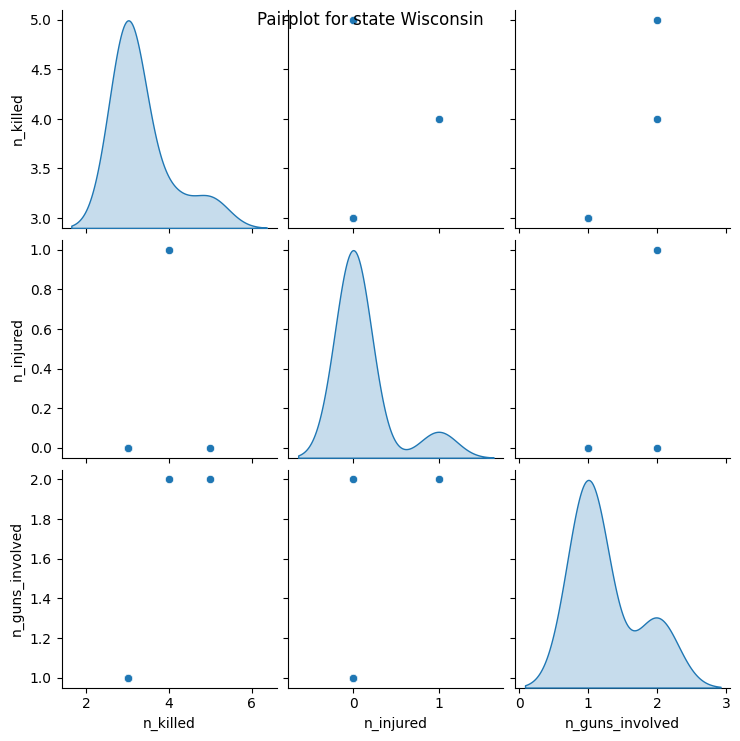

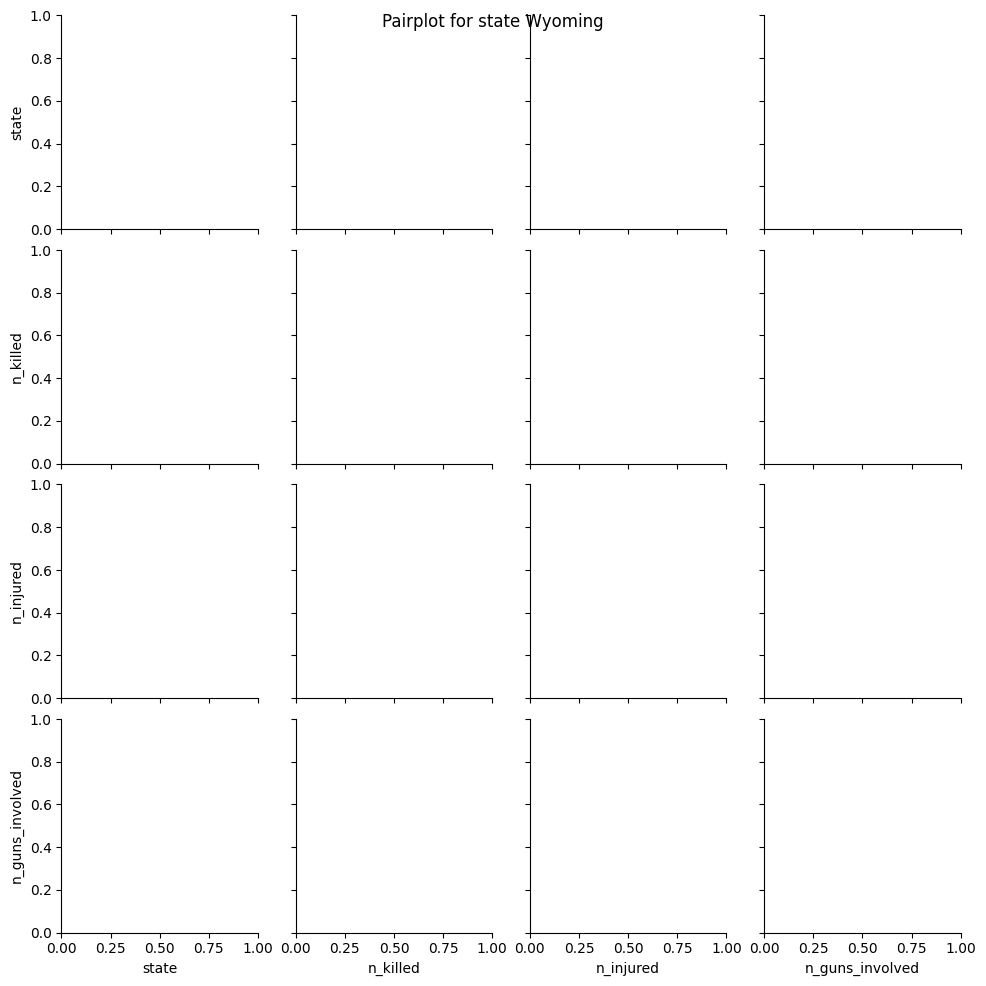

In [33]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", 
               "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", 
               "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
for state in sorted(state_names) :
    sns.pairplot(pair_df[pair_df['state']==state],kind='scatter',diag_kind='kde')
    plt.suptitle('Pairplot for state {}'.format(state))
    plt.show()

### Histogram of Guns by Type

In [35]:
Guns =["Unknown_Guns", "Handgun", "Shotgun", "Rifle", "Other", "Automatic"]
c=[]
for gun in Guns:
    c.append(gun_df[gun].sum())
dict1 = {'Gun':Guns, 'Count':c}
gun_typedf=pd.DataFrame.from_dict(dict1)

Text(0.5, 0, 'Gun Type')

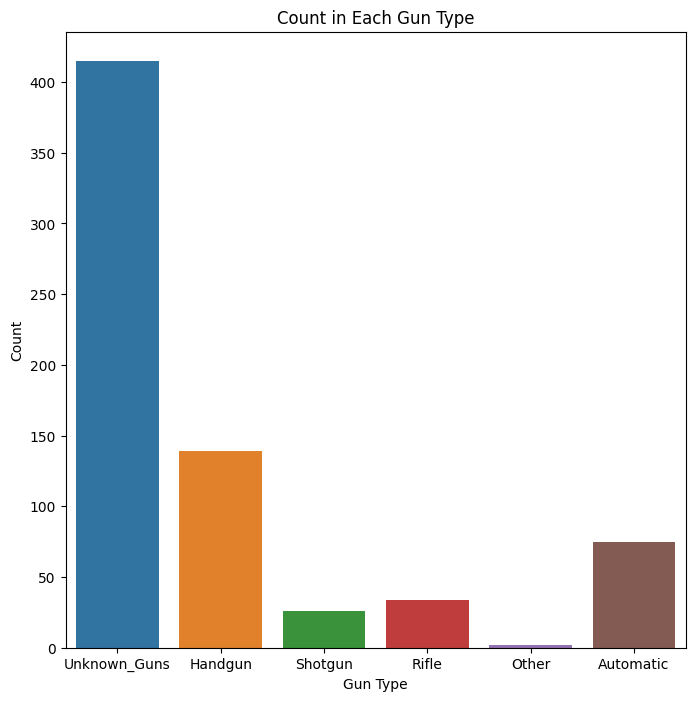

In [36]:
plt.figure(figsize= (8,8))
sns.barplot(x="Gun", y = "Count", data = gun_typedf).set(title="Count in Each Gun Type")
plt.xlabel("Gun Type")


As noted at the top of the code, we decided to shift our focus from our research question around the gun types to more of an EDA-approach due to the vast number of unknown guns in comparison to known gu types. 

### Longitude vs Latitude by Number Killed

#### USA Map

Text(0.5, 0.98, 'Comparison of Number of Killed by Longitude and Latitude')

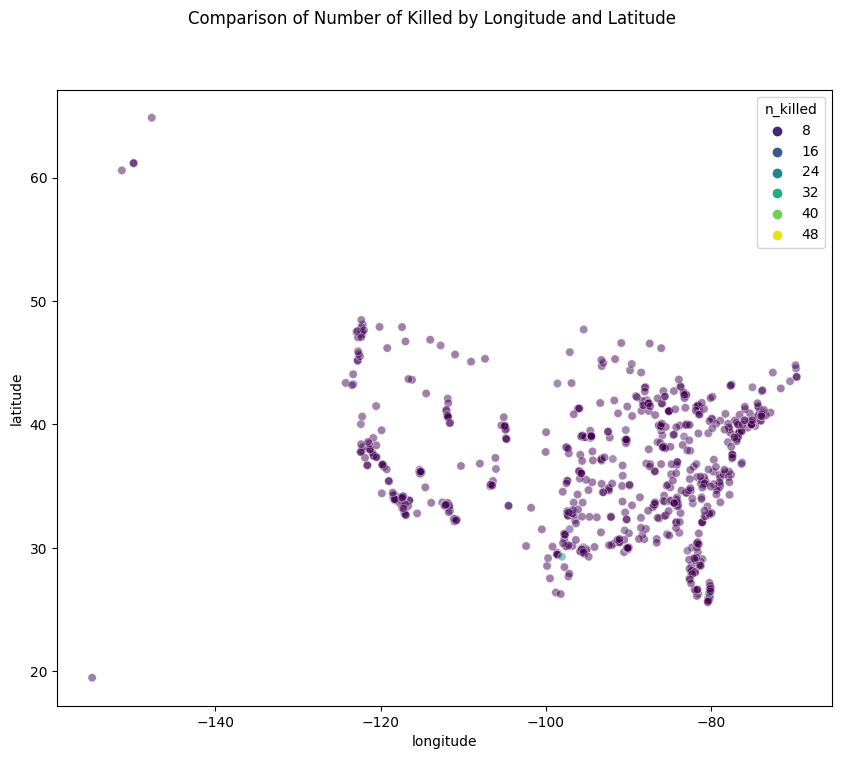

In [37]:
plt.figure(figsize= (10,8))
sns.scatterplot(data = gun_df, x="longitude", y="latitude", hue="n_killed",
                    palette="viridis", alpha=0.5)
plt.suptitle(f"Comparison of Number of Killed by Longitude and Latitude")

We can see there are a very few incidents in Alaska and Hawaii, and the incidents tend to cluster around the eastern half of US and the West Coast. It's difficult to see a non-purple dot on the map, but there is a turquoise dot in Texas and a blue-ish dot in Florida that is being buried by a lot of purple dots. There are no obvious outlier. 

#### By State

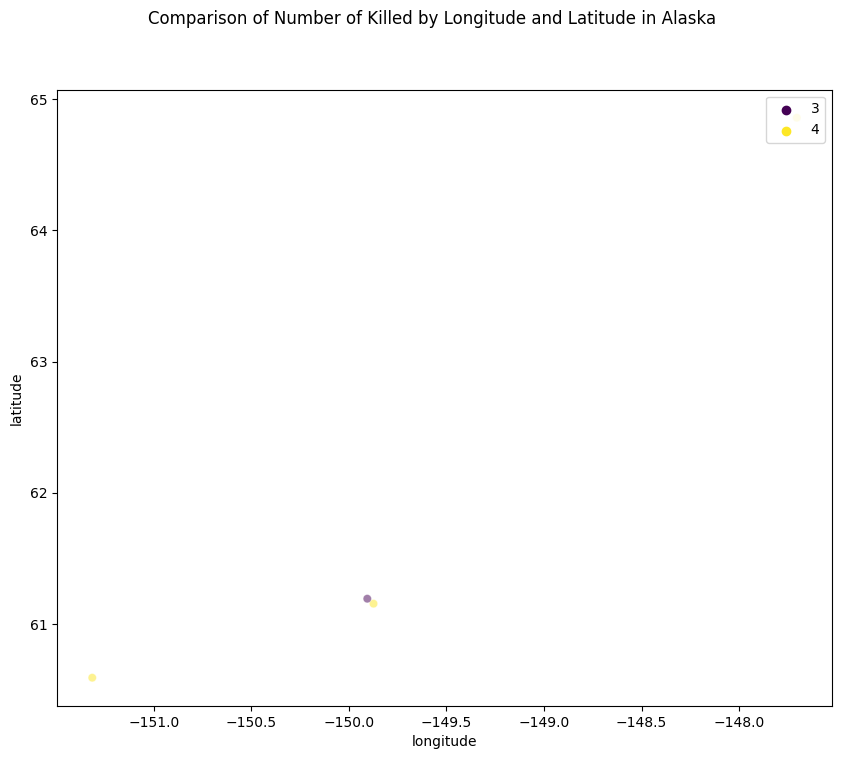

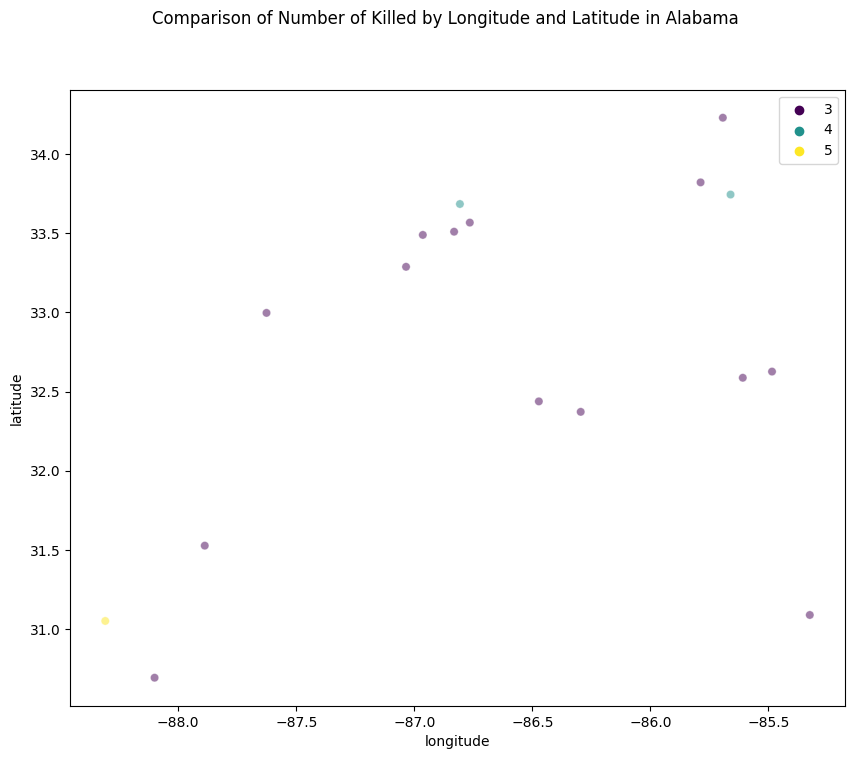

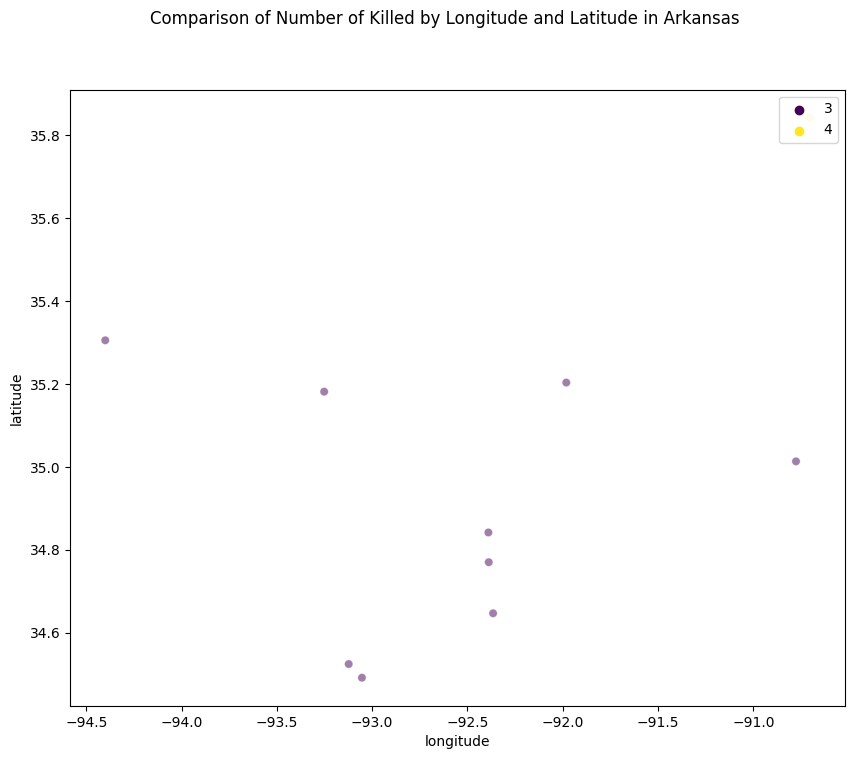

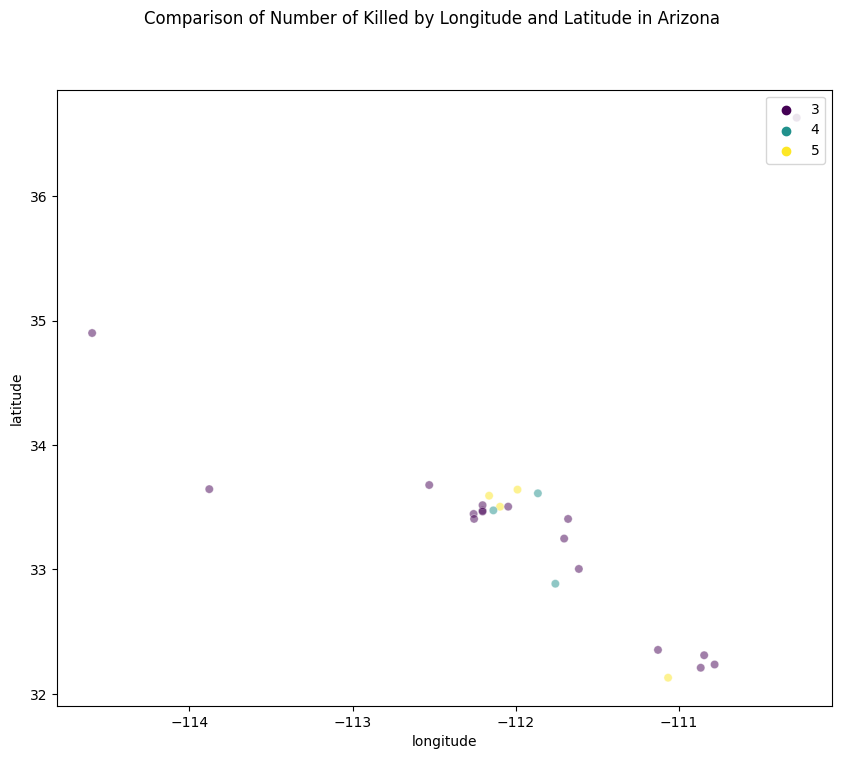

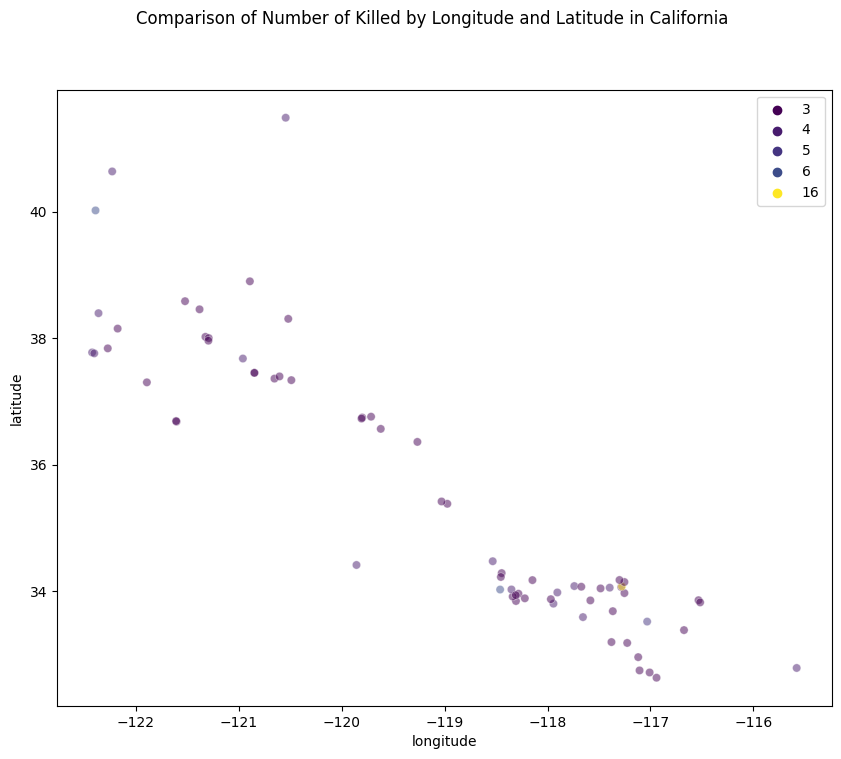

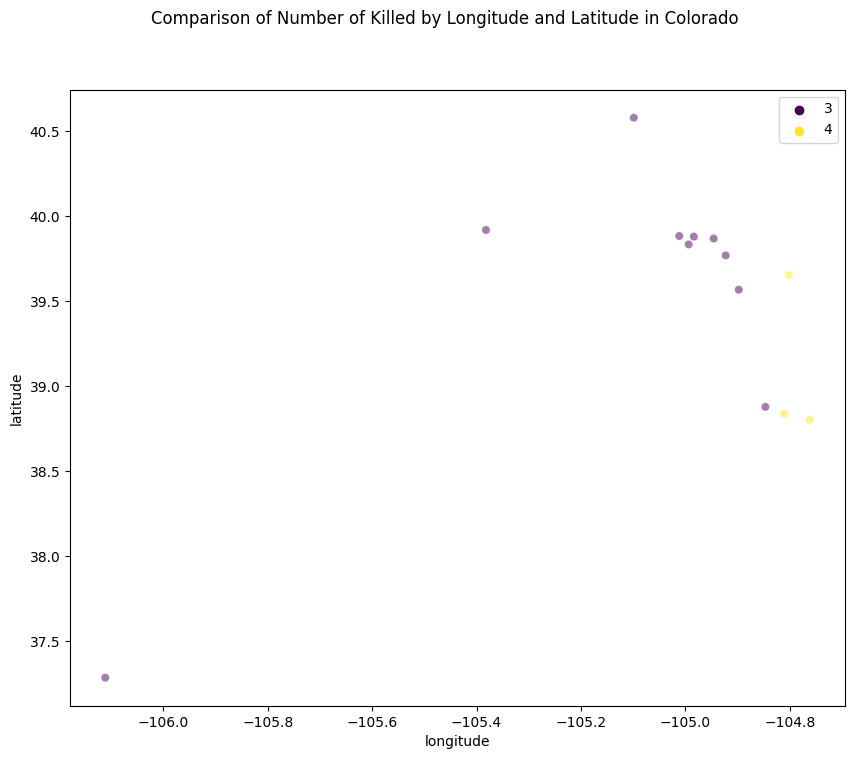

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


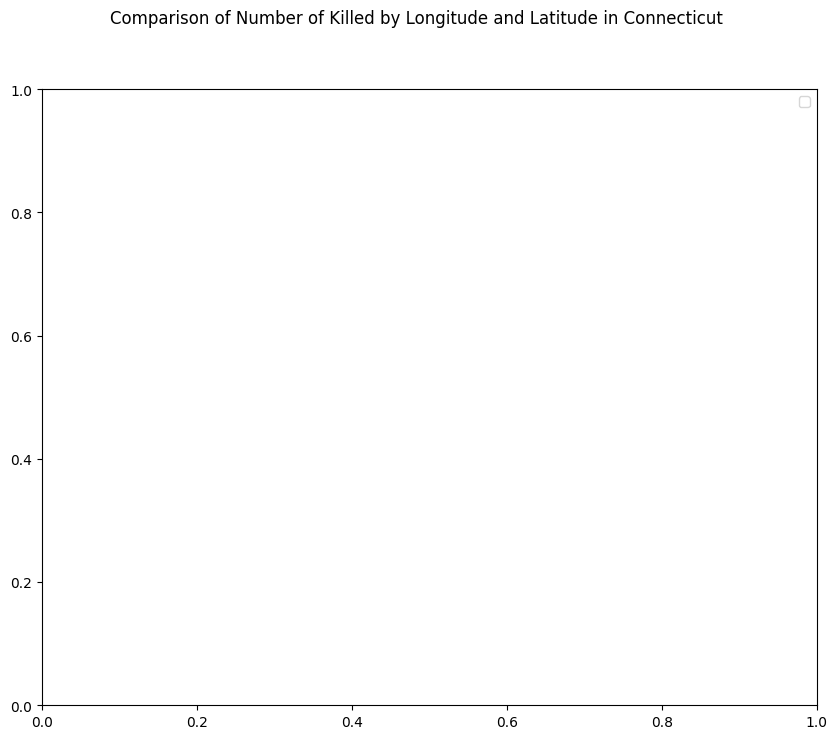

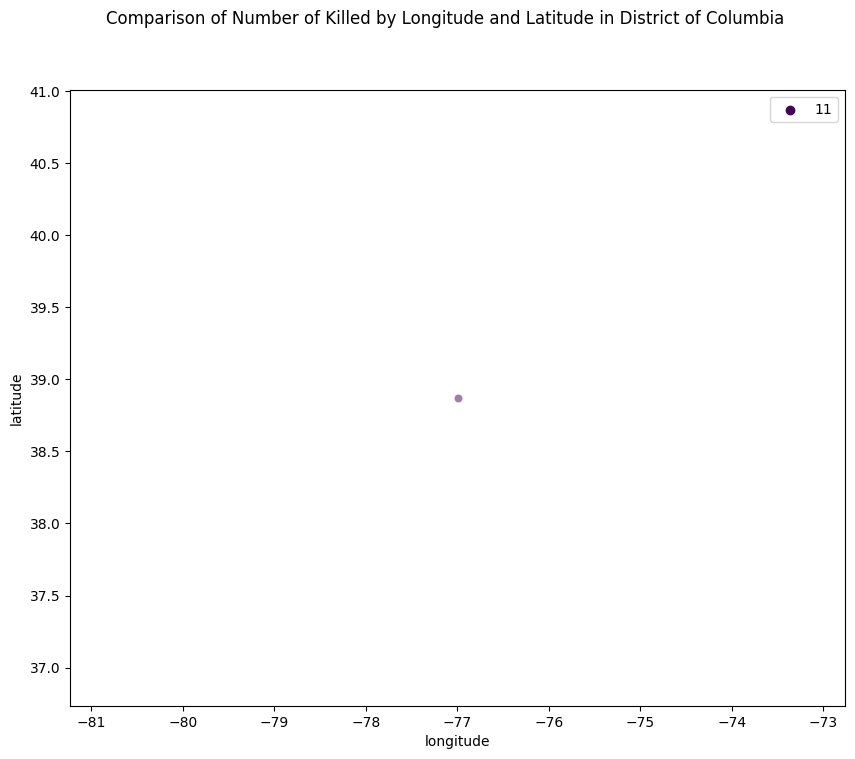

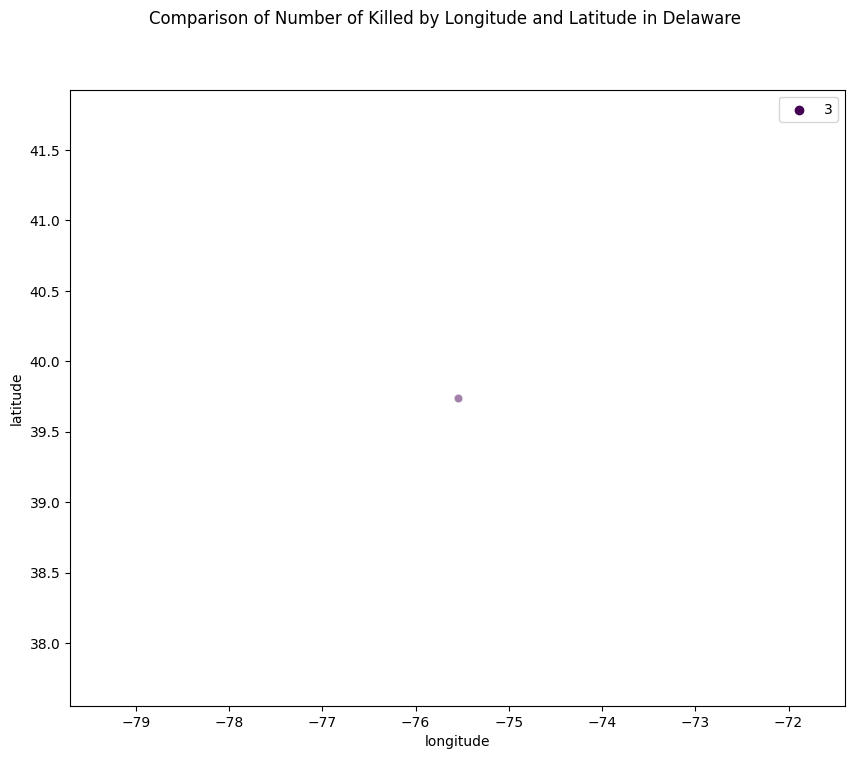

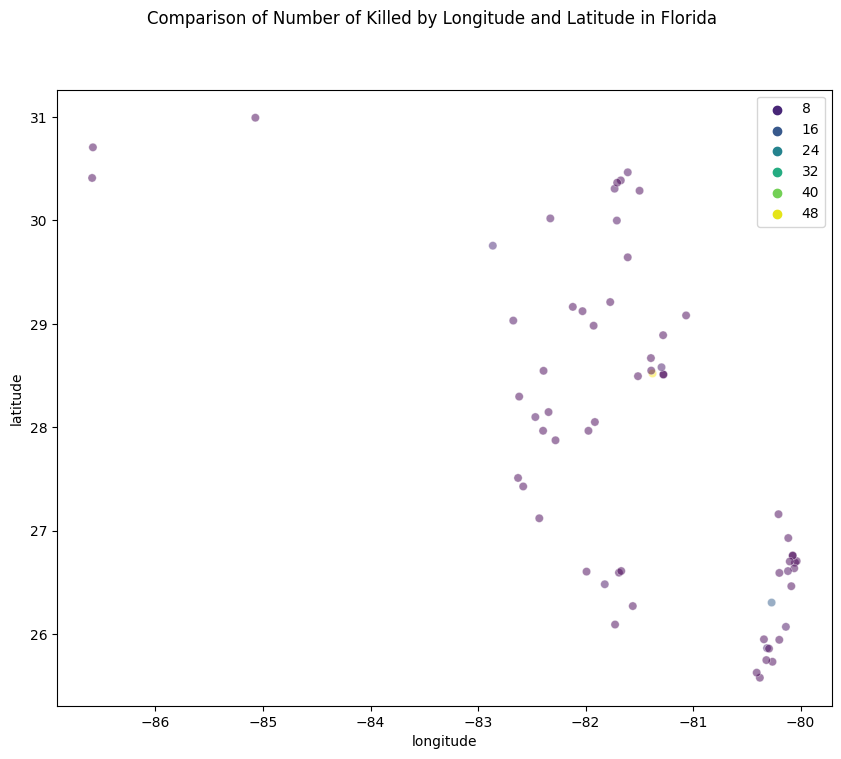

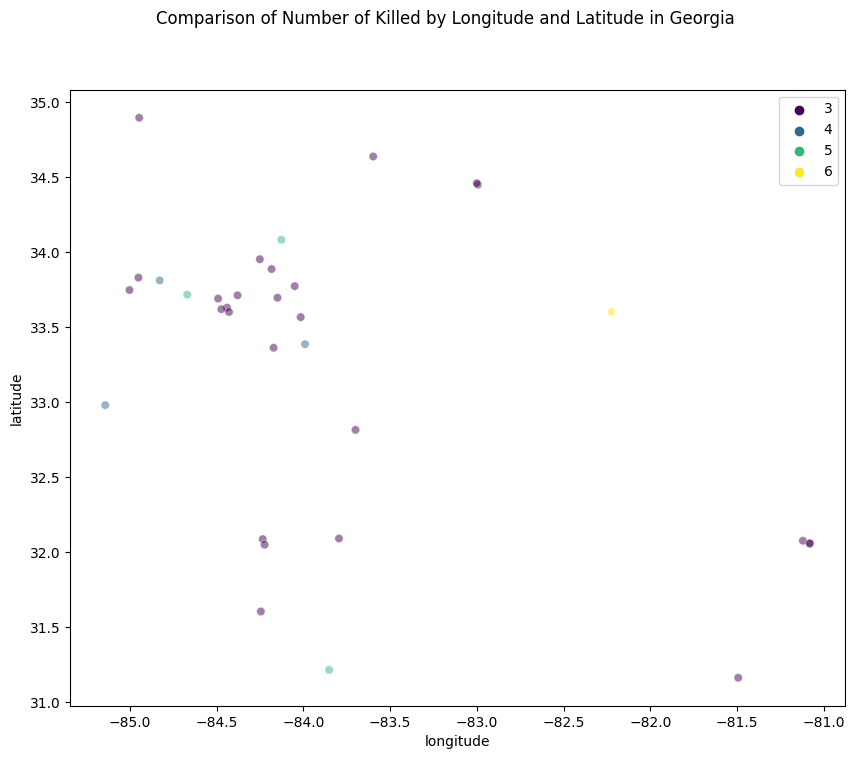

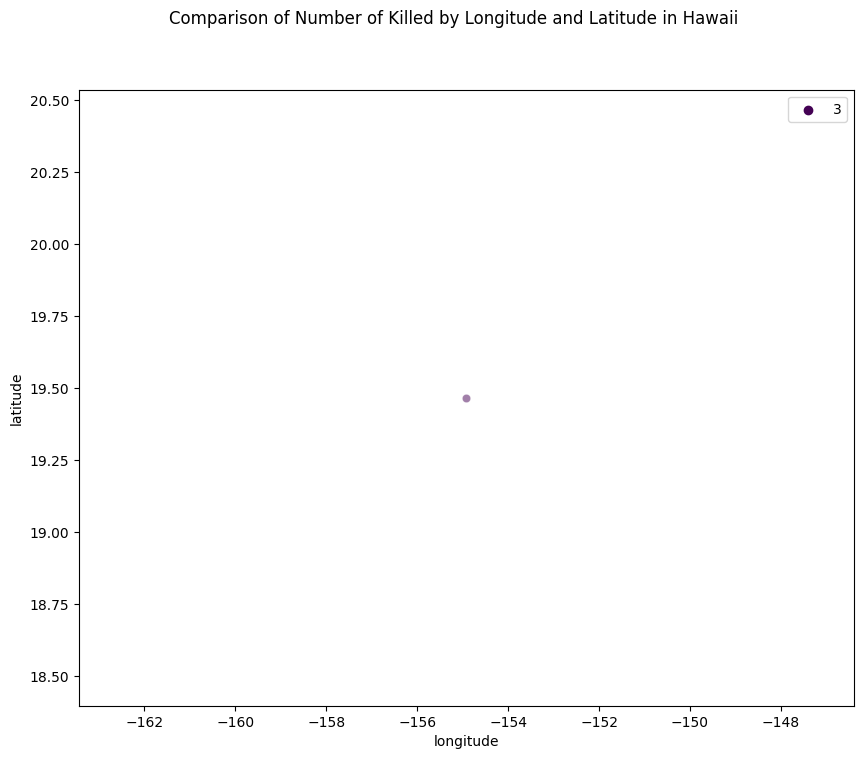

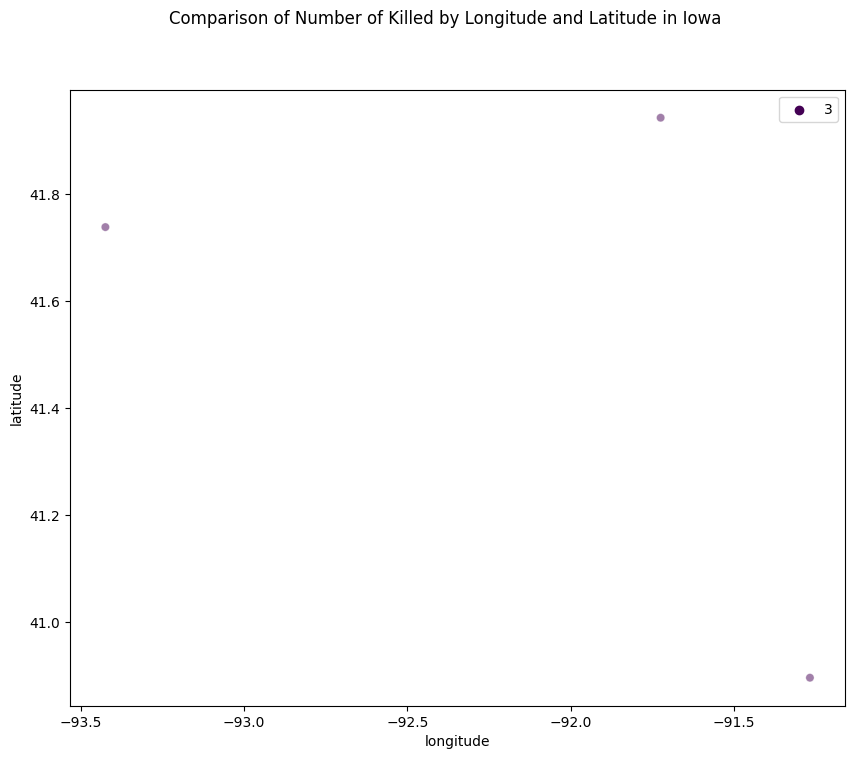

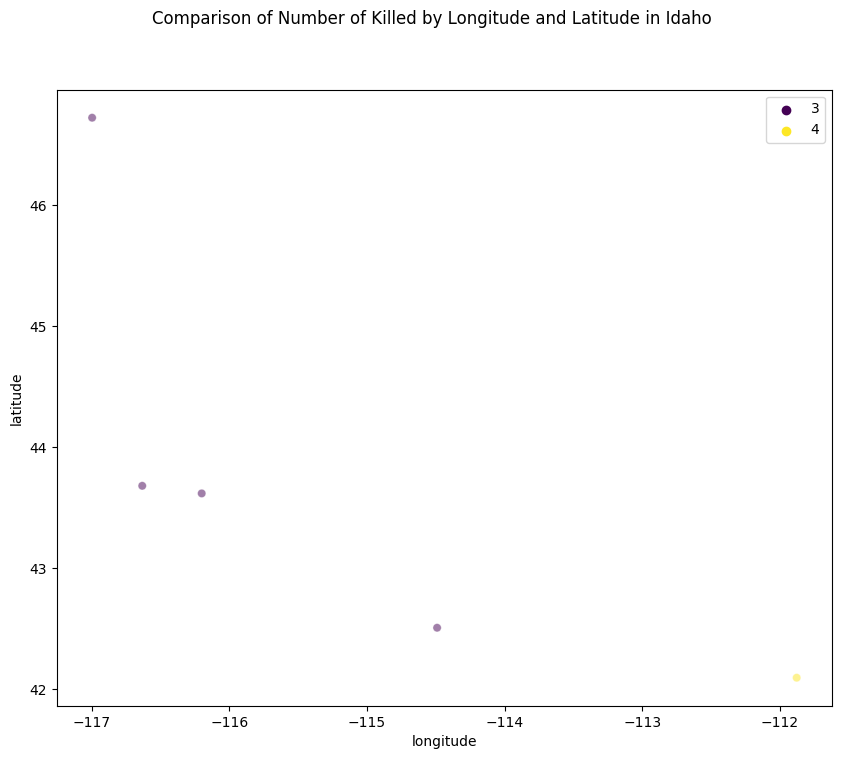

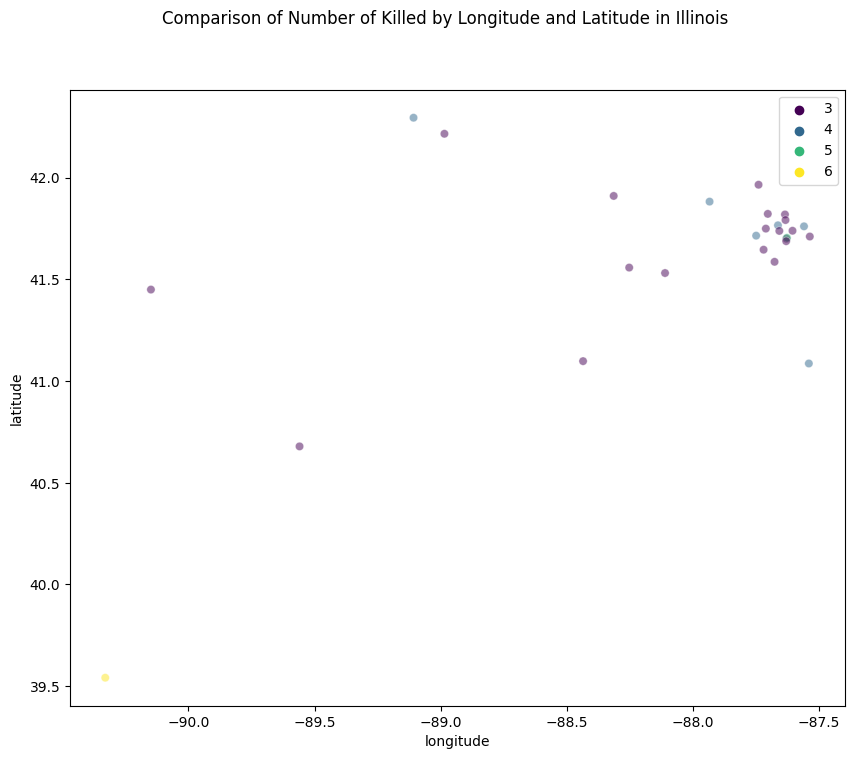

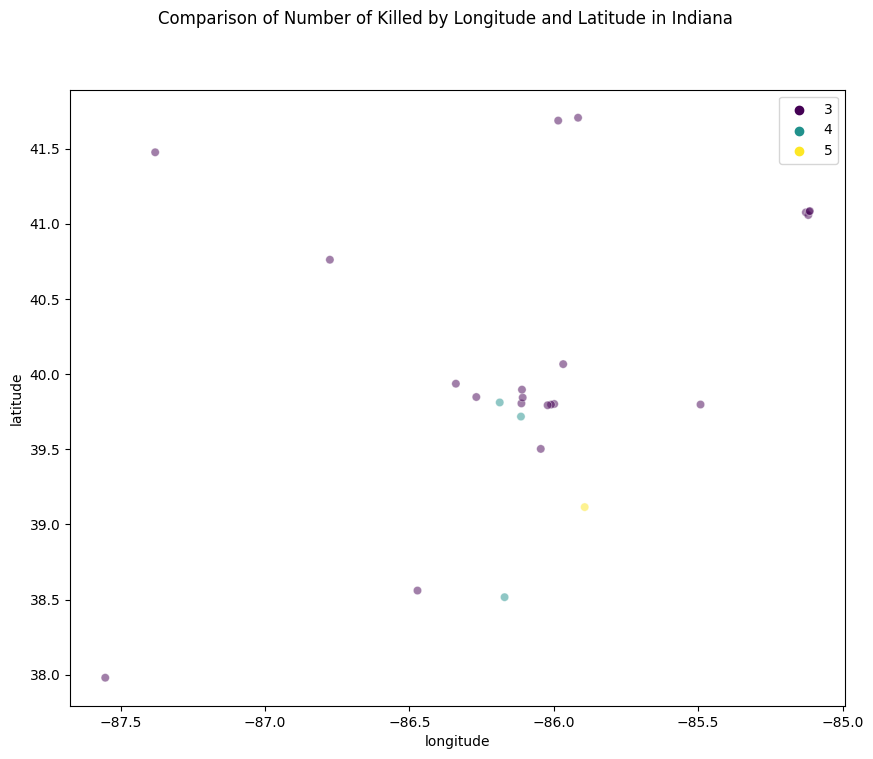

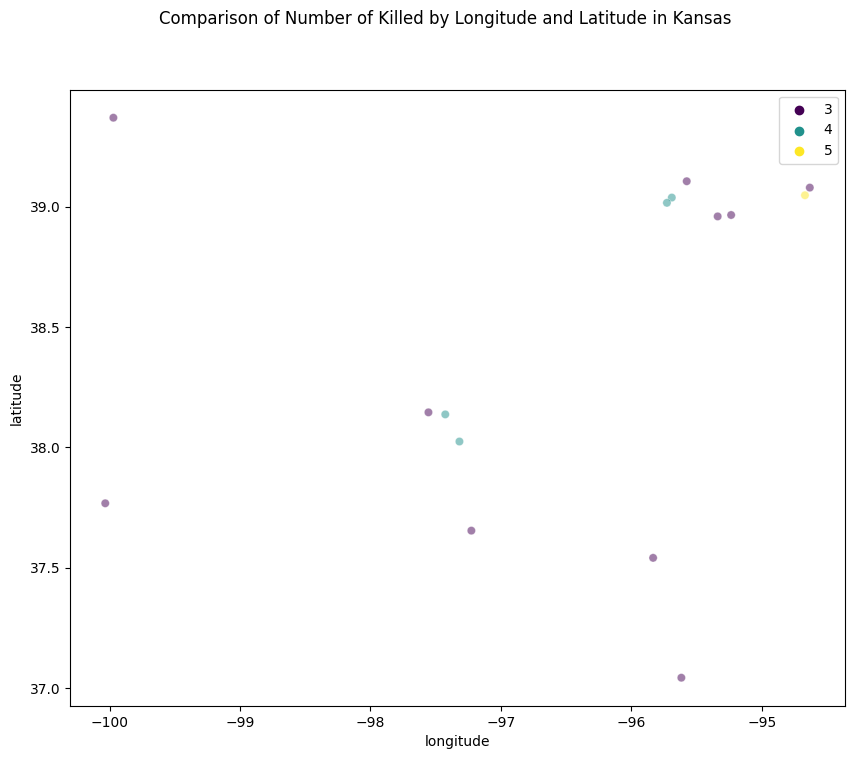

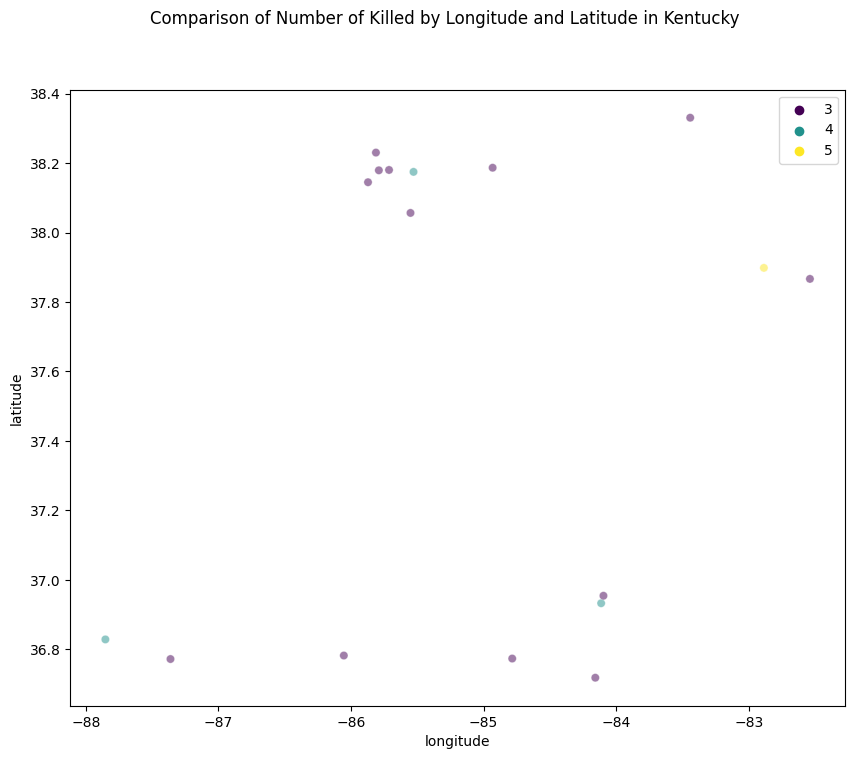

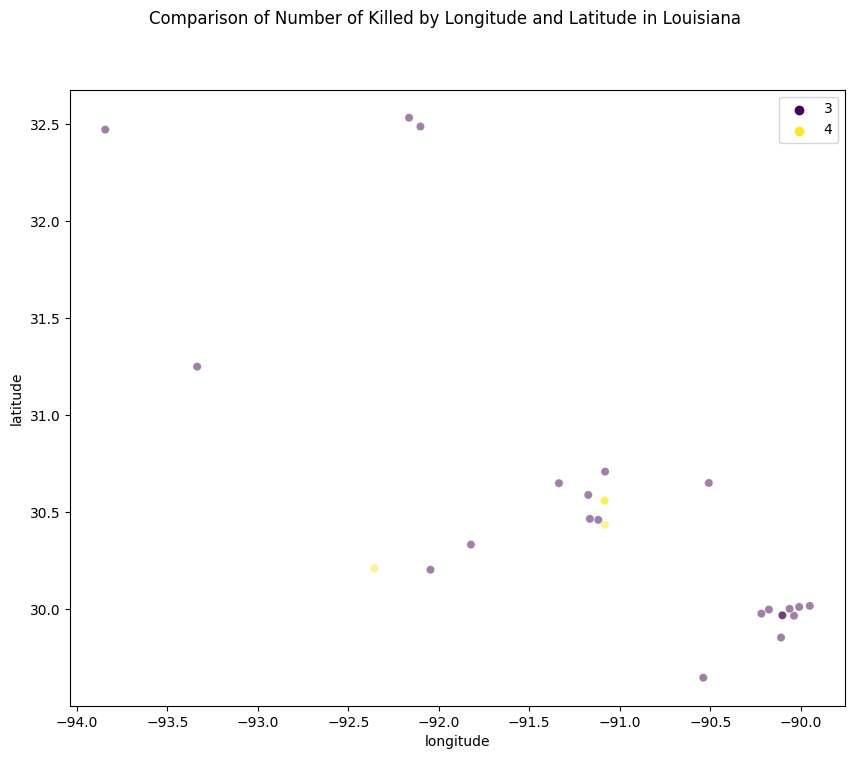

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


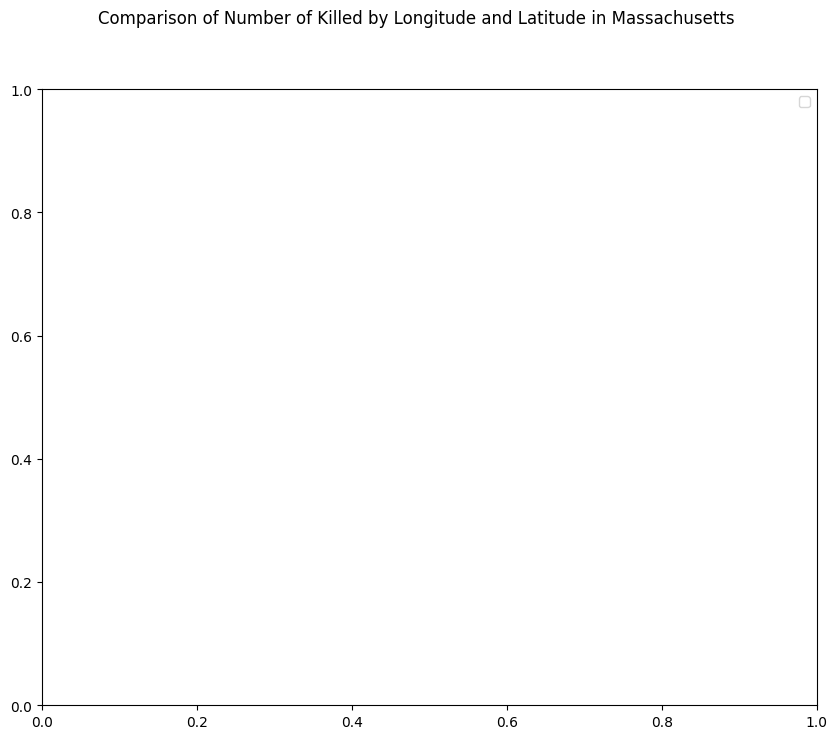

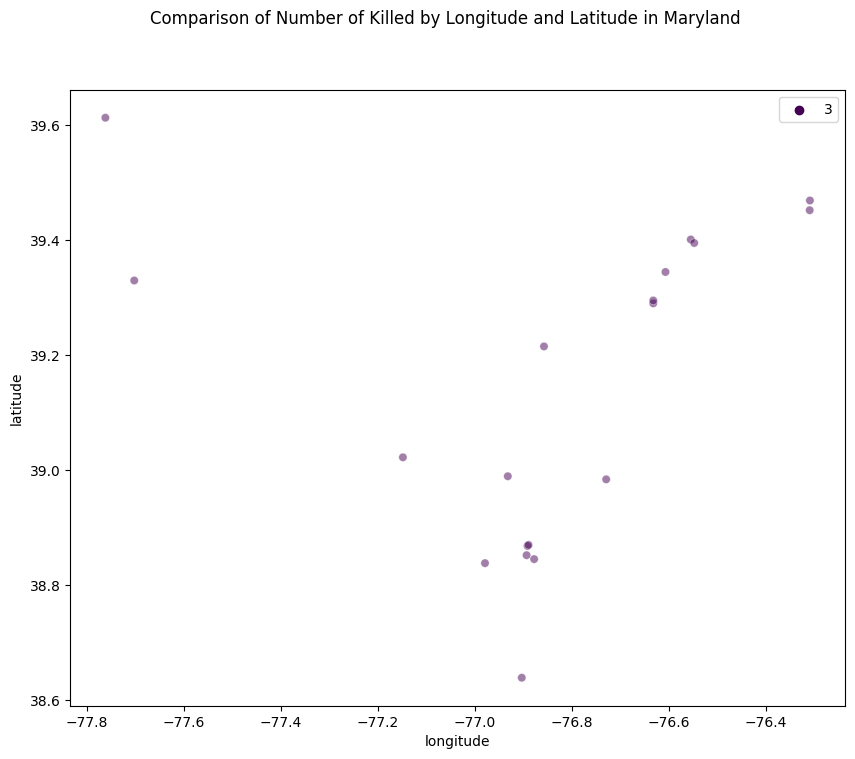

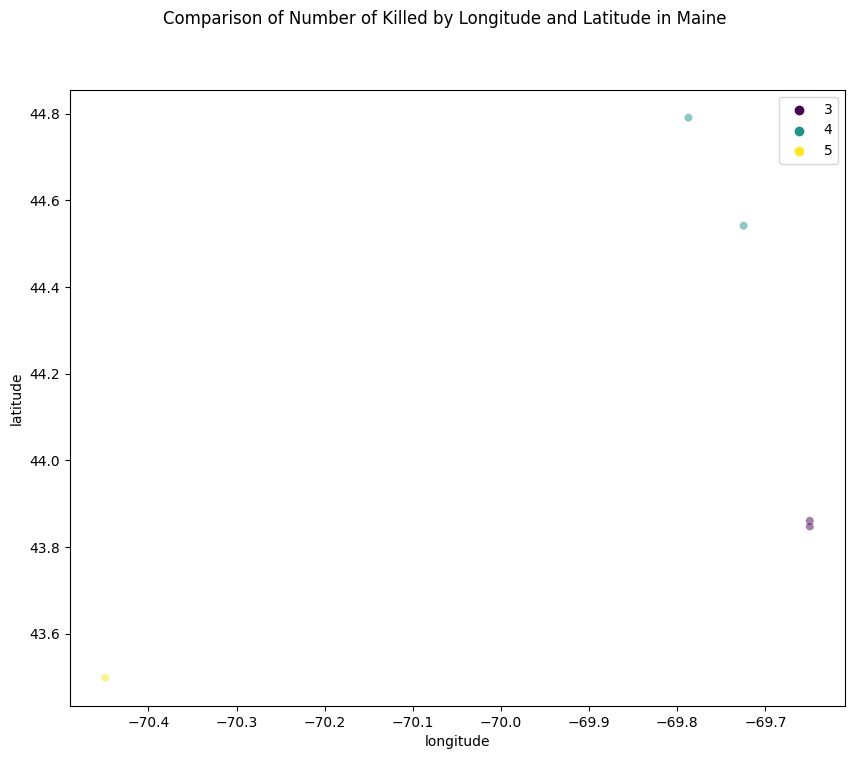

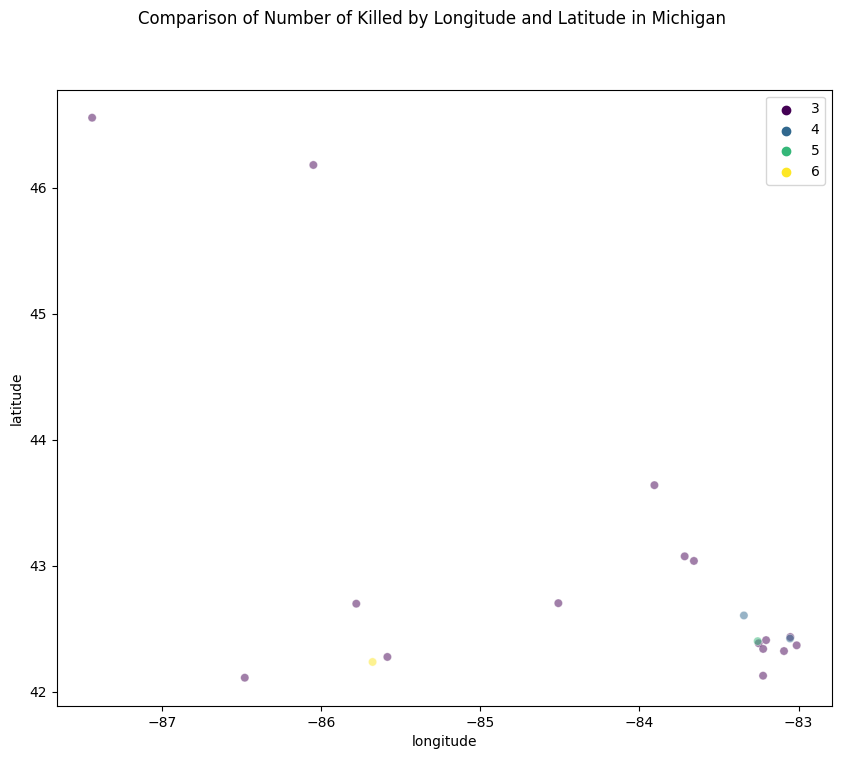

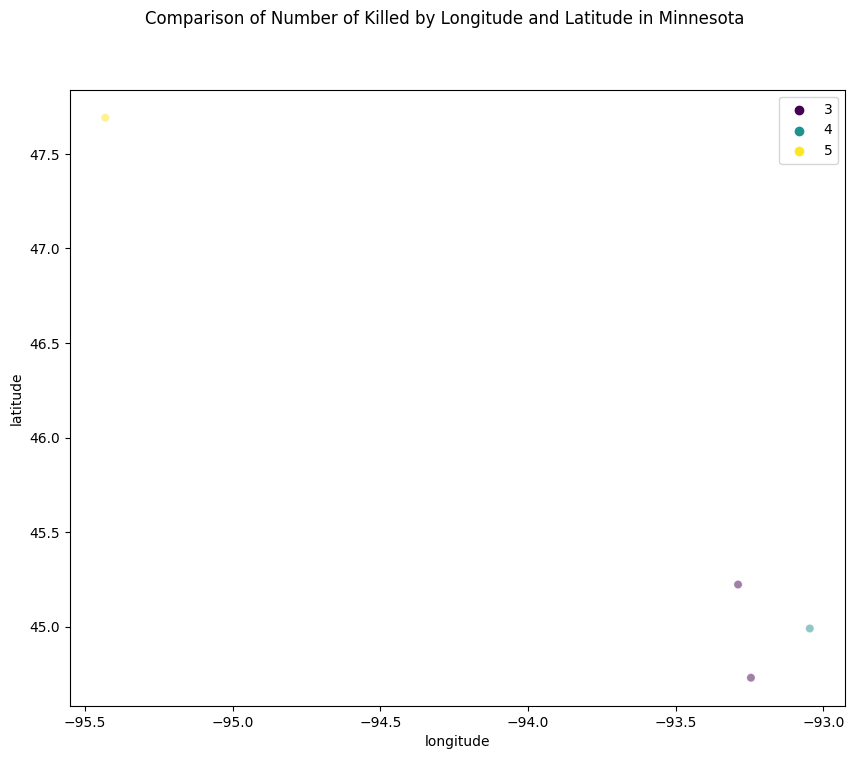

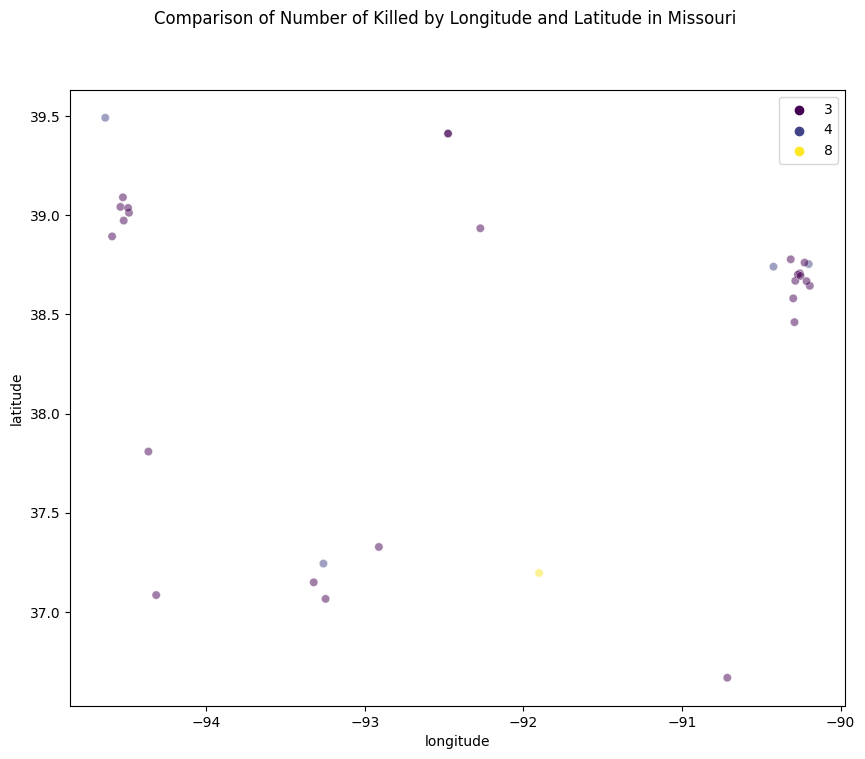

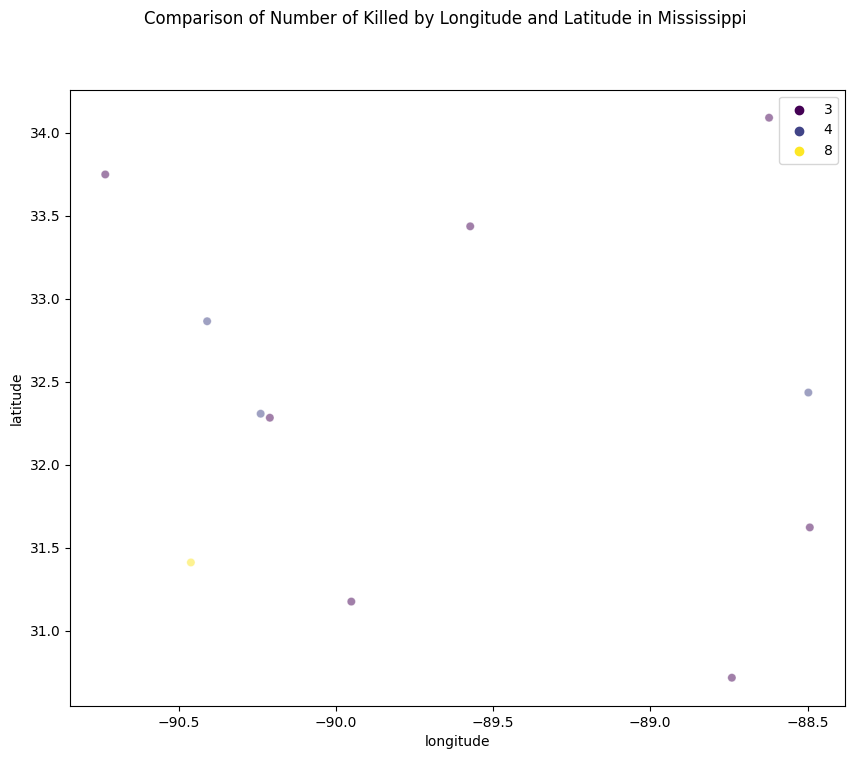

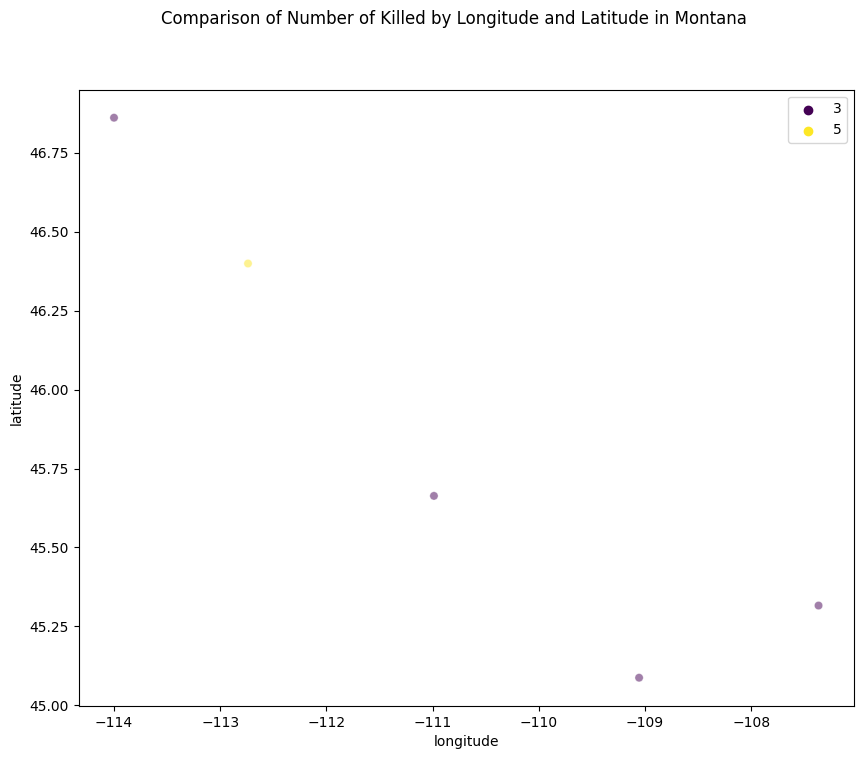

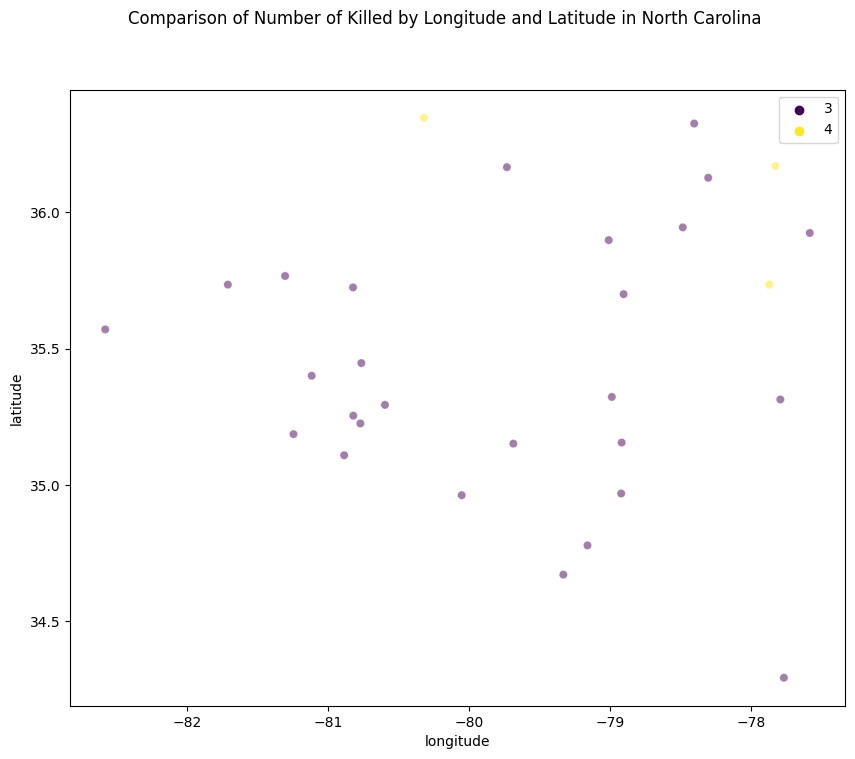

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


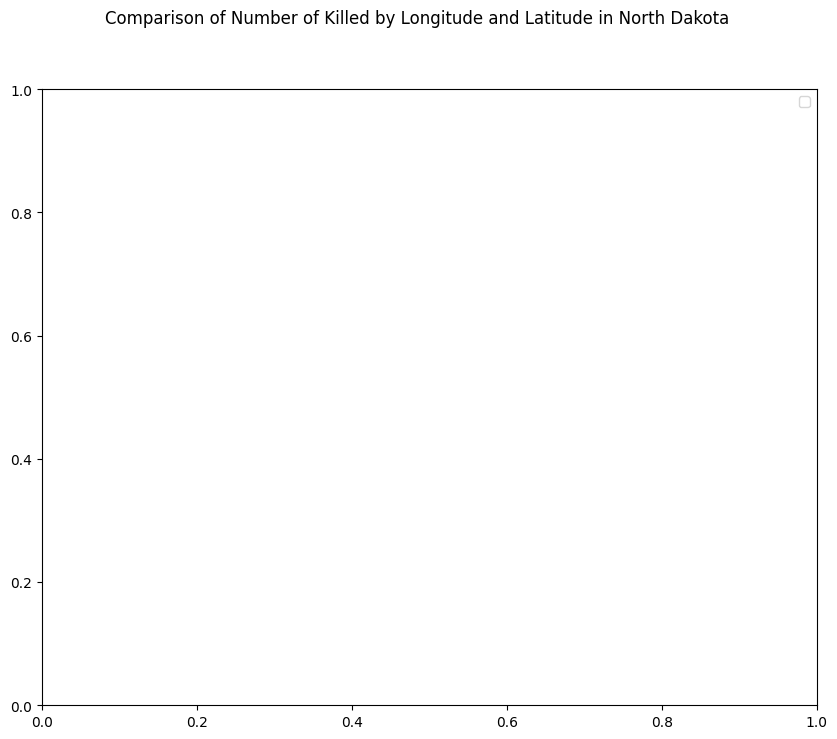

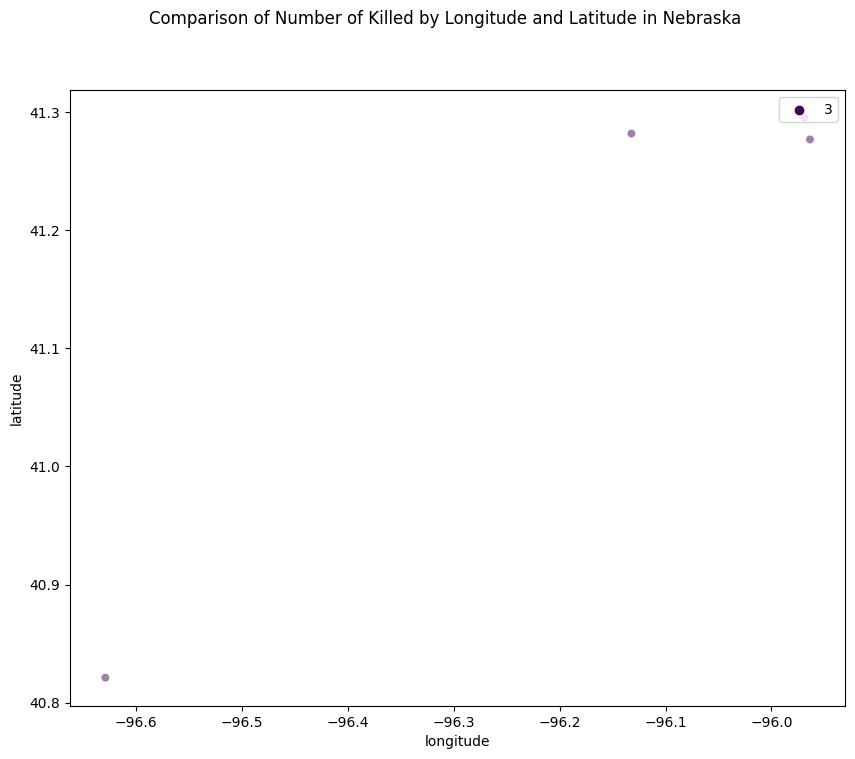

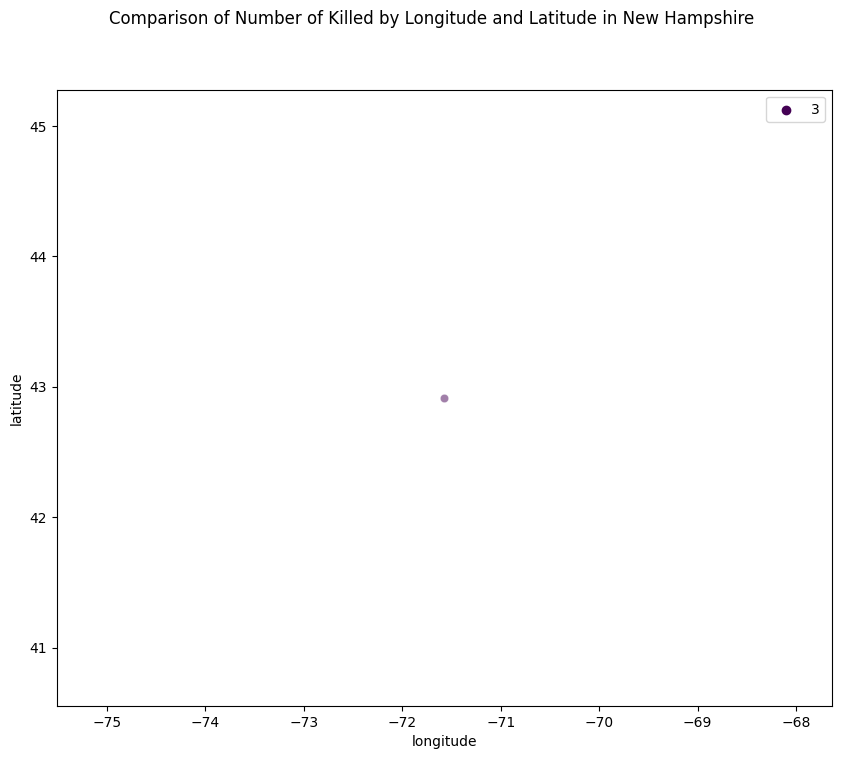

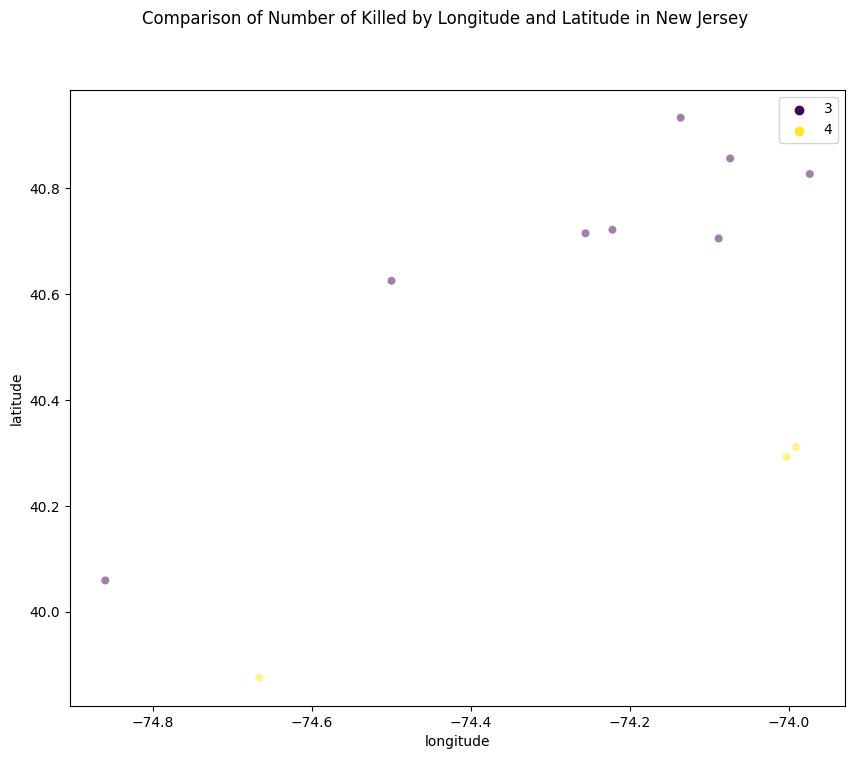

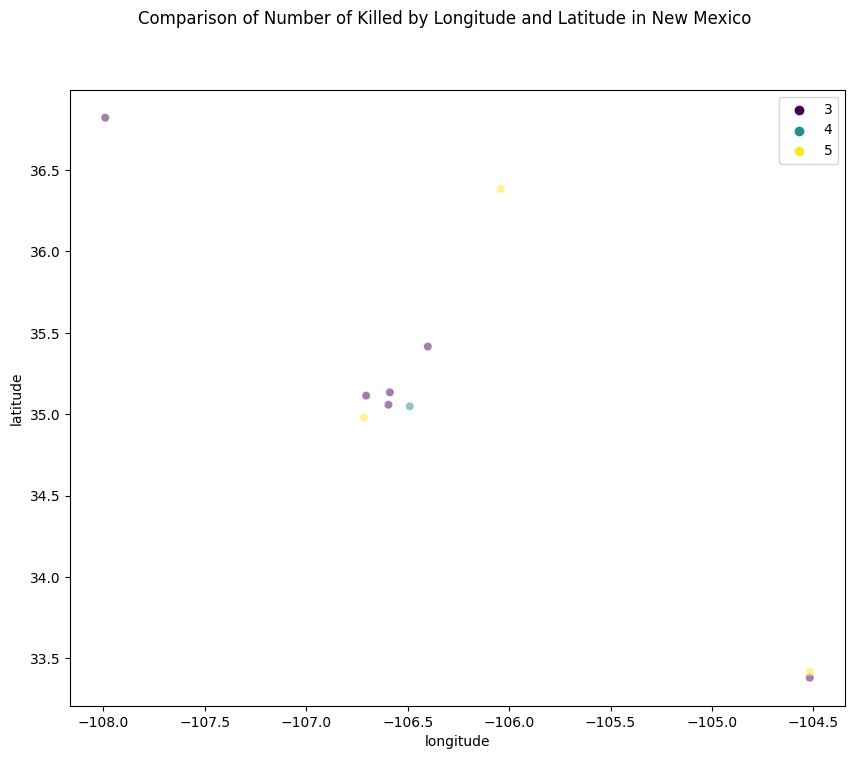

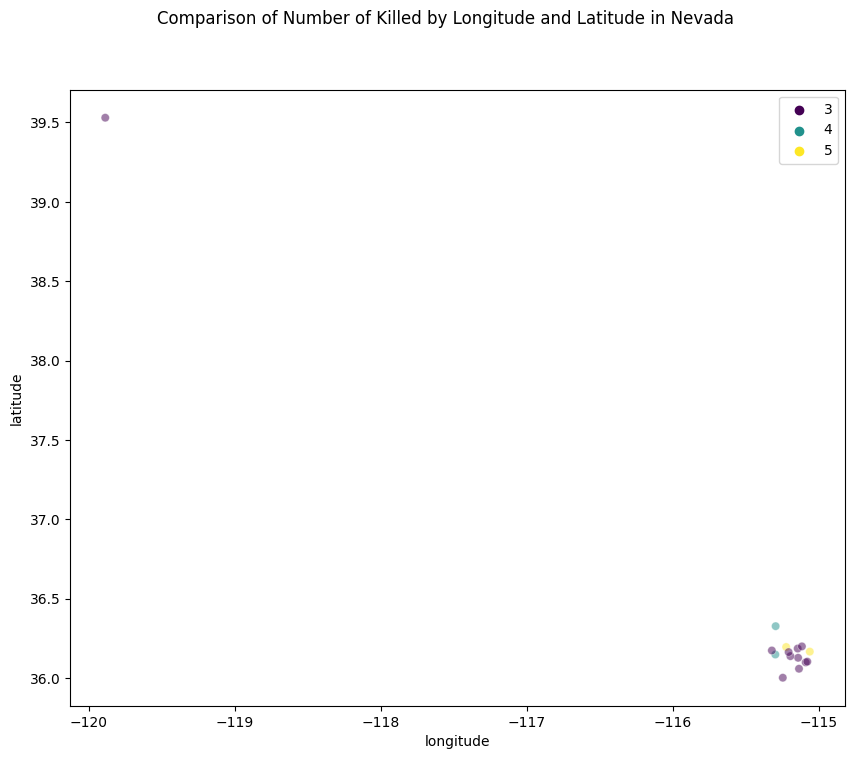

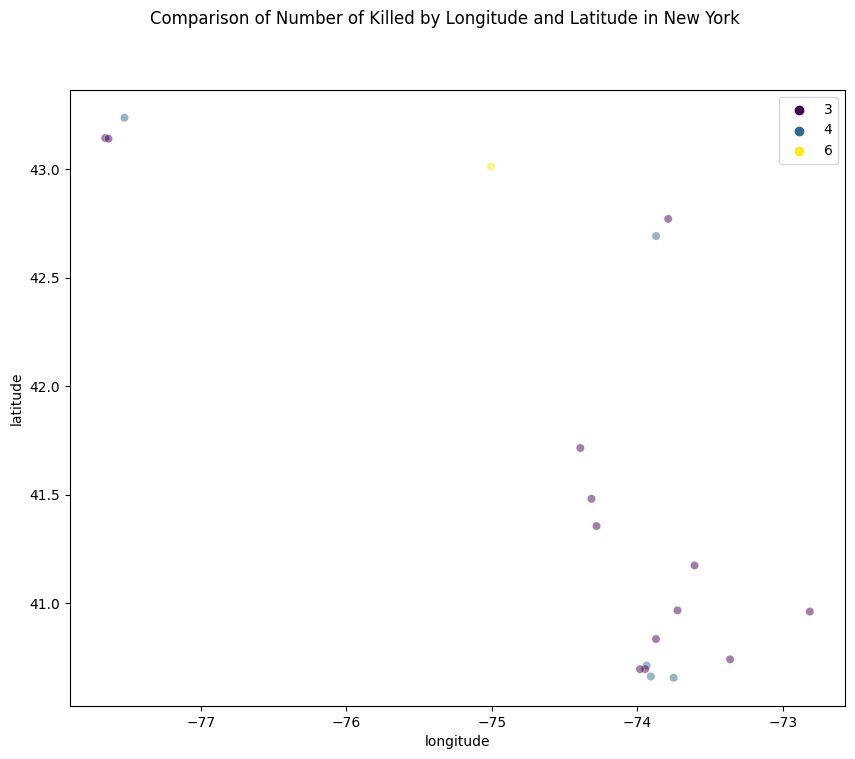

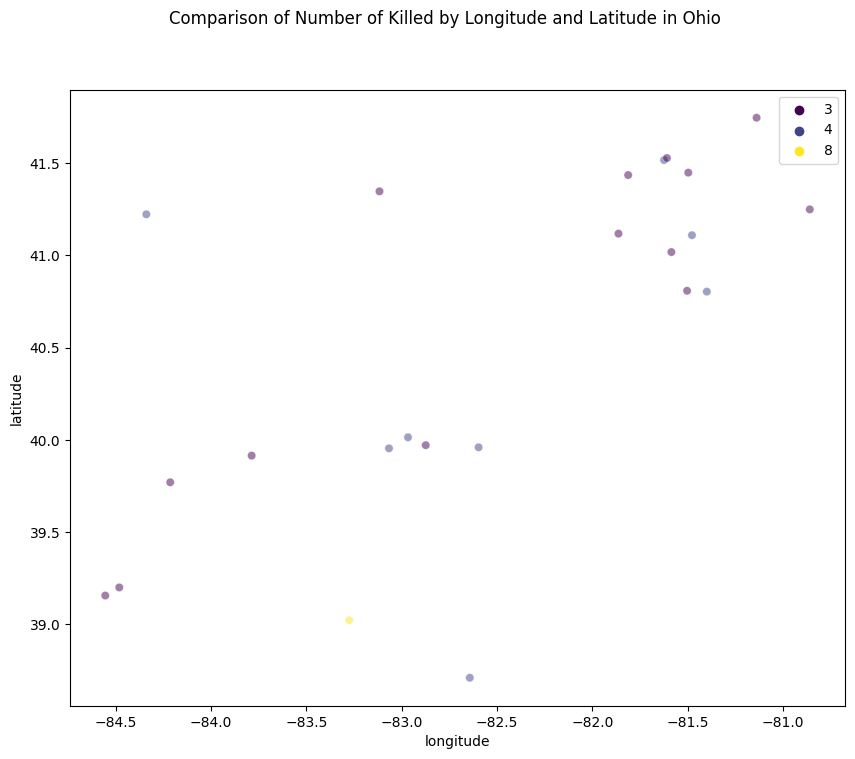

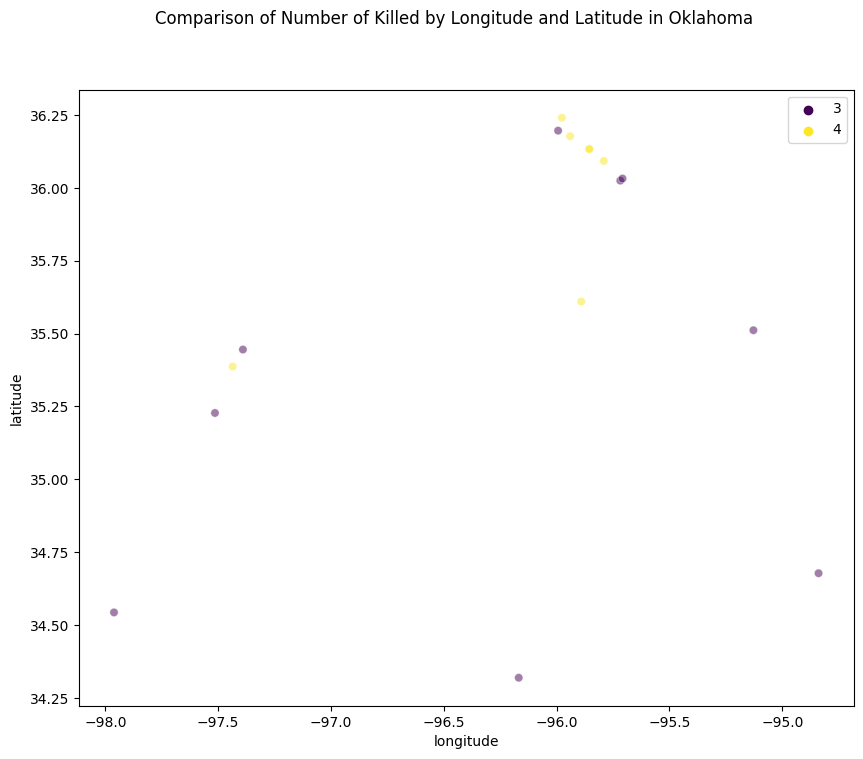

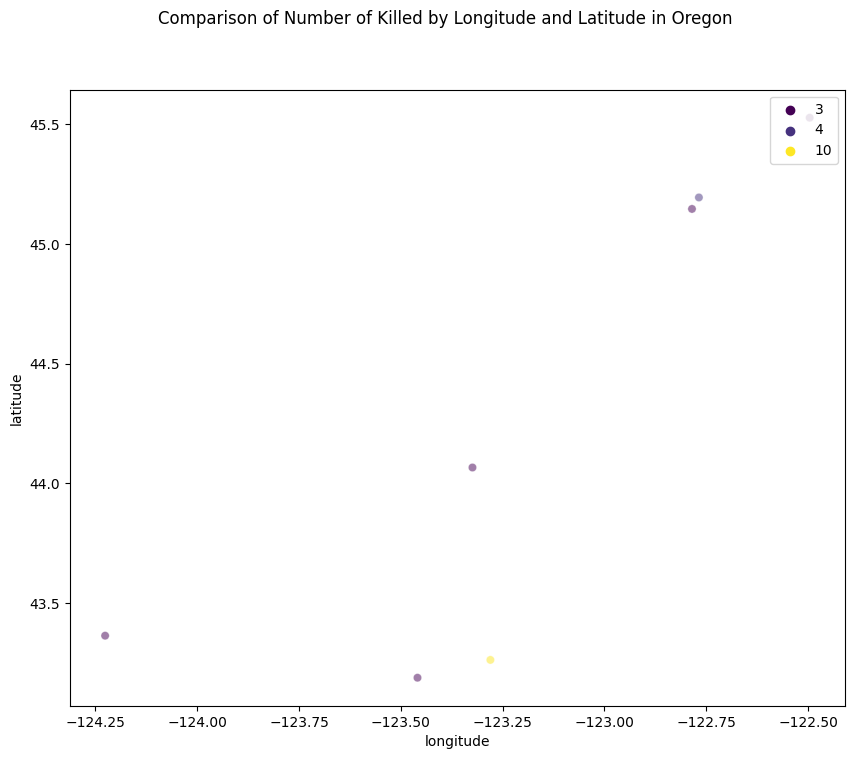

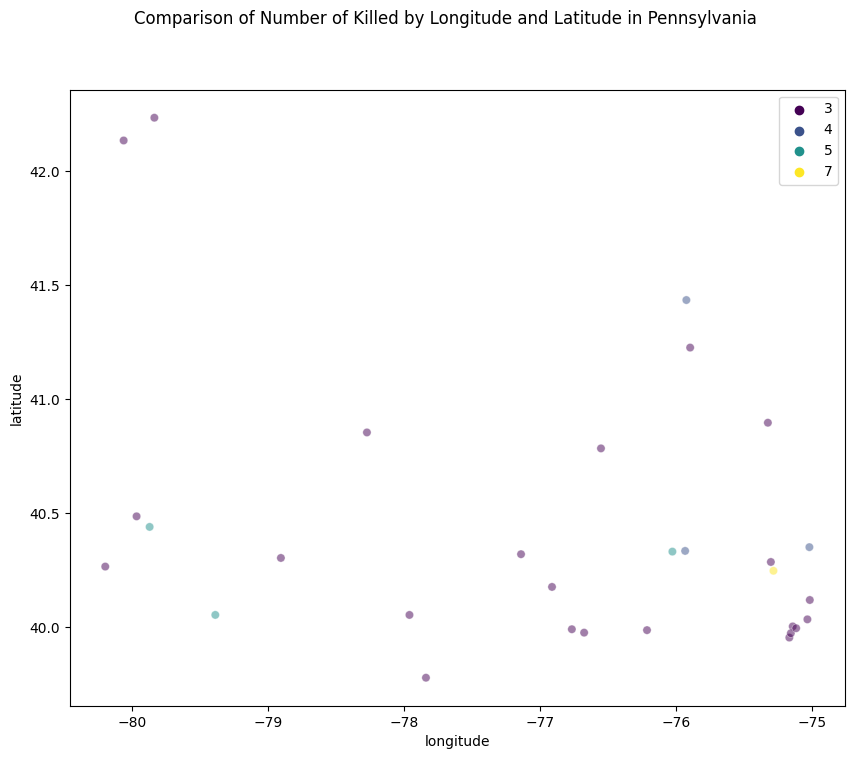

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


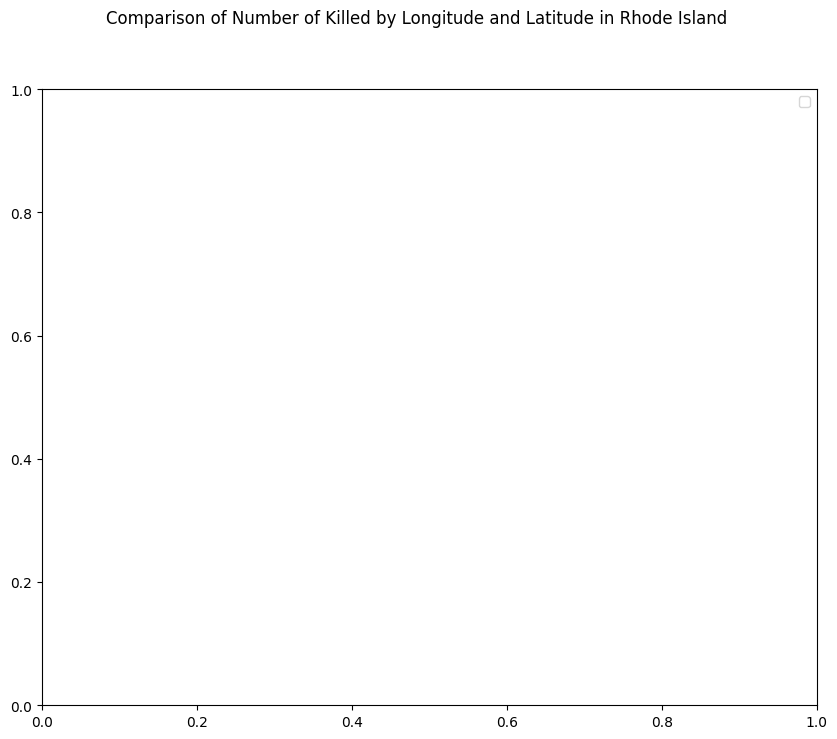

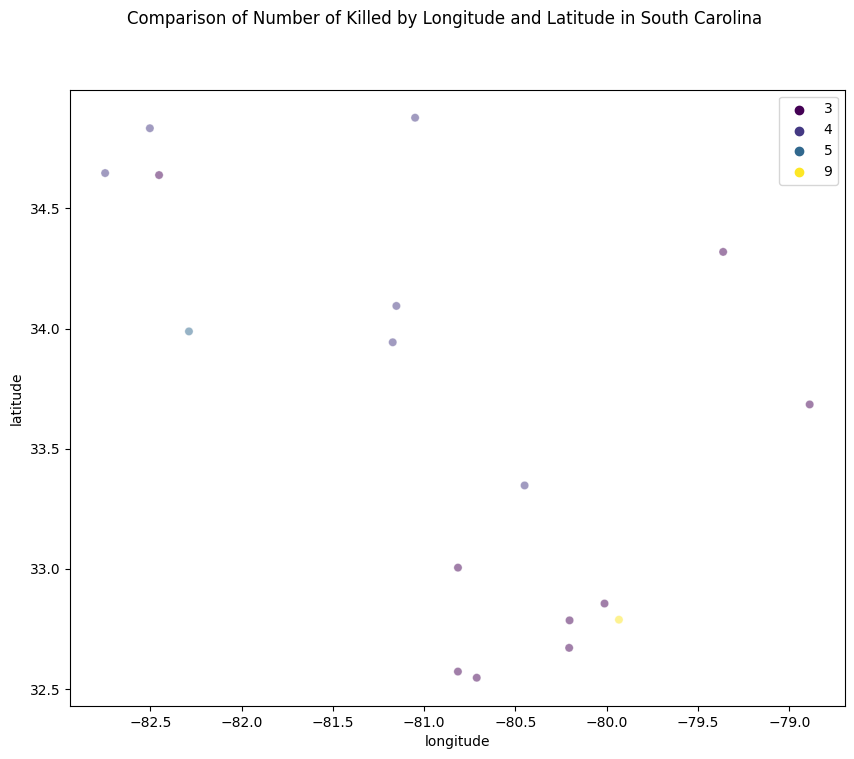

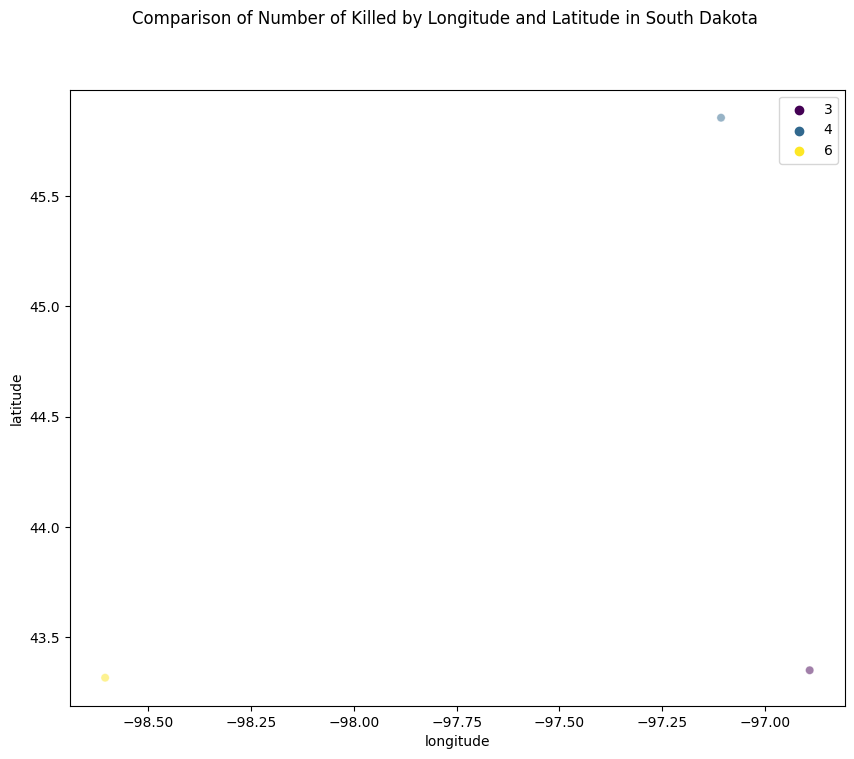

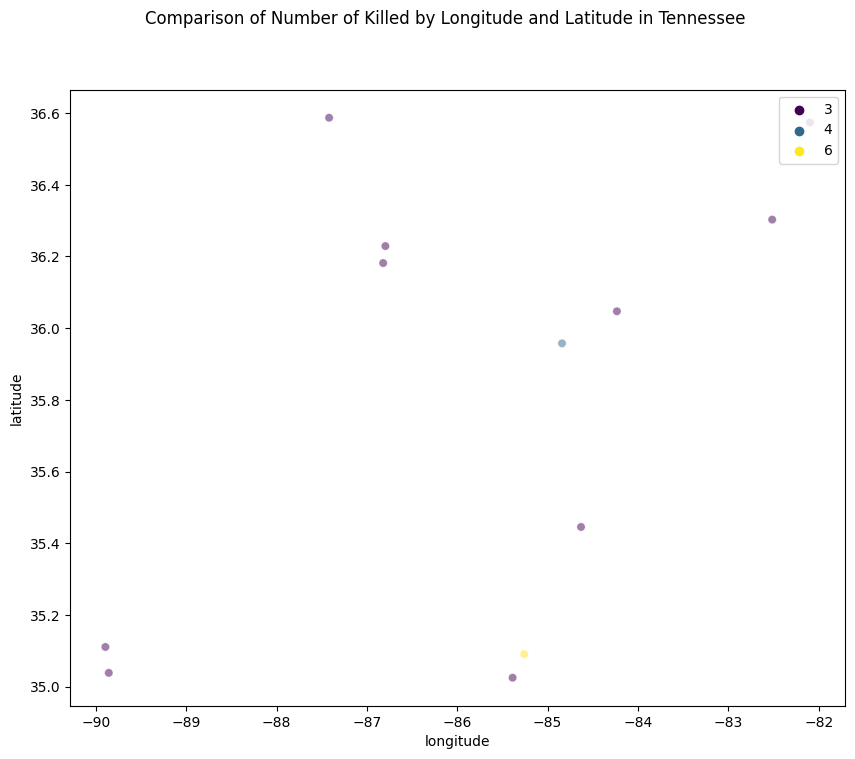

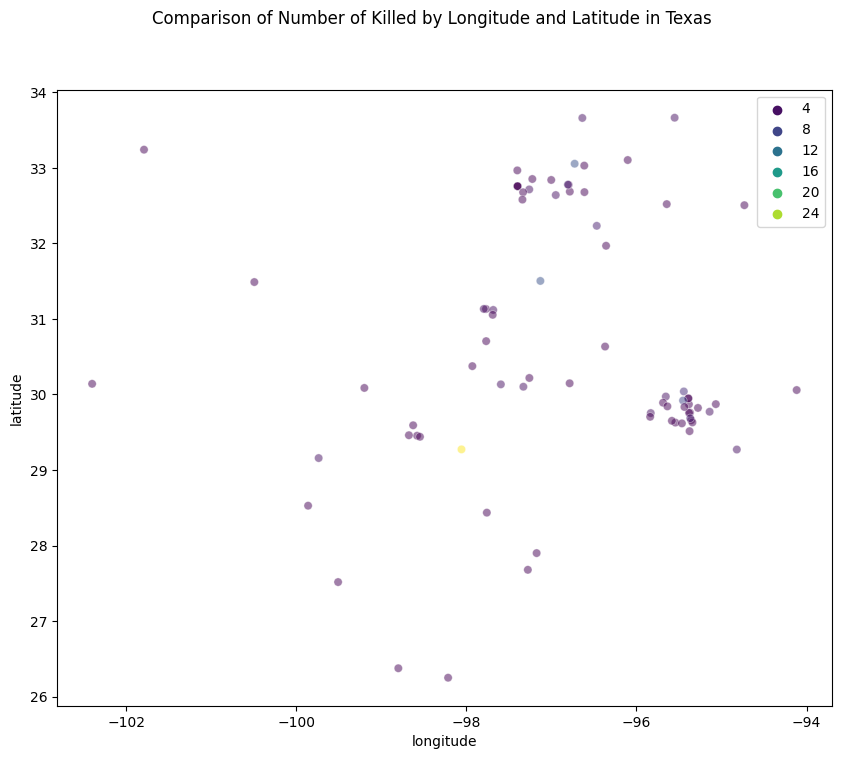

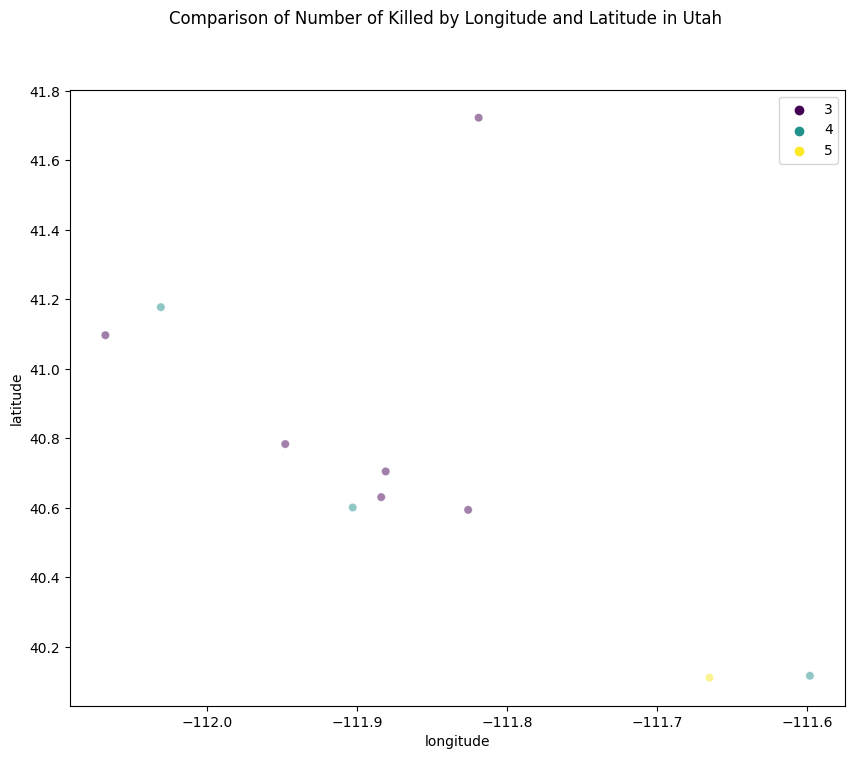

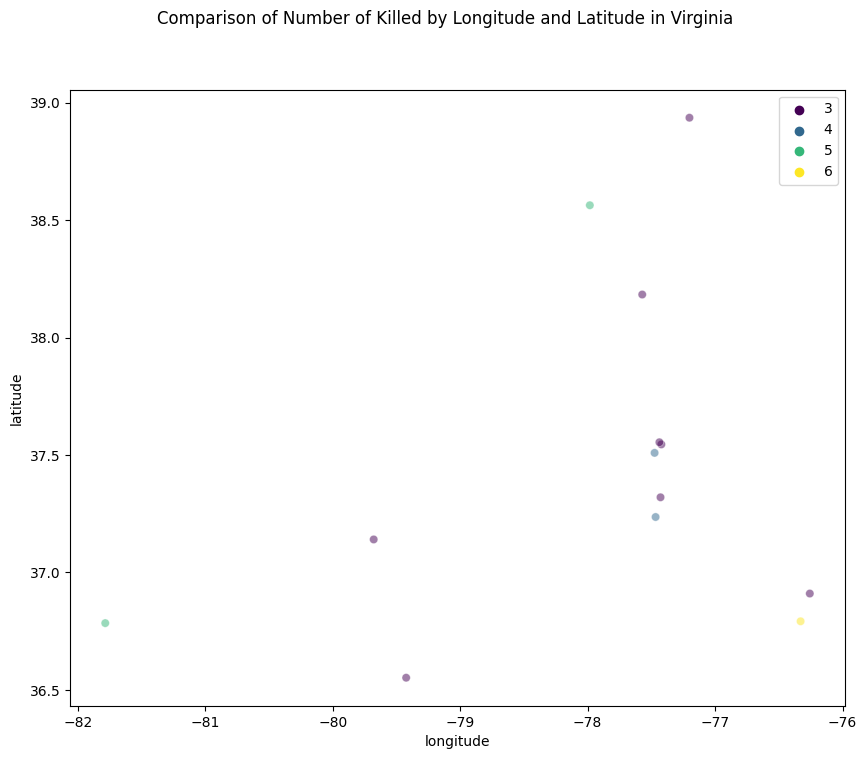

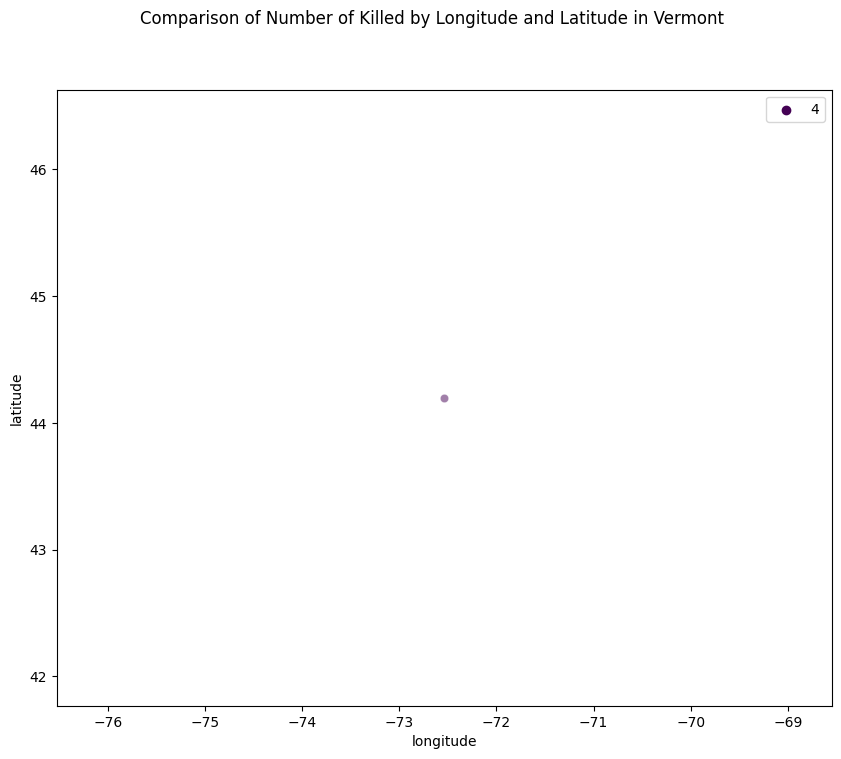

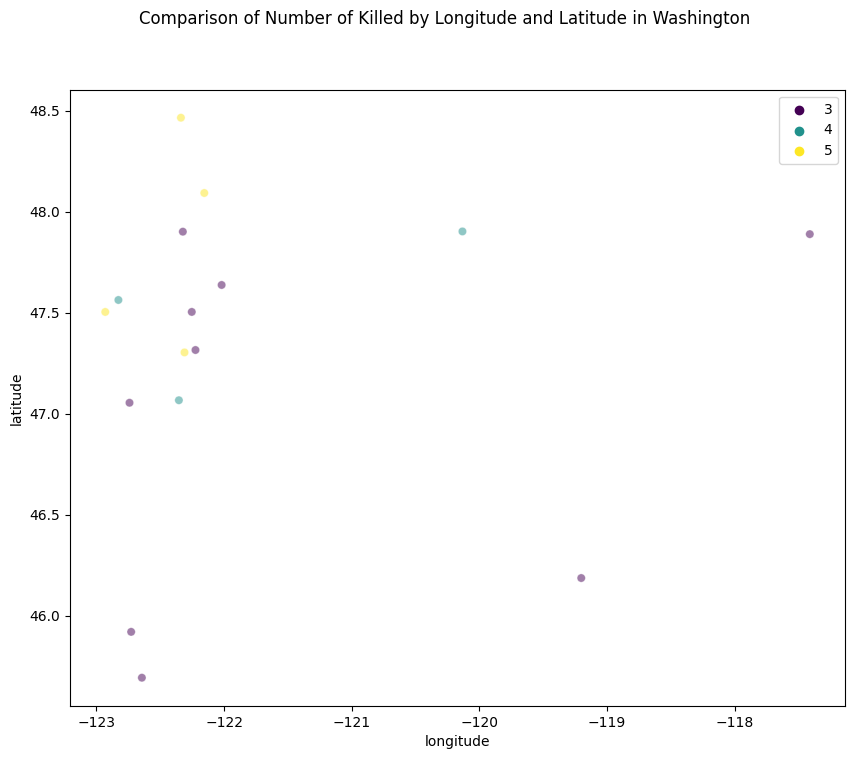

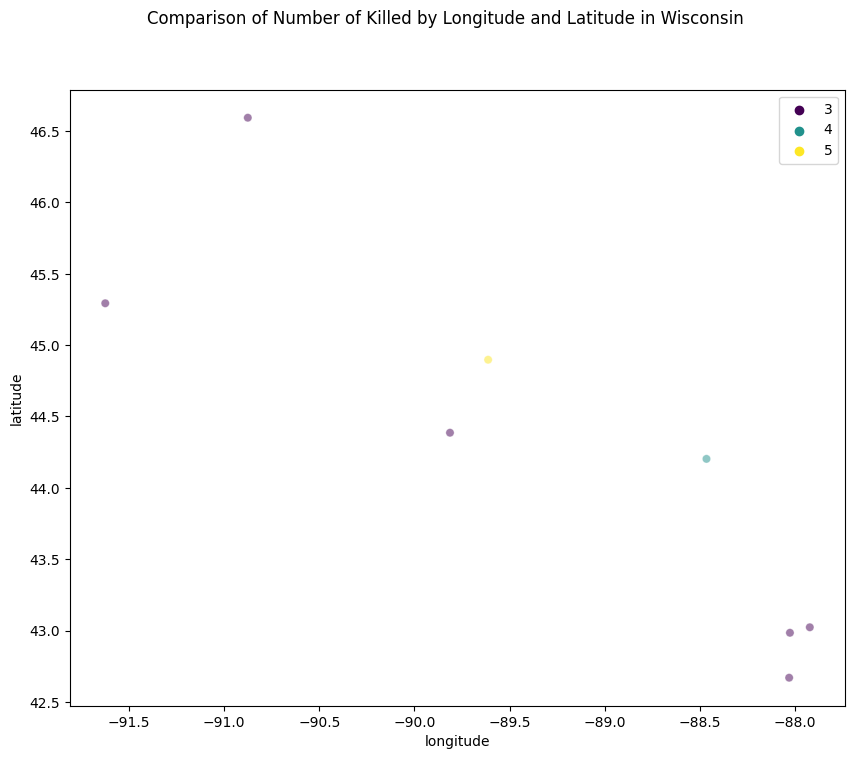

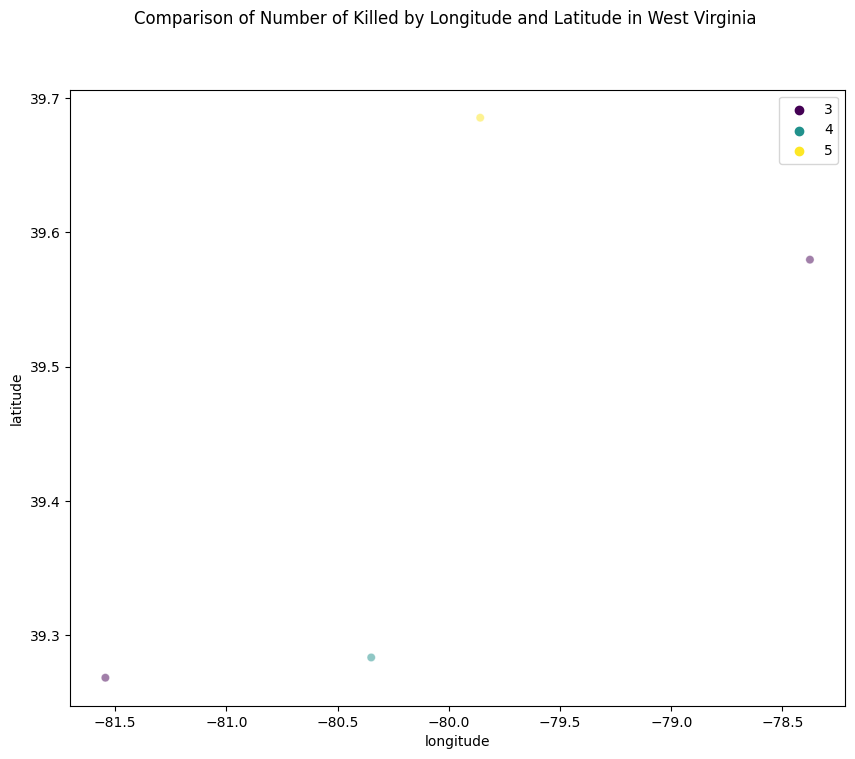

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


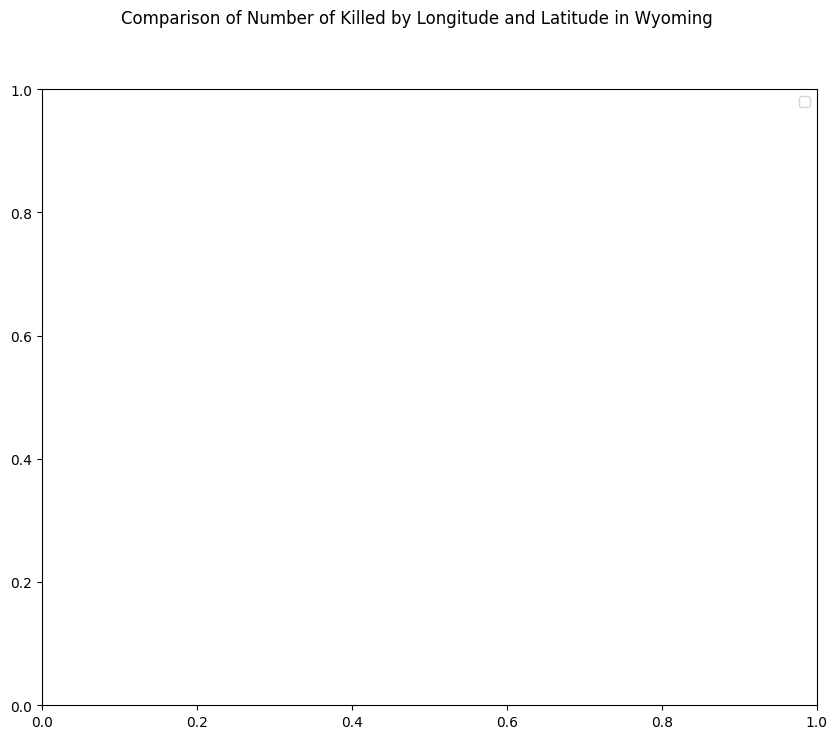

In [38]:
for state in state_names:
    plt.figure(figsize= (10,8))
    sns.scatterplot(data = gun_df[gun_df['state']==state], x="longitude", y="latitude", hue="n_killed",
                    palette="viridis", alpha=0.5)
    plt.suptitle(f"Comparison of Number of Killed by Longitude and Latitude in {state}")
    plt.legend(loc = "upper right")
    plt.show()

There are no dots (and thus no mass shootings in 2013 to March 2018) in five states: Connecticut, Massachusetts, North Dakota, Rhode Island, and Wyoming. 

There are three states with a particularly high killed people count for a single incident: California (16), Texas (24), and Florida (48). The incident in Florida is the mass shooting at Pulse, a gay nightclub, in Orlando on June 12, 2016. A 29-year-old man killed 48 people and wounded 53 more there.

At first glance, there appears to be an outlier for Nevada - vast majority of the points are clustered in lower right corner whereas there is one dot in the upper left corner. I've checked the map of Nevada - the lonesome point is near Carson City and Reno, and the cluster of points are in Las Vegas area. In other words, there isn't any outlier. 

## Creating an aggregated state dataframe for choropleth mapping purposes

First, we have noticed in the longitude/latitude mapping above that five states didn't have any mass shooting in 2013-2018: Connecticut, Massachusetts, North Dakota, Rhode Island, and Wyoming. We will add five records with null values for these states to the gun_df dataframe, and then add state abbreviation column for easier merging with USA geoJSON dataframe. Then we will aggregate data by state and plot them using geopandas.

In [39]:
## Let's create a dataframe of columns that we'll focus on for mapping purpose

gun_map_df = gun_df[['incident_id', 'state', 'n_killed', 'n_injured', 'n_guns_involved', 'Male', 'Female', 'Adult', 'Teen', 'Child', 'Victim', 
'Suspect', 'Unknown_Guns', 'Handgun', 'Shotgun', 'Rifle', 'Other', 'Automatic']]

df2 = pd.DataFrame({'incident_id': [None, None, None, None, None],
'state': ['Connecticut', 'Massachusetts', 'North Dakota', 'Rhode Island', 'Wyoming'], 
'n_killed': [None, None, None, None, None],
'n_injured': [None, None, None, None, None],
'n_guns_involved': [None, None, None, None, None],
'n_incidents': [None, None, None, None, None],
'Male': [None, None, None, None, None],
'Female': [None, None, None, None, None],
'Adult': [None, None, None, None, None],
'Teen': [None, None, None, None, None],
'Child': [None, None, None, None, None],
'Victim': [None, None, None, None, None],
'Suspect': [None, None, None, None, None],
'Unknown_Guns': [None, None, None, None, None],
'Handgun': [None, None, None, None, None],
'Shotgun': [None, None, None, None, None],
'Rifle': [None, None, None, None, None],
'Other': [None, None, None, None, None],
'Automatic': [None, None, None, None, None] })

gun_states = pd.concat([gun_map_df, df2], axis = 0, ignore_index = True)

gun_states



incident_id          state n_killed n_injured  n_guns_involved  Male  \
0        496668        Alabama        3         5              NaN   8.0   
1        187367        Alabama        3         0              NaN   2.0   
2        195207        Alabama        3         0              NaN   3.0   
3        261048        Alabama        3         0              NaN   2.0   
4        308861        Alabama        3         1              1.0   3.0   
..          ...            ...      ...       ...              ...   ...   
802        None    Connecticut     None      None              NaN   NaN   
803        None  Massachusetts     None      None              NaN   NaN   
804        None   North Dakota     None      None              NaN   NaN   
805        None   Rhode Island     None      None              NaN   NaN   
806        None        Wyoming     None      None              NaN   NaN   

     Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  \
0       1.0    9.0   0.0    0.0     8.0      2.0           0.0      0.0   
1       1.0    2.0   0.0    1.0     2.0      1.0           0.0      0.0   
2       0.0    3.0   0.0    0.0     2.0      1.0           0.0      0.0   
3       1.0    3.0   0.0    0.0     2.0      1.0           0.0      0.0   
4       1.0    4.0   0.0    0.0     3.0      1.0           0.0      0.0   
..      ...    ...   ...    ...     ...      ...           ...      ...   
802     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
803     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
804     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
805     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   
806     NaN    NaN   NaN    NaN     NaN      NaN           NaN      NaN   

     Shotgun  Rifle  Other  Automatic n_incidents  
0        0.0    0.0    0.0        0.0         NaN  
1        0.0    0.0    0.0        0.0         NaN  
2        0.0    0.0    0.0        0.0         NaN  
3        0.0    0.0    0.0        0.0         NaN  
4        0.0    1.0    0.0        0.0         NaN  
..       ...    ...    ...        ...         ...  
802      NaN    NaN    NaN        NaN        None  
803      NaN    NaN    NaN        NaN        None  
804      NaN    NaN    NaN        NaN        None  
805      NaN    NaN    NaN        NaN        None  
806      NaN    NaN    NaN        NaN        None  

[807 rows x 19 columns]

In [40]:
## Now's let's add state abbreviation to the dataframe

gun_states['abbrev'] = None

for i in range(len(gun_states)):
    state = gun_states.loc[i, 'state']
    if state == 'Alabama':
        gun_states.at[i, 'abbrev'] = 'AL'
    elif state == 'Alaska':
        gun_states.at[i, 'abbrev'] = 'AK'
    elif state == 'Arizona':
        gun_states.at[i, 'abbrev'] = 'AZ'
    elif state == 'Arkansas':
        gun_states.at[i, 'abbrev'] = 'AR'
    elif state == 'California':
        gun_states.at[i, 'abbrev'] = 'CA'
    elif state == 'Colorado':
        gun_states.at[i, 'abbrev'] = 'CO'
    elif state == 'Connecticut':
        gun_states.at[i, 'abbrev'] = 'CT'
    elif state == 'Delaware':
        gun_states.at[i, 'abbrev'] = 'DE'
    elif state == 'District of Columbia':
        gun_states.at[i, 'abbrev'] = 'DC'
    elif state == 'Florida':
        gun_states.at[i, 'abbrev'] = 'FL'
    elif state == 'Georgia':
        gun_states.at[i, 'abbrev'] = 'GA'
    elif state == 'Hawaii':
        gun_states.at[i, 'abbrev'] = 'HI'
    elif state == 'Idaho':
        gun_states.at[i, 'abbrev'] = 'ID'
    elif state == 'Illinois':
        gun_states.at[i, 'abbrev'] = 'IL'
    elif state == 'Indiana':
        gun_states.at[i, 'abbrev'] = 'IN'
    elif state == 'Iowa':
        gun_states.at[i, 'abbrev'] = 'IA'
    elif state == 'Kansas':
        gun_states.at[i, 'abbrev'] = 'KS'
    elif state == 'Kentucky':
        gun_states.at[i, 'abbrev'] = 'KY'
    elif state == 'Louisiana':
        gun_states.at[i, 'abbrev'] = 'LA'
    elif state == 'Maine':
        gun_states.at[i, 'abbrev'] = 'ME'
    elif state == 'Maryland':
        gun_states.at[i, 'abbrev'] = 'MD'
    elif state == 'Massachusetts':
        gun_states.at[i, 'abbrev'] = 'MA'
    elif state == 'Michigan':
        gun_states.at[i, 'abbrev'] = 'MI'
    elif state == 'Minnesota':
        gun_states.at[i, 'abbrev'] = 'MN'
    elif state == 'Mississippi':
        gun_states.at[i, 'abbrev'] = 'MS'
    elif state == 'Missouri':
        gun_states.at[i, 'abbrev'] = 'MO'
    elif state == 'Montana':
        gun_states.at[i, 'abbrev'] = 'MT'
    elif state == 'Nebraska':
        gun_states.at[i, 'abbrev'] = 'NE'
    elif state == 'Nevada':
        gun_states.at[i, 'abbrev'] = 'NV'
    elif state == 'New Hampshire':
        gun_states.at[i, 'abbrev'] = 'NH'
    elif state == 'New Jersey':
        gun_states.at[i, 'abbrev'] = 'NJ'
    elif state == 'New Mexico':
        gun_states.at[i, 'abbrev'] = 'NM'
    elif state == 'New York':
        gun_states.at[i, 'abbrev'] = 'NY'
    elif state == 'North Carolina':
        gun_states.at[i, 'abbrev'] = 'NC'
    elif state == 'North Dakota':
        gun_states.at[i, 'abbrev'] = 'ND'
    elif state == 'Ohio':
        gun_states.at[i, 'abbrev'] = 'OH'
    elif state == 'Oklahoma':
        gun_states.at[i, 'abbrev'] = 'OK'
    elif state == 'Oregon':
        gun_states.at[i, 'abbrev'] = 'OR'
    elif state == 'Pennsylvania':
        gun_states.at[i, 'abbrev'] = 'PA'
    elif state == 'Puerto Rico':
        gun_states.at[i, 'abbrev'] = 'PR'
    elif state == 'Rhode Island':
        gun_states.at[i, 'abbrev'] = 'RI'
    elif state == 'South Carolina':
        gun_states.at[i, 'abbrev'] = 'SC'
    elif state == 'South Dakota':
        gun_states.at[i, 'abbrev'] = 'SD'
    elif state == 'Tennessee':
        gun_states.at[i, 'abbrev'] = 'TN'
    elif state == 'Texas':
        gun_states.at[i, 'abbrev'] = 'TX'
    elif state == 'Utah':
        gun_states.at[i, 'abbrev'] = 'UT'
    elif state == 'Vermont':
        gun_states.at[i, 'abbrev'] = 'VT'
    elif state == 'Virginia':
        gun_states.at[i, 'abbrev'] = 'VA'
    elif state == 'Washington':
        gun_states.at[i, 'abbrev'] = 'WA'
    elif state == 'West Virginia':
        gun_states.at[i, 'abbrev'] = 'WV'
    elif state == 'Wisconsin':
        gun_states.at[i, 'abbrev'] = 'WI'
    elif state == 'Wyoming':
        gun_states.at[i, 'abbrev'] = 'WY'

gun_states.sample(n=20)

incident_id           state n_killed n_injured  n_guns_involved  Male  \
353      740386       Louisiana        3         0              1.0   2.0   
428      221347        Missouri        4         0              1.0   4.0   
323      504630        Kentucky        3         0              NaN   3.0   
747     1030282           Texas        3         0              1.0   2.0   
558      289146            Ohio        3         3              2.0   6.0   
49       840939        Arkansas        3         0              1.0   2.0   
369      100379        Maryland        3         1              NaN   2.0   
532      291559  North Carolina        3         0             13.0   2.0   
735      771273           Texas        3         0              1.0   1.0   
339      141660       Louisiana        3         0              NaN   0.0   
71       159753      California        3         3              NaN   3.0   
341      339805       Louisiana        3         0              1.0   0.0   
432      308156        Missouri        3         0              NaN   2.0   
530      227234  North Carolina        3         1              NaN   2.0   
293      652642         Indiana        3         1              1.0   2.0   
151      116147         Florida        3         0              1.0   0.0   
770      930228        Virginia        3         0              1.0   3.0   
336     1076371        Kentucky        3         0              1.0   1.0   
757     1014364            Utah        4         0              1.0   2.0   
781      512073      Washington        5         0              6.0   3.0   

     Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  \
353     1.0    3.0   0.0    0.0     2.0      1.0           1.0      0.0   
428     1.0    5.0   0.0    0.0     4.0      1.0           0.0      1.0   
323     1.0    4.0   0.0    0.0     3.0      1.0           0.0      0.0   
747     1.0    3.0   0.0    0.0     2.0      1.0           1.0      0.0   
558     1.0    5.0   0.0    0.0     6.0      1.0           2.0      0.0   
49      2.0    3.0   1.0    0.0     3.0      1.0           1.0      0.0   
369     2.0    4.0   0.0    0.0     4.0      0.0           0.0      0.0   
532     2.0    4.0   0.0    0.0     3.0      1.0           0.0      4.0   
735     2.0    2.0   0.0    1.0     2.0      1.0           0.0      0.0   
339     3.0    1.0   0.0    2.0     2.0      1.0           0.0      0.0   
71      3.0    6.0   0.0    0.0     3.0      3.0           0.0      0.0   
341     3.0    1.0   0.0    2.0     2.0      1.0           0.0      1.0   
432     1.0    1.0   0.0    2.0     2.0      1.0           0.0      0.0   
530     2.0    4.0   0.0    0.0     3.0      1.0           0.0      0.0   
293     3.0    4.0   1.0    0.0     4.0      1.0           1.0      0.0   
151     0.0    0.0   0.0    0.0     0.0      0.0           0.0      0.0   
770     2.0    5.0   0.0    0.0     3.0      2.0           1.0      0.0   
336     1.0    3.0   0.0    0.0     3.0      0.0           1.0      0.0   
757     2.0    2.0   1.0    1.0     3.0      1.0           1.0      0.0   
781     3.0    4.0   2.0    0.0     5.0      1.0           3.0      0.0   

     Shotgun  Rifle  Other  Automatic n_incidents abbrev  
353      0.0    0.0    0.0        0.0         NaN     LA  
428      0.0    0.0    0.0        0.0         NaN     MO  
323      0.0    0.0    0.0        0.0         NaN     KY  
747      0.0    0.0    0.0        0.0         NaN     TX  
558      0.0    0.0    0.0        0.0         NaN     OH  
49       0.0    0.0    0.0        0.0         NaN     AR  
369      0.0    0.0    0.0        0.0         NaN     MD  
532      2.0    6.0    0.0        1.0         NaN     NC  
735      0.0    1.0    0.0        0.0         NaN     TX  
339      0.0    0.0    0.0        0.0         NaN     LA  
71       0.0    0.0    0.0        0.0         NaN     CA  
341      0.0    0.0    0.0        0.0         NaN     LA  
432      0.0    0.0    0.0        0.0      

In [102]:
gun_state_sum_df = gun_states.groupby('state')[['abbrev']].agg(pd.Series.mode)

gun_state_sum_df['n_incidents'] = gun_states.groupby('state')['n_killed'].count()

cols = ['n_killed', 'n_injured', 'n_guns_involved', 'Male', 'Female', 'Adult', 'Teen', 'Child', 'Victim', 'Suspect', 'Unknown_Guns', 'Handgun', 'Shotgun', 'Rifle', 'Other', 'Automatic']

for i in cols:
    gun_state_sum_df[i] = gun_states.groupby('state')[[i]].sum()

gun_state_sum_df.sample(5) 



abbrev  n_incidents  n_killed  n_injured  n_guns_involved   Male  \
state                                                                           
Delaware         DE            1         3          2              1.0    3.0   
Texas            TX           81       309         87             61.0  240.0   
Pennsylvania     PA           30       103         11             33.0   86.0   
New Mexico       NM           10        37          3             10.0   31.0   
Missouri         MO           31       102          6             26.0   71.0   

              Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  \
state                                                                     
Delaware         2.0    5.0   0.0    0.0     4.0      1.0           0.0   
Texas          133.0  309.0  21.0   54.0   348.0     73.0          39.0   
Pennsylvania    41.0  117.0   3.0    7.0    95.0     32.0          13.0   
New Mexico      17.0   31.0   3.0   10.0    34.0     14.0           4.0   
Missouri        47.0   94.0   7.0   17.0    92.0     26.0          18.0   

              Handgun  Shotgun  Rifle  Other  Automatic  
state                                                    
Delaware          0.0      0.0    0.0    0.0        1.0  
Texas            10.0      2.0    4.0    0.0        5.0  
Pennsylvania     10.0      3.0    1.0    0.0        6.0  
New Mexico        3.0      0.0    1.0    0.0        2.0  
Missouri          5.0      1.0    0.0    0.0        2.0

In [103]:
## Let's see how long the dataframe is

len(gun_state_sum_df)

51

## Now let's create choropleth maps with geopandas!

In [43]:
import geopandas as gpd

# Import the geoJSON file
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

# Read the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df.sample(5)

id          name                                           geometry
5   CO      Colorado  POLYGON ((-107.91973 41.00391, -105.72895 40.9...
6   CT   Connecticut  POLYGON ((-73.05353 42.03905, -71.79931 42.022...
1   AK        Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
13  IN       Indiana  POLYGON ((-85.99006 41.75972, -84.80704 41.759...
40  SD  South Dakota  POLYGON ((-104.04753 45.94411, -96.56056 45.93...

In [104]:
## Since the geoJSON_states do not have District of Columbia, we will remove DC from our gun_state_sum_df

gun_state_noDC_df = gun_state_sum_df.drop(index='District of Columbia')

gun_state_noDC_df.sample(5)


abbrev  n_incidents  n_killed  n_injured  n_guns_involved  Male  \
state                                                                           
Kansas            KS           15        51         18             14.0  49.0   
Oregon            OR            9        35         12             11.0  27.0   
New Mexico        NM           10        37          3             10.0  31.0   
Arkansas          AR           10        31          4              9.0  22.0   
West Virginia     WV            4        15          0              3.0  14.0   

               Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  \
state                                                                      
Kansas           16.0   75.0   1.0    1.0    61.0     16.0           7.0   
Oregon           18.0   35.0   4.0    8.0    40.0      9.0           1.0   
New Mexico       17.0   31.0   3.0   10.0    34.0     14.0           4.0   
Arkansas         15.0   31.0   3.0    4.0    28.0     10.0           9.0   
West Virginia     2.0   17.0   0.0    0.0    13.0      4.0           0.0   

               Handgun  Shotgun  Rifle  Other  Automatic  
state                                                     
Kansas             2.0      1.0    0.0    0.0        4.0  
Oregon             7.0      0.0    0.0    0.0        3.0  
New Mexico         3.0      0.0    1.0    0.0        2.0  
Arkansas           0.0      0.0    0.0    0.0        0.0  
West Virginia      2.0      0.0    0.0    0.0        1.0

In [105]:
# we rename the column from id to state in the geoJSON_df so we can merge the two data frames.
geoJSON_df = geoJSON_df.rename(columns = {"id":"abbrev"})

# Next we merge the gun_state_noDC_df dataframe and the geoJSON data frame on the key id.
state_df = geoJSON_df.merge(gun_state_noDC_df, on = "abbrev")

state_df = state_df.rename(columns = {"abbrev":"state"})
state_df['n_killed'] = state_df['n_killed'].replace(0, np.nan)
state_df['n_injured'] = state_df['n_injured'].replace(0, np.nan)
state_df['n_guns_involved'] = state_df['n_guns_involved'].replace(0, np.nan)
state_df['n_incidents'] = state_df['n_incidents'].replace(0, np.nan)

state_df.sample(5)

state       name                                           geometry  \
19    MD   Maryland  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...   
7     DE   Delaware  POLYGON ((-75.41409 39.80446, -75.50720 39.683...   
17    LA  Louisiana  POLYGON ((-93.60849 33.01853, -91.16577 33.002...   
45    VA   Virginia  MULTIPOLYGON (((-75.39766 38.01350, -75.24430 ...   
14    IA       Iowa  POLYGON ((-91.36842 43.50139, -91.21506 43.501...   

    n_incidents  n_killed  n_injured  n_guns_involved  Male  Female  Adult  \
19         20.0      60.0       15.0             10.0  49.0    23.0   67.0   
7           1.0       3.0        2.0              1.0   3.0     2.0    5.0   
17         27.0      85.0       25.0             23.0  65.0    40.0   95.0   
45         14.0      52.0        3.0              9.0  31.0    27.0   45.0   
14          3.0       9.0        NaN              2.0   4.0     6.0   10.0   

    Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  Shotgun  Rifle  \
19   9.0    2.0    65.0     19.0           8.0      1.0      0.0    0.0   
7    0.0    0.0     4.0      1.0           0.0      0.0      0.0    0.0   
17   3.0    8.0    90.0     23.0          15.0      4.0      1.0    1.0   
45   4.0    8.0    46.0     12.0           8.0      1.0      0.0    0.0   
14   0.0    0.0     7.0      3.0           1.0      0.0      1.0    0.0   

    Other  Automatic  
19    0.0        1.0  
7     0.0        1.0  
17    0.0        1.0  
45    0.0        0.0  
14    0.0        0.0

In [106]:
## Set up Choropleth map for Number of People Killed

killed_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_killed"],
key_on="feature.properties.state",
fill_color='YlGnBu',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_killed",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of people killed",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(killed_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_killed'],
        aliases=['state','n_killed'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
killed_map.add_child(NIL)
killed_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_killed"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(killed_map)
folium.features.GeoJson(name="States with no Mass Shootings",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(killed_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(killed_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>People Killed in Mass Shootings in 2013-2018</b></h3>
'''

killed_map.get_root().html.add_child(folium.Element(title_html))

killed_map

Three states have the highest number of pepole killed in mass shootings: Texas (309), Florida (285), and California (252). The Intermountain West and Northeast appears to have very low fatality, whereas the midwest and southern states have higher fatalities. 

The five states that have cross-hatches and bold outline are those with null values for fatalies. In other words, these states (which I've mentioned before, but they are Wyoming, North Dakota, Rhode Island, Massachusetts, and Connecticut) had no mass shootings in 2013 to March 2018. 

In [107]:
## Set up Choropleth map for Number of People Injured

injured_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_injured"],
key_on="feature.properties.state",
fill_color='PuRd',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_injured",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of people injured",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(injured_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_injured'],
        aliases=['state','n_injured'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
injured_map.add_child(NIL)
injured_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_injured"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(injured_map)
folium.features.GeoJson(name="States with no Injuries",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(injured_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(injured_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>People Injured in Mass Shootings in 2013-2018</b></h3>
'''

injured_map.get_root().html.add_child(folium.Element(title_html))

injured_map

Interestingly, quite a few states didn't have any fatality in addition to the usual five states with no mass shootings: Alaska, Hawaii, Nevada, Iowa, West Virgina, New Hampshire and Vermont. It's possible that 1) media tend to not report injuries, 2) mass shootings tend to be more fatal than injurous, or 3) a mixture of both.

California (94), Texas (87) and Florida (96) have the highest numbers of injured people. All other states have much less injured people (next highest is Louisana with 25).

In [48]:
## Set up Choropleth map for Number of Guns Involved

guns_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_guns_involved"],
key_on="feature.properties.state",
fill_color='BuPu',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_guns",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of guns involved",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(guns_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_guns_involved'],
        aliases=['state','n_guns_involved'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
guns_map.add_child(NIL)
guns_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_guns_involved"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(guns_map)
folium.features.GeoJson(name="States with No Guns Involved",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(guns_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(guns_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>Number of Guns used in Mass Shootings in 2013-2018</b></h3>
'''

guns_map.get_root().html.add_child(folium.Element(title_html))

guns_map

The map looks very similar to the map of people killed in each state, with one glaring exception: North Carolina, with 78 guns. In fact, North Carolina has more guns than California and Texas!

In [117]:
## Set up Choropleth map for Number of Mass Shootings

shootings_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
geo_data=state_df,
data=state_df,
columns=['state',"n_incidents"],
key_on="feature.properties.state",
fill_color='YlOrRd',
fill_opacity=1,
line_opacity=0.2,
legend_name="n_incidents",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Number of Mass Shootings",
show=True,
overlay=True,
nan_fill_color = "White"
).add_to(shootings_map)

## Adding a hover functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = state_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state','n_incidents'],
        aliases=['state','n_incidents'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
shootings_map.add_child(NIL)
shootings_map.keep_in_front(NIL)

## Add cross-hatching (crossing lines) to display the Null values.
nans = state_df[state_df["n_incidents"].isnull()]['state'].values
gdf_nans = state_df[state_df['state'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(shootings_map)
folium.features.GeoJson(name="States with no Mass Shootings",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(shootings_map)

## Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(shootings_map)

## Add a title to the map
title_html = ''' 
    <h align="center" style="font-size:18px"><b>Mass Shootings in 2013-2018</b></h3>
'''

shootings_map.get_root().html.add_child(folium.Element(title_html))

shootings_map

Finally, we have a map of the number of mass shootings in each state. California (72), Texas (81), and Florida (67) once again lead the country. 

## Barplots

Now, we will do barplots of several variables. 

#### Number of incidents for each state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Delaware'),
  Text(7, 0, 'District of Columbia'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Hawaii'),
  Text(11, 0, 'Idaho'),
  Text(12, 0, 'Illinois'),
  Text(13, 0, 'Indiana'),
  Text(14, 0, 'Iowa'),
  Text(15, 0, 'Kansas'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Louisiana'),
  Text(18, 0, 'Maine'),
  Text(19, 0, 'Maryland'),
  Text(20, 0, 'Michigan'),
  Text(21, 0, 'Minnesota'),
  Text(22, 0, 'Mississippi'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Montana'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Nevada'),
  Text(27, 0, 'New Hampshire'),
  Text(28, 0, 'New Jersey'),
  Text(29, 0, '

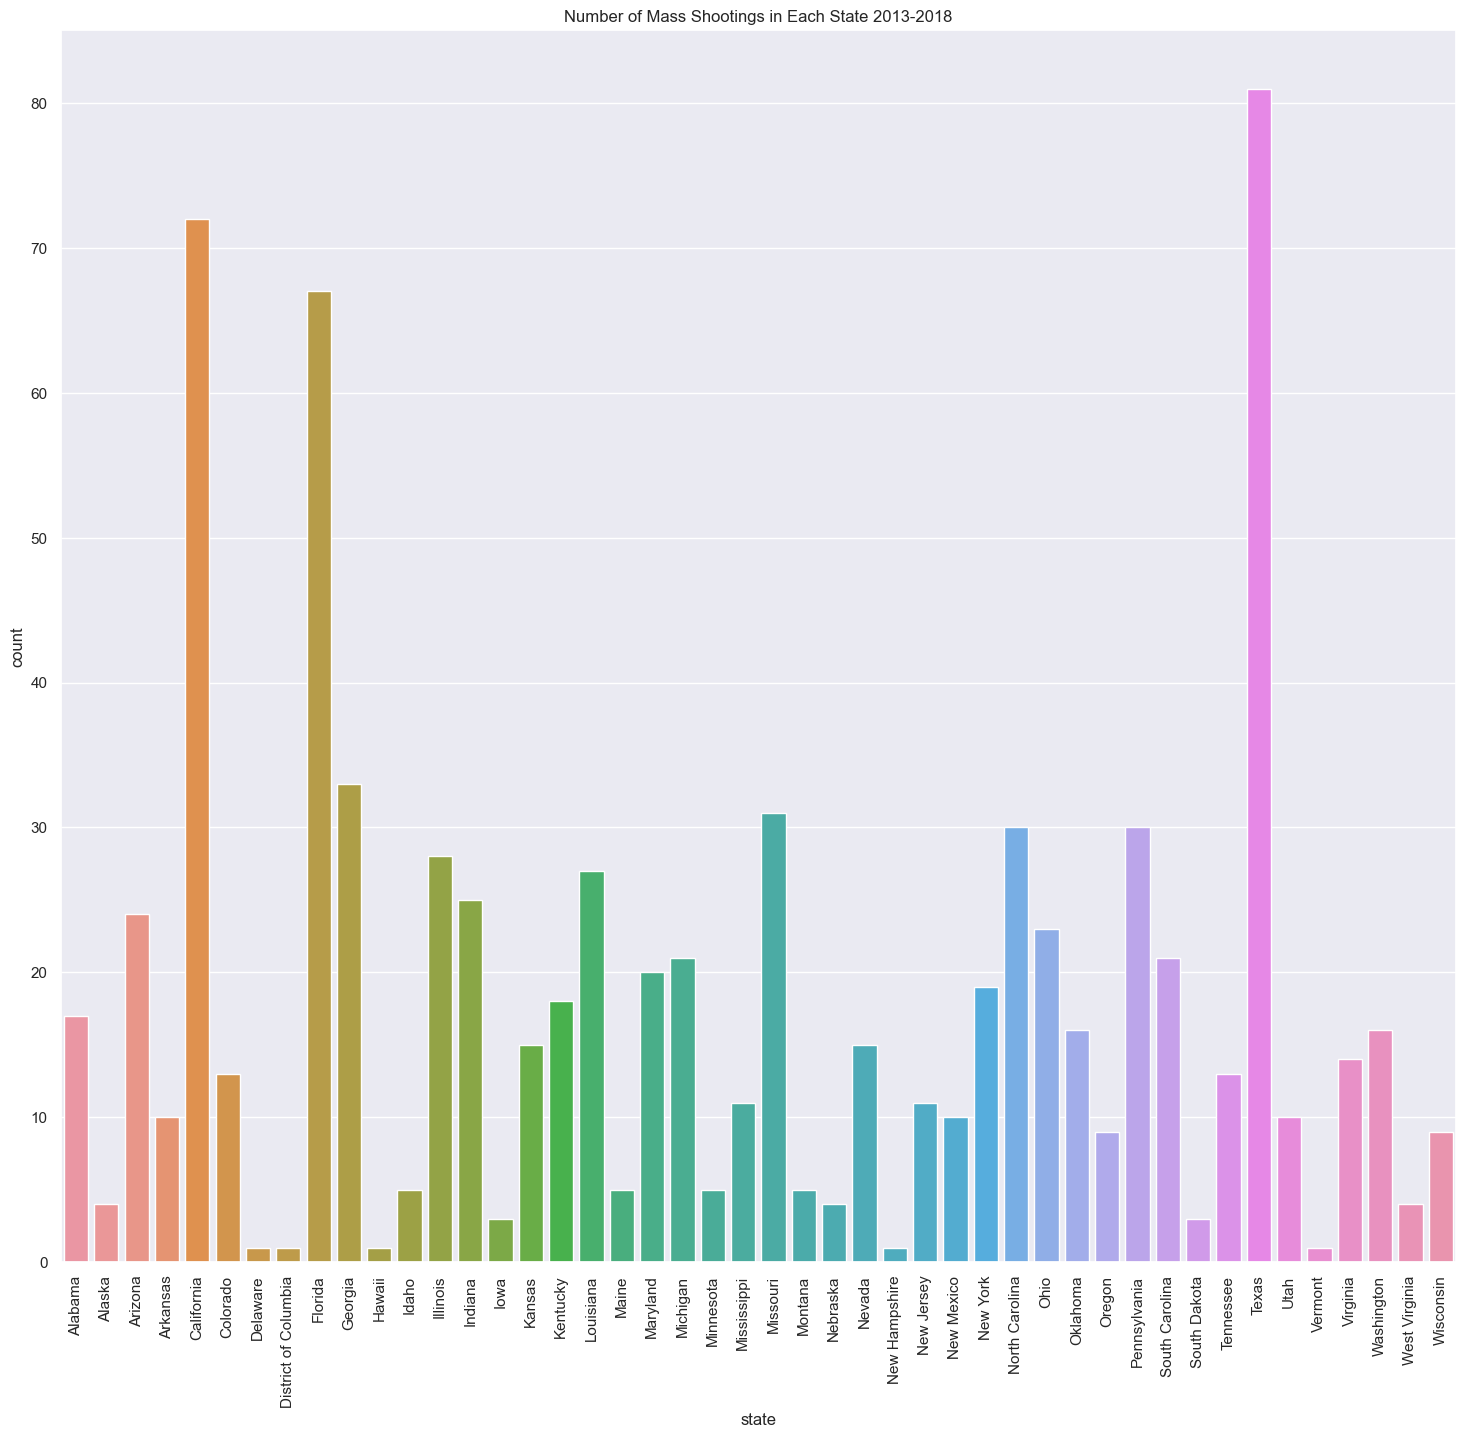

In [109]:
sns.set(rc={'figure.figsize': (18, 16)})
sns.countplot(gun_df.state).set(title='Number of Mass Shootings in Each State 2013-2018')
plt.xticks(rotation =90)

Like we have found in the choropleth map, California, Florida and Texas have the highest numbers of mass shootings.


#### Number of people killed for each state

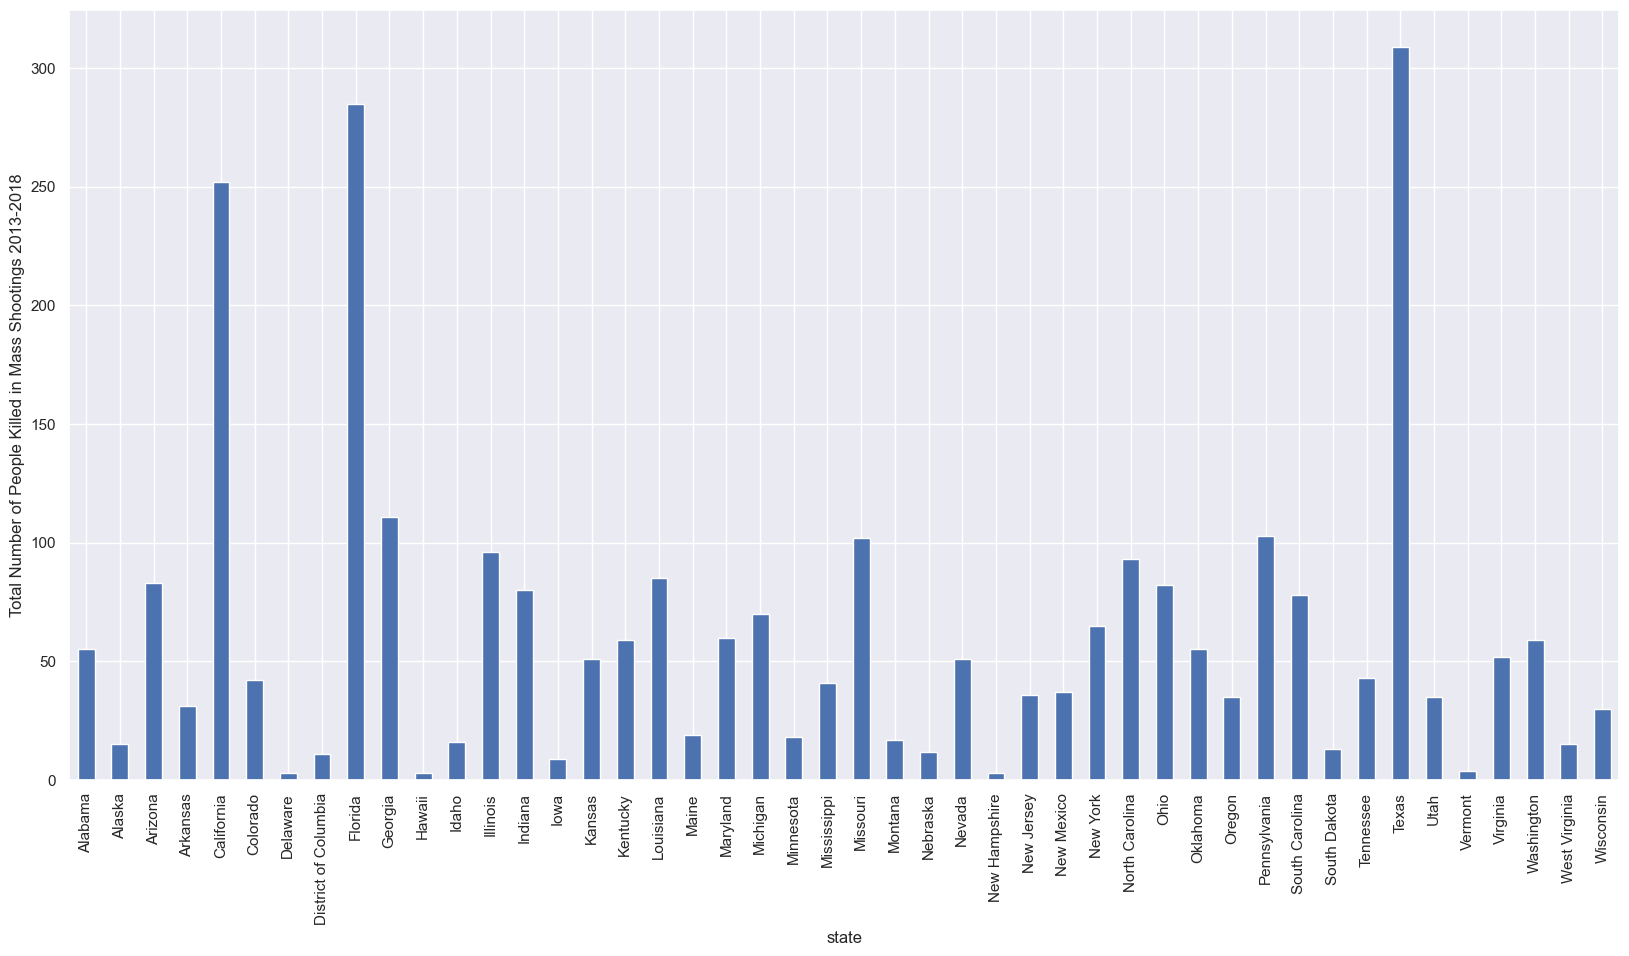

In [110]:
killed_df = gun_df.groupby('state')['n_killed'].sum()

ax = killed_df.plot.bar(figsize=(20,10), ylabel = "Total Number of People Killed in Mass Shootings 2013-2018")
plt.show()

In this bar chart we can see that the states with the highest number of people killed are California, Florida, and Texas.

#### Average number of people killed per incident for each state

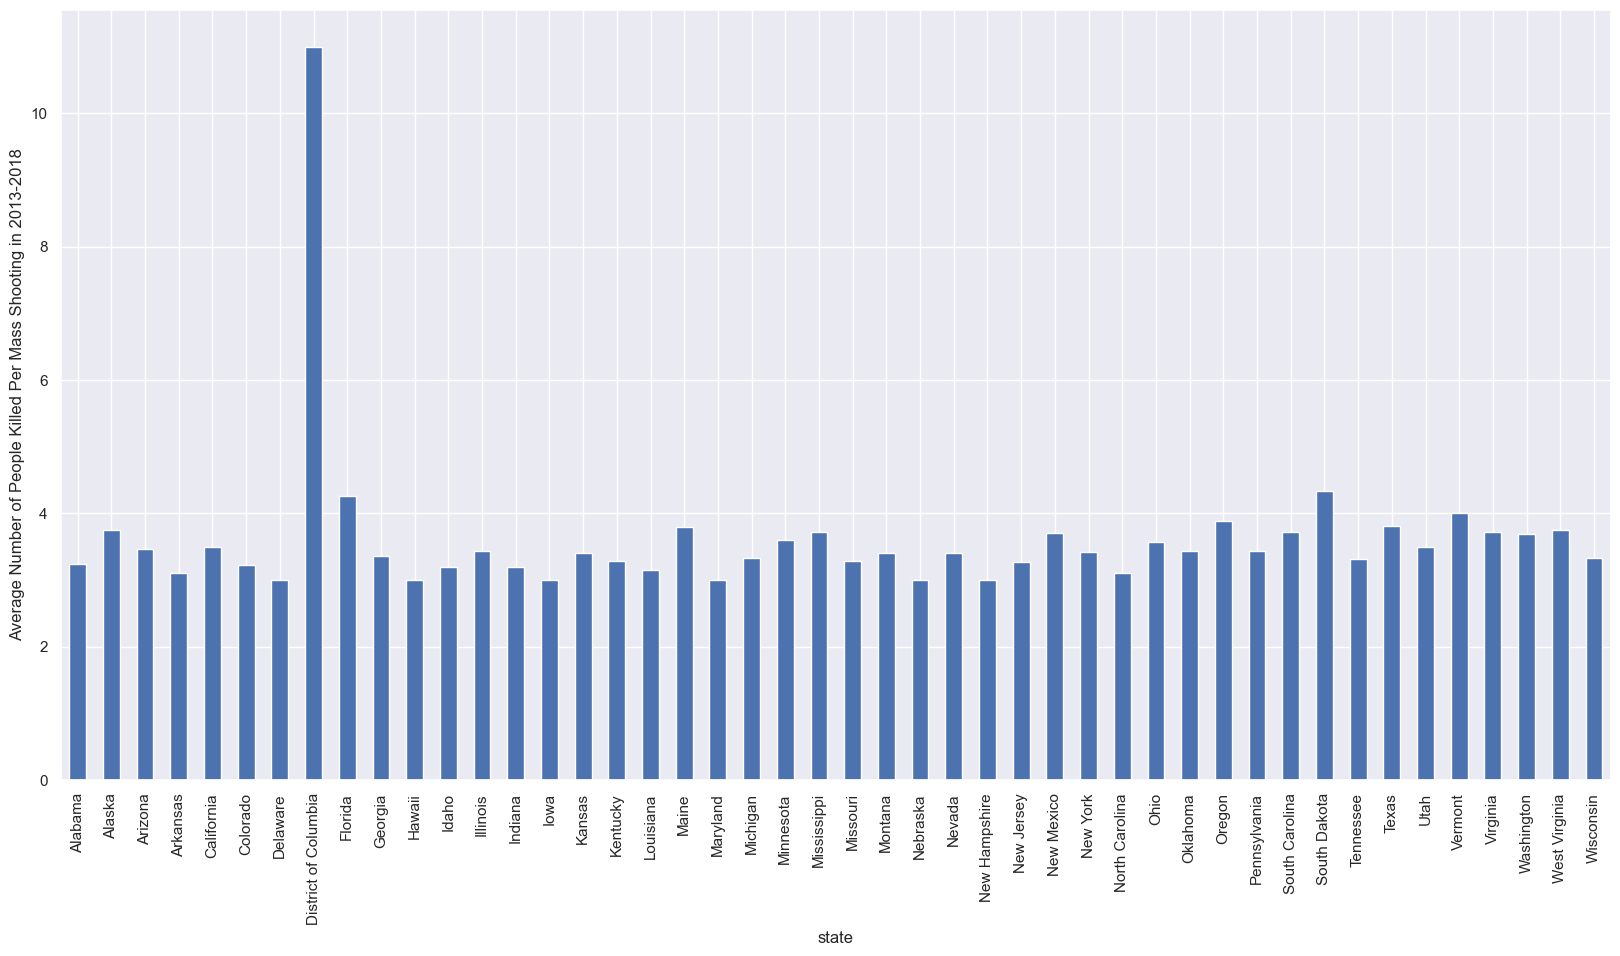

In [111]:
killed_avg_df = gun_df.groupby('state')['n_killed'].mean()

ax = killed_avg_df.plot.bar(figsize=(20,10), ylabel = "Average Number of People Killed Per Mass Shooting in 2013-2018")
plt.show()

This chart shows the average number of killings per state. Washington DC has the highest, which is most likely becuase there was only 1 incident in the capitol that resulted in 10 victims. 

#### Number of people injured for each state

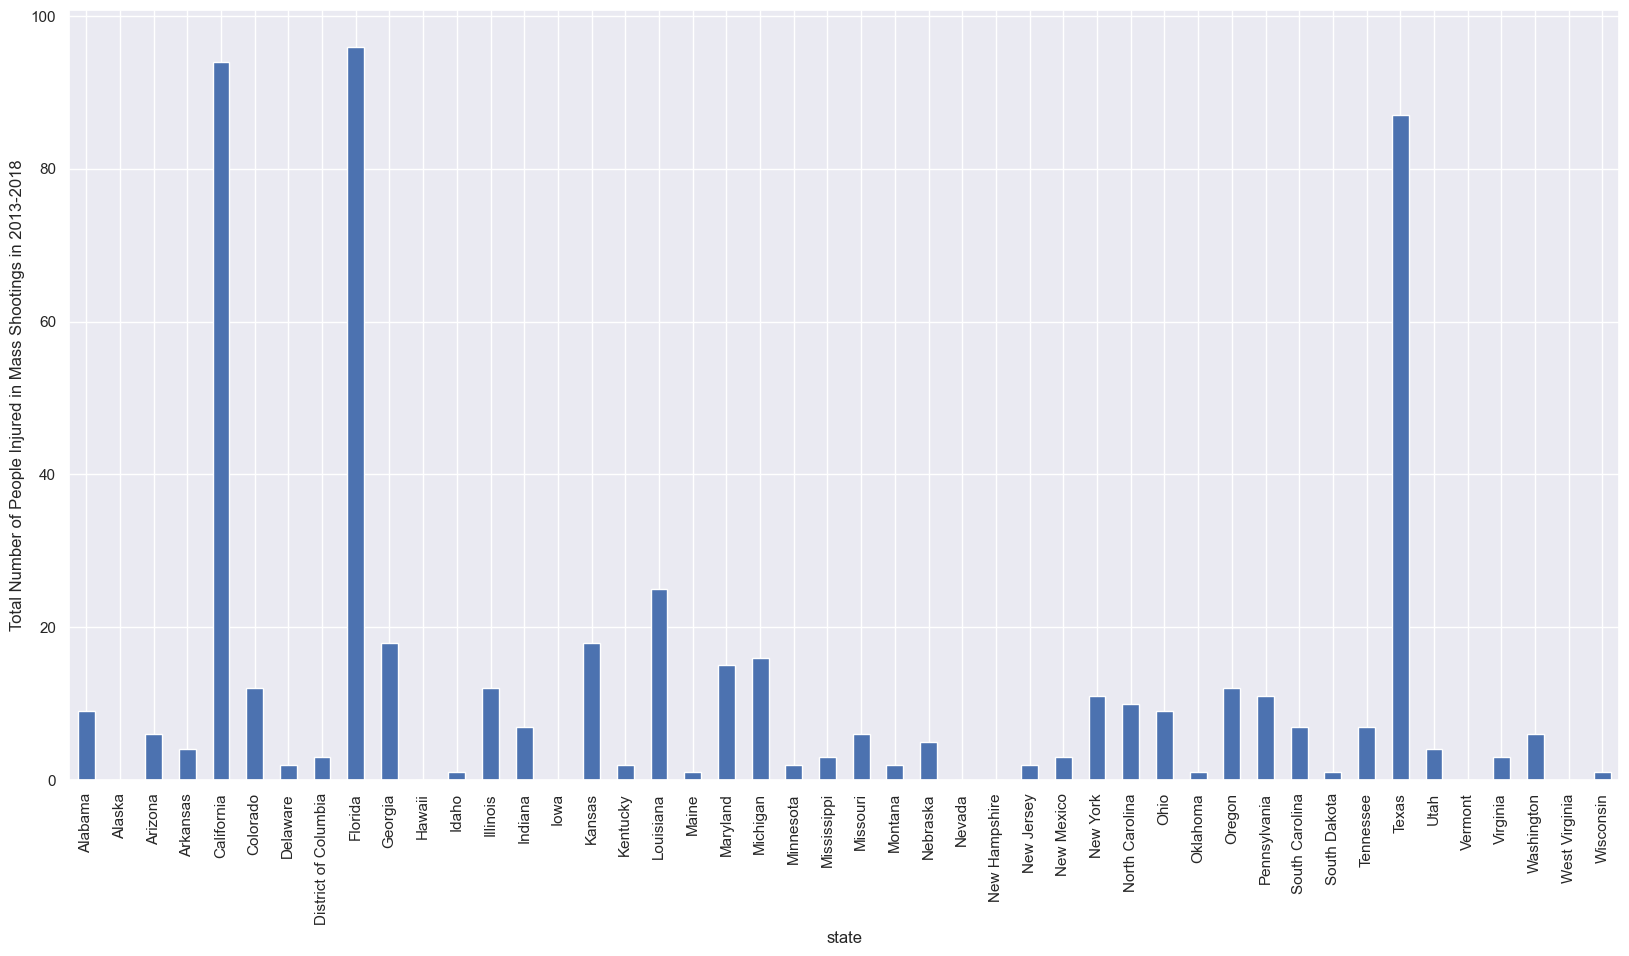

In [53]:
injured_df = gun_df.groupby('state')['n_injured'].sum()

ax = injured_df.plot.bar(figsize=(20,10), ylabel = "Total Number of People Injured in Mass Shootings in 2013-2018")
plt.show()

In this bar chart we can see that the states with the highest number of people injured are California, Florida, and Texas.

#### Average number of people injured per incident for each state

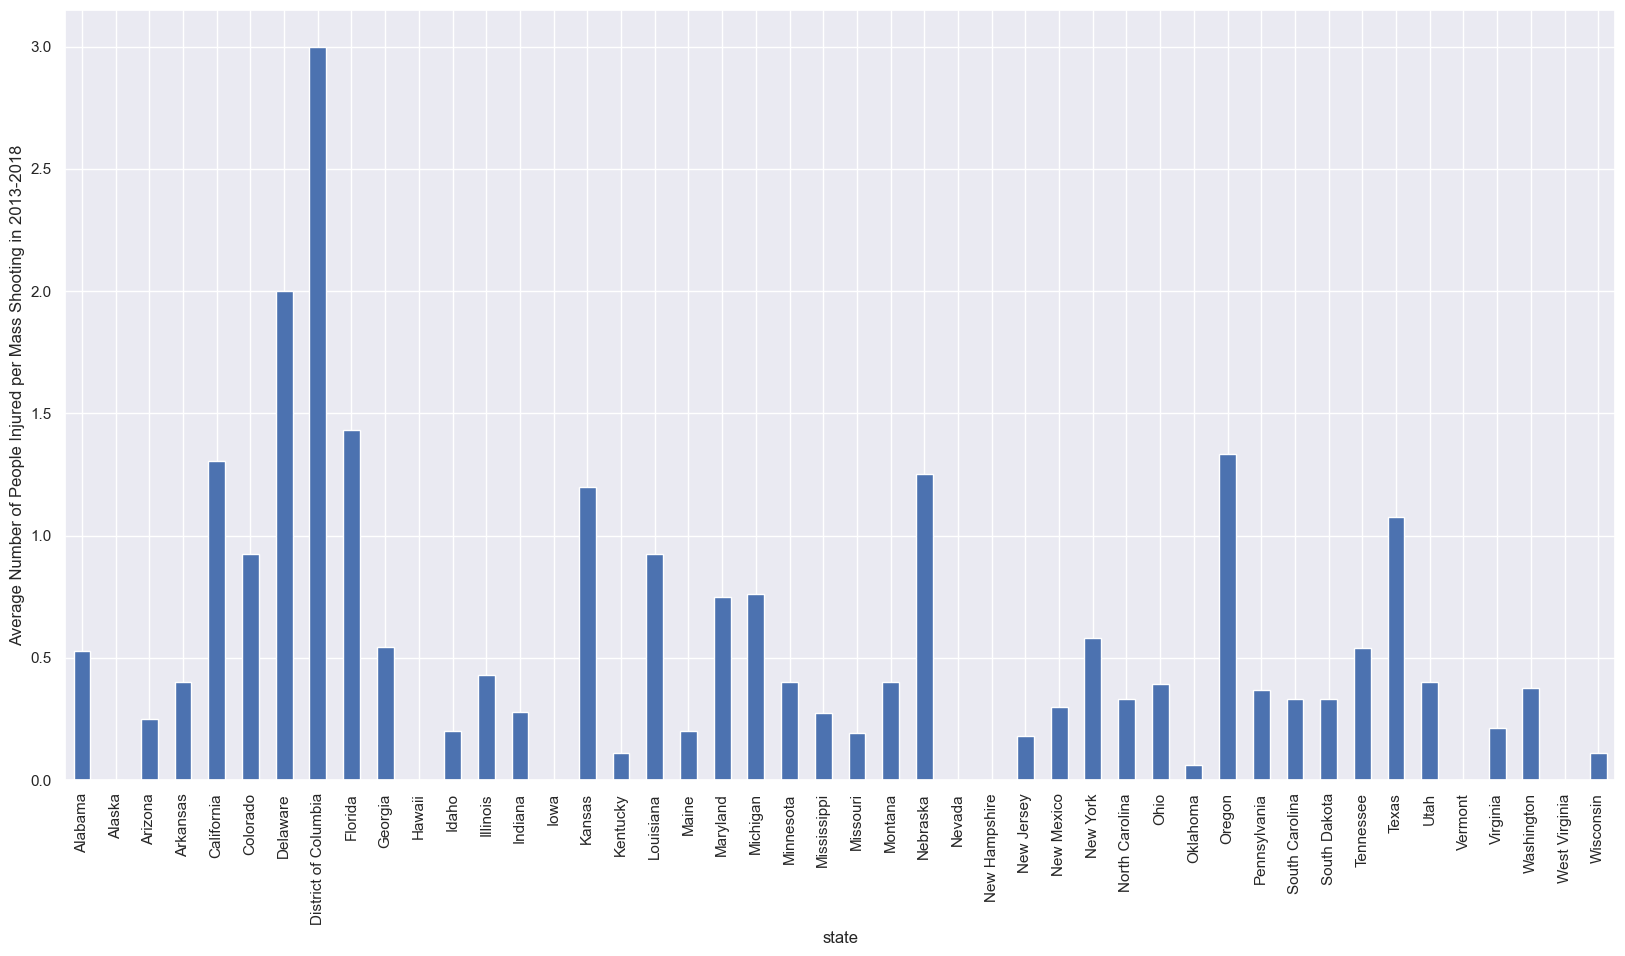

In [54]:
injured_avg_df = gun_df.groupby('state')['n_injured'].mean()

ax = injured_avg_df.plot.bar(figsize=(20,10), ylabel = "Average Number of People Injured per Mass Shooting in 2013-2018")
plt.show()

In this bar chart we can see that the states with the highest average number of people injured in a shooting is Washington DC, which is most likely because there was only 1 incident in the area. 

### Plotting the number of female and male participants

Text(0.5, 1.0, 'Number of Male and Female Participants for Mass Shootings in Each State')

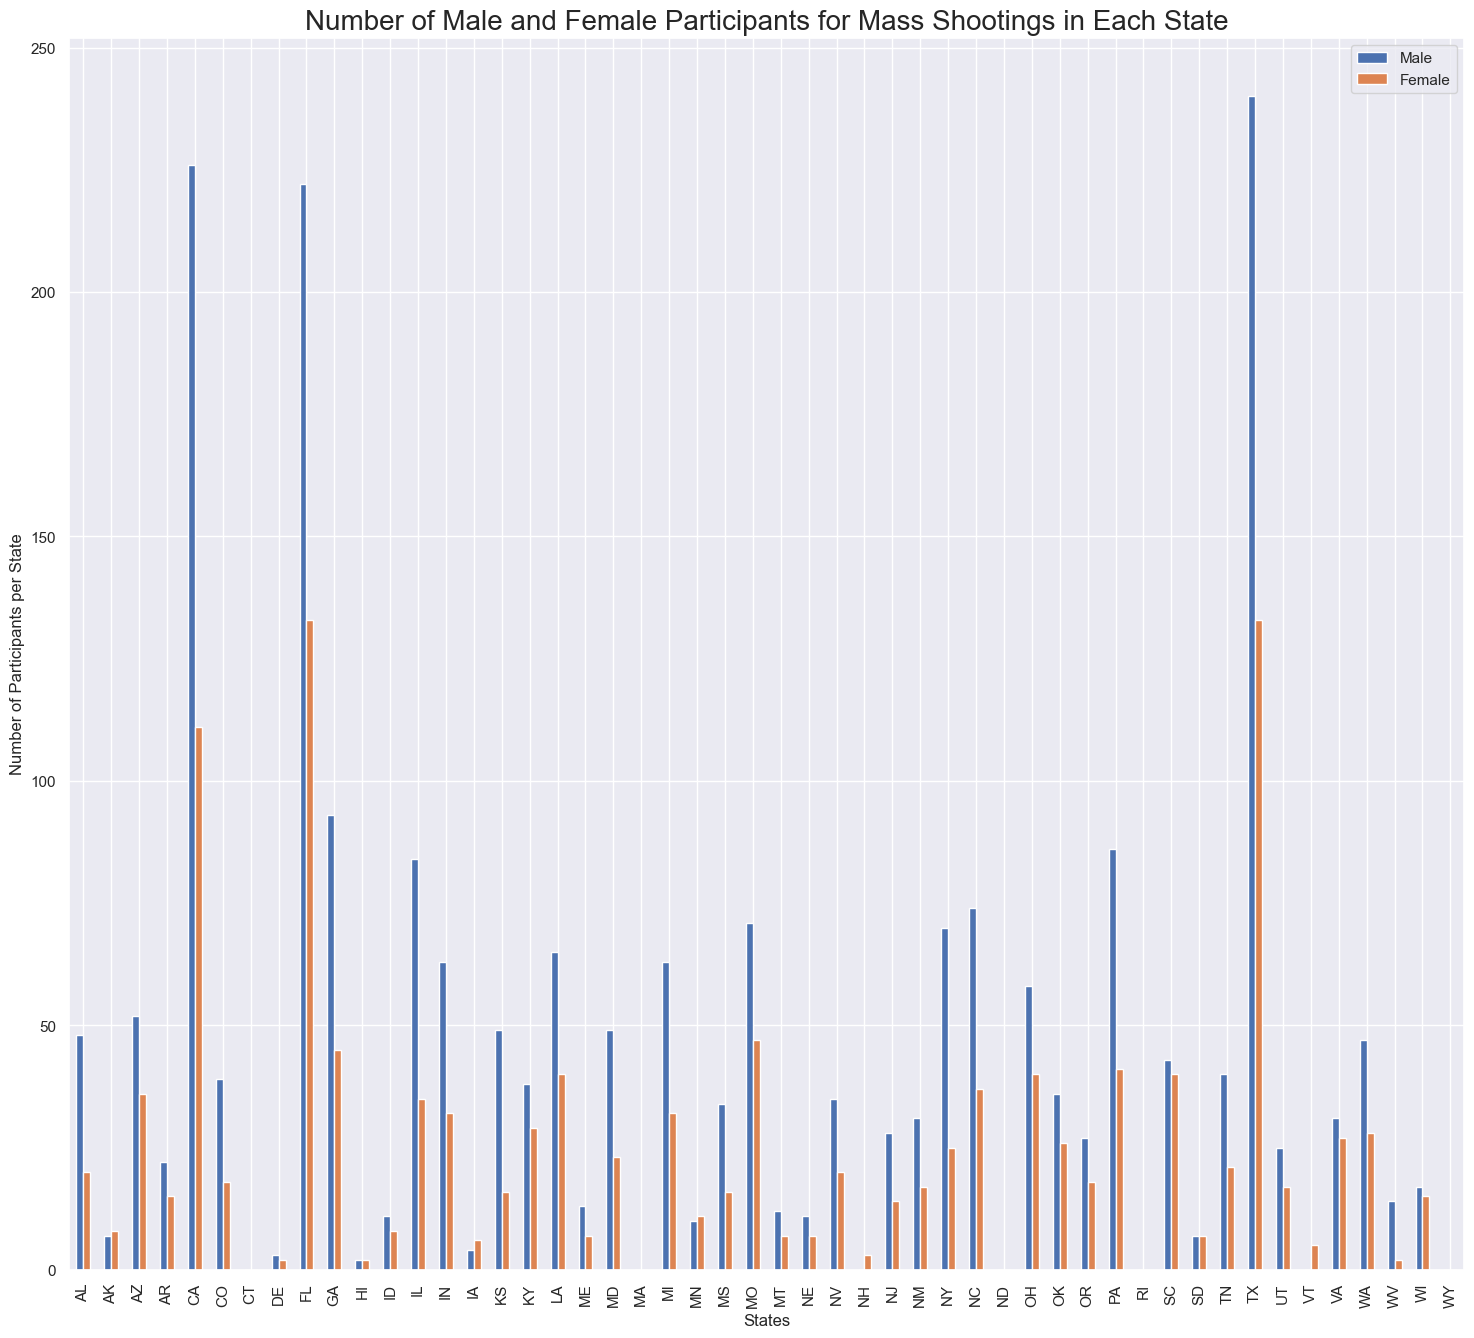

In [115]:
state_df.plot(x="state", y=["Male", "Female"], kind = "bar")
plt.xlabel("States")
plt.ylabel("Number of Participants per State")

plt.title(label = "Number of Male and Female Participants for Mass Shootings in Each State",
fontsize = 20)

Almost every state has more male participants than female participants in mass shootings. Notable exceptions are Alaska, Iowa, Minnesota, New Hampshire, South Dakota, and Vermont. Note that participants include both suspects and victims. 


### Plotting the number of child, teen and adult participants

Text(0.5, 1.0, 'Number of Child, Teen and Adult Participants for Mass Shootings in Each State')

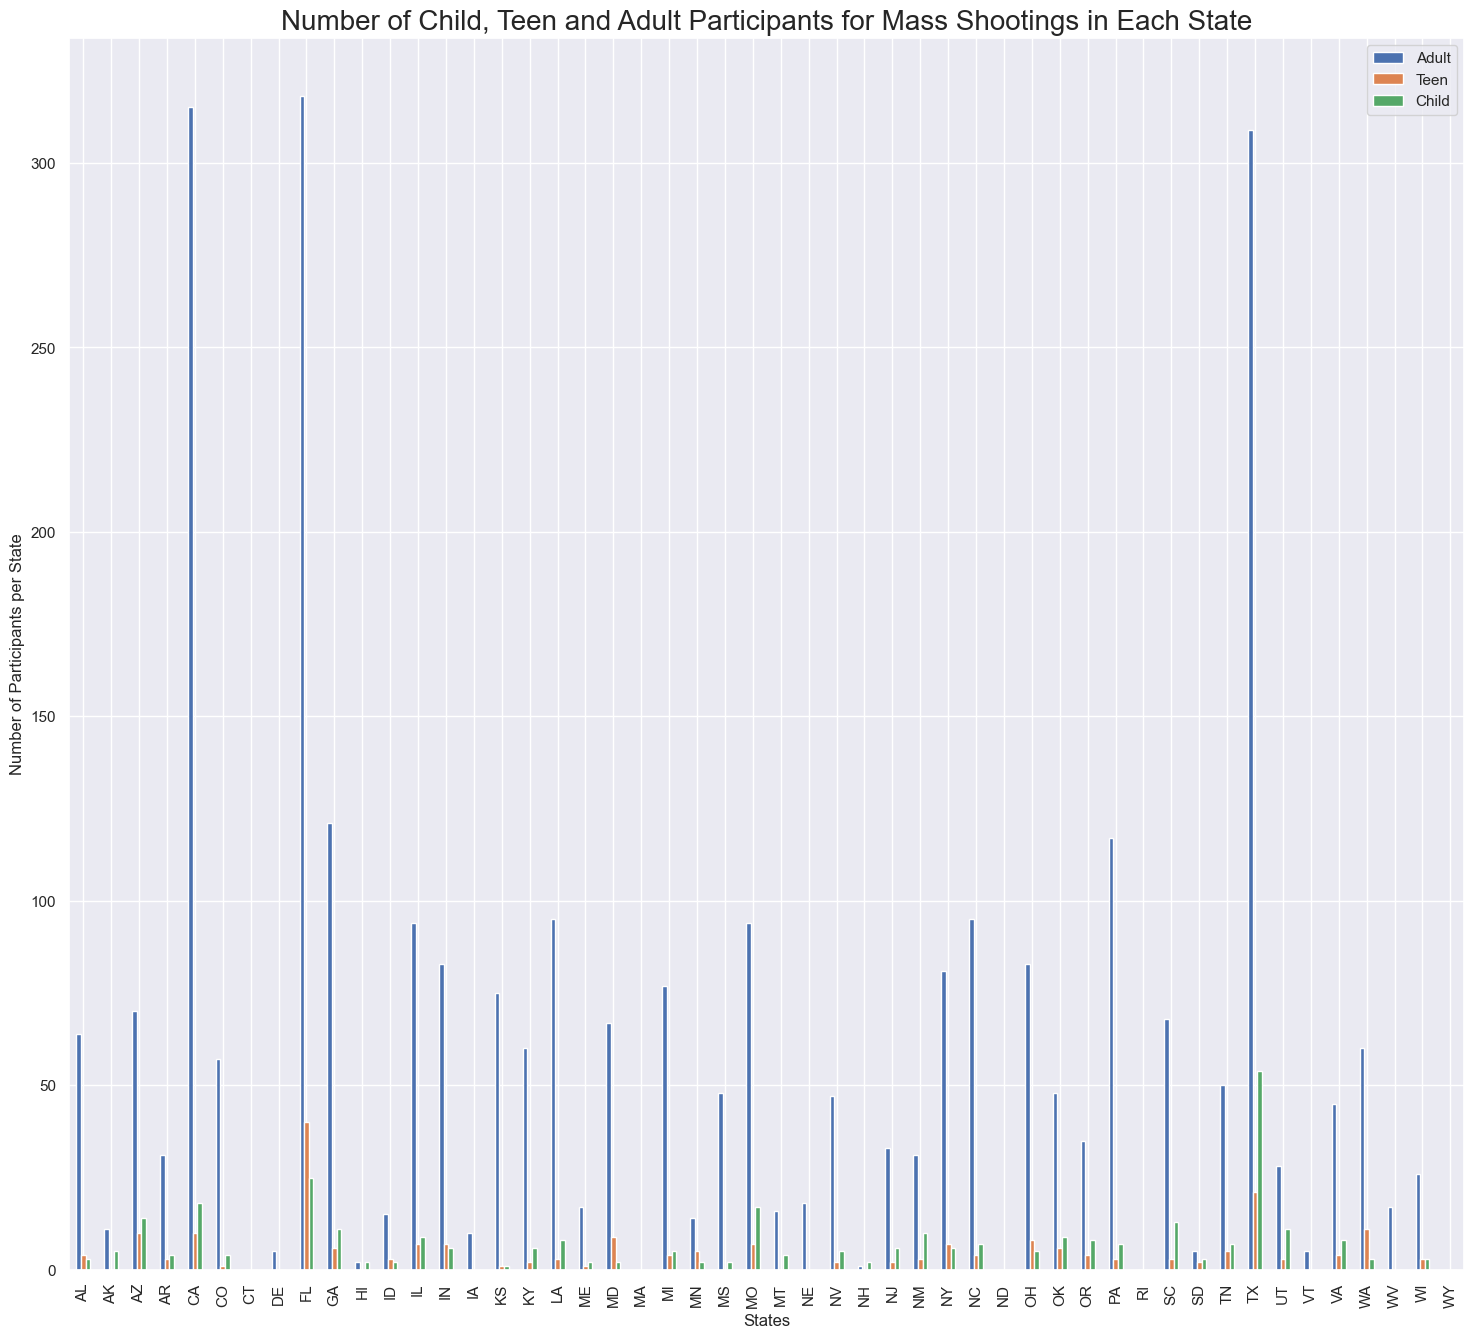

In [116]:
state_df.plot(x="state", y=["Adult", "Teen", "Child"], kind = "bar")
plt.xlabel("States")
plt.ylabel("Number of Participants per State")

plt.title(label = "Number of Child, Teen and Adult Participants for Mass Shootings in Each State",
fontsize = 20)

We can see that adults signifcantly outnumber teens and childs in every state. Given that the definition of an adult is 18+, an teen is 12-18, and a child is 0-11, it makes sense there will be more adults since adults encompasses a much larger age range than teens or childs. 

The states with most adult participants (which include both suspects and teens) are California, Florida and Texas - they each had over 300 adults involved in mass shootings from 2013 to March 2018. The states with the most teen participants and child participants are Florida and Texas. 

### Plotting victims and suspects for each state

Text(0.5, 1.0, 'Number of Victims and Suspects for Mass Shootings in Each State')

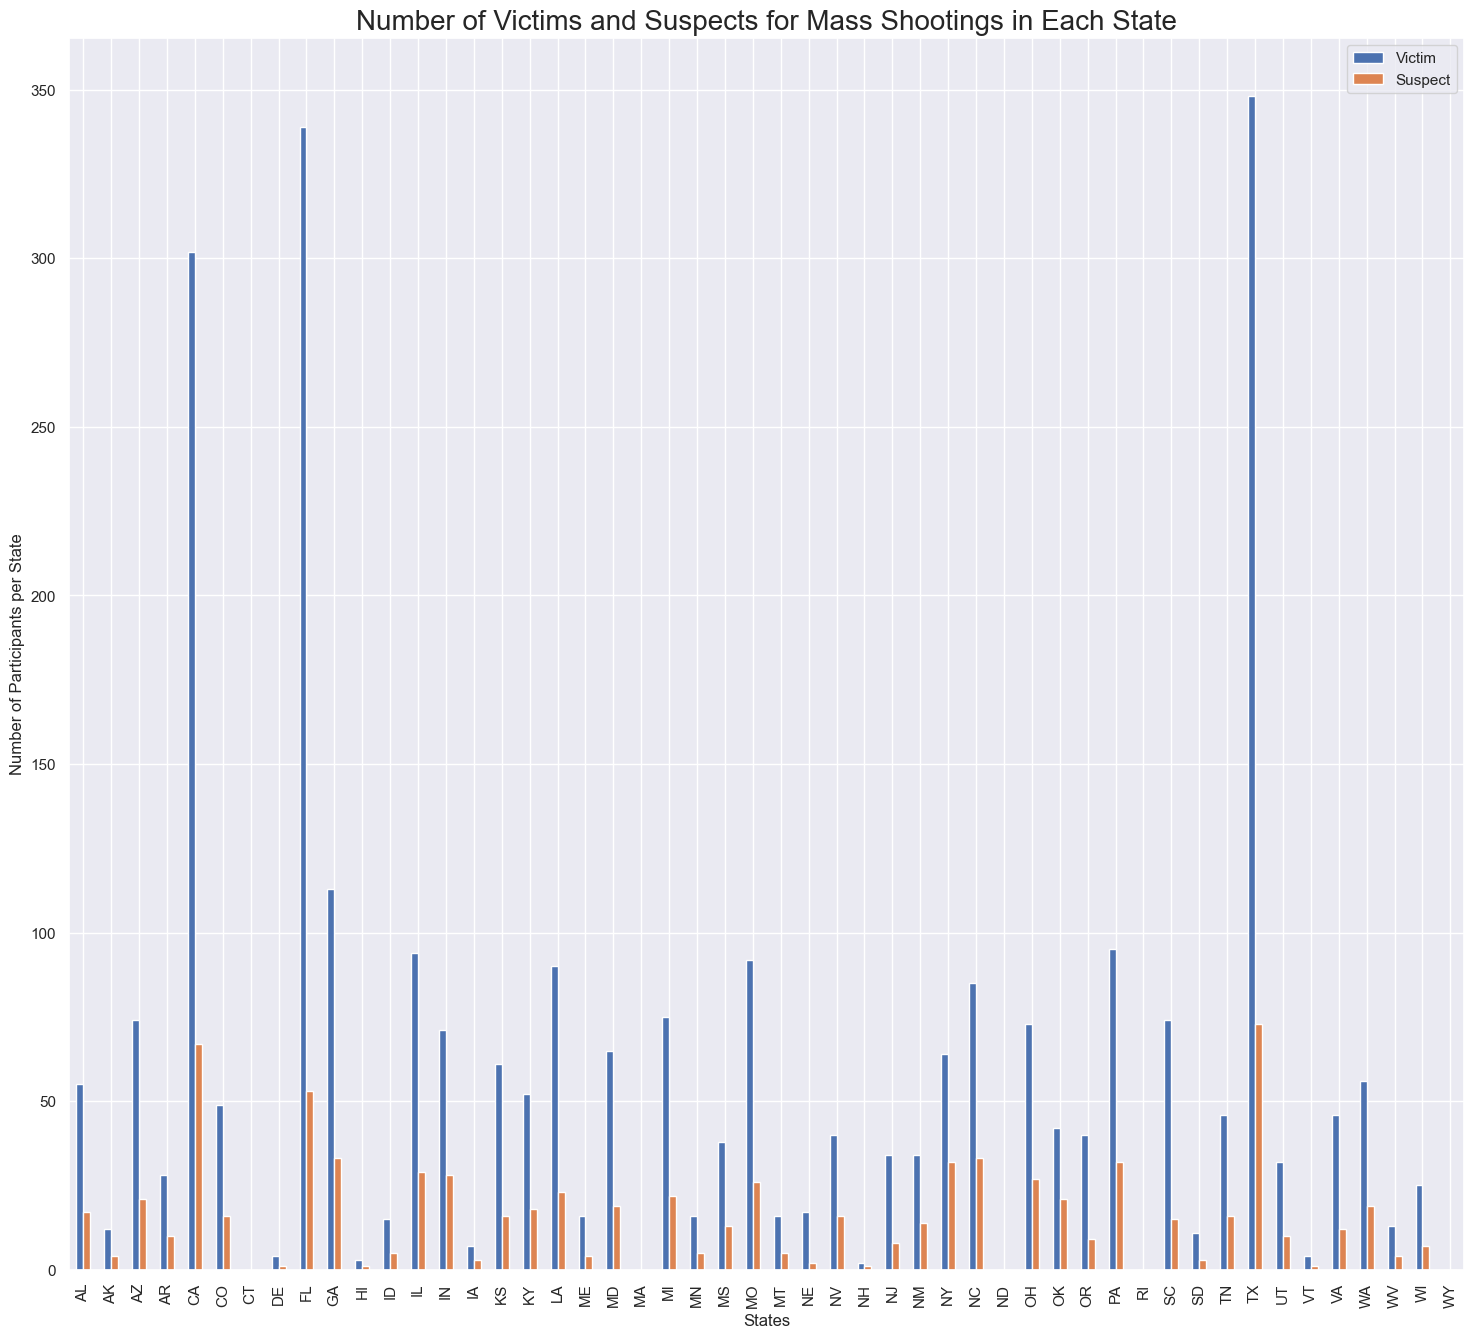

In [120]:
state_df.plot(x="state", y=["Victim", "Suspect"], kind = "bar")
plt.xlabel("States")
plt.ylabel("Number of Participants per State")

plt.title(label = "Number of Victims and Suspects for Mass Shootings in Each State",
fontsize = 20)

As expected, the number of victims far surpassed the number of suspects. The states where the ratio is more even are the states with a very low number of mass shootings - Alaska (4), Delware (1), Iowa (3), New Hampshire (1), and Vermont (1). 

### Do you remember that North Carolina was leading the country in the number of guns? Let's check out a violin plot to see the spread of NC and compare it to TX, CA, and FL

<AxesSubplot:xlabel='state', ylabel='n_guns_involved'>

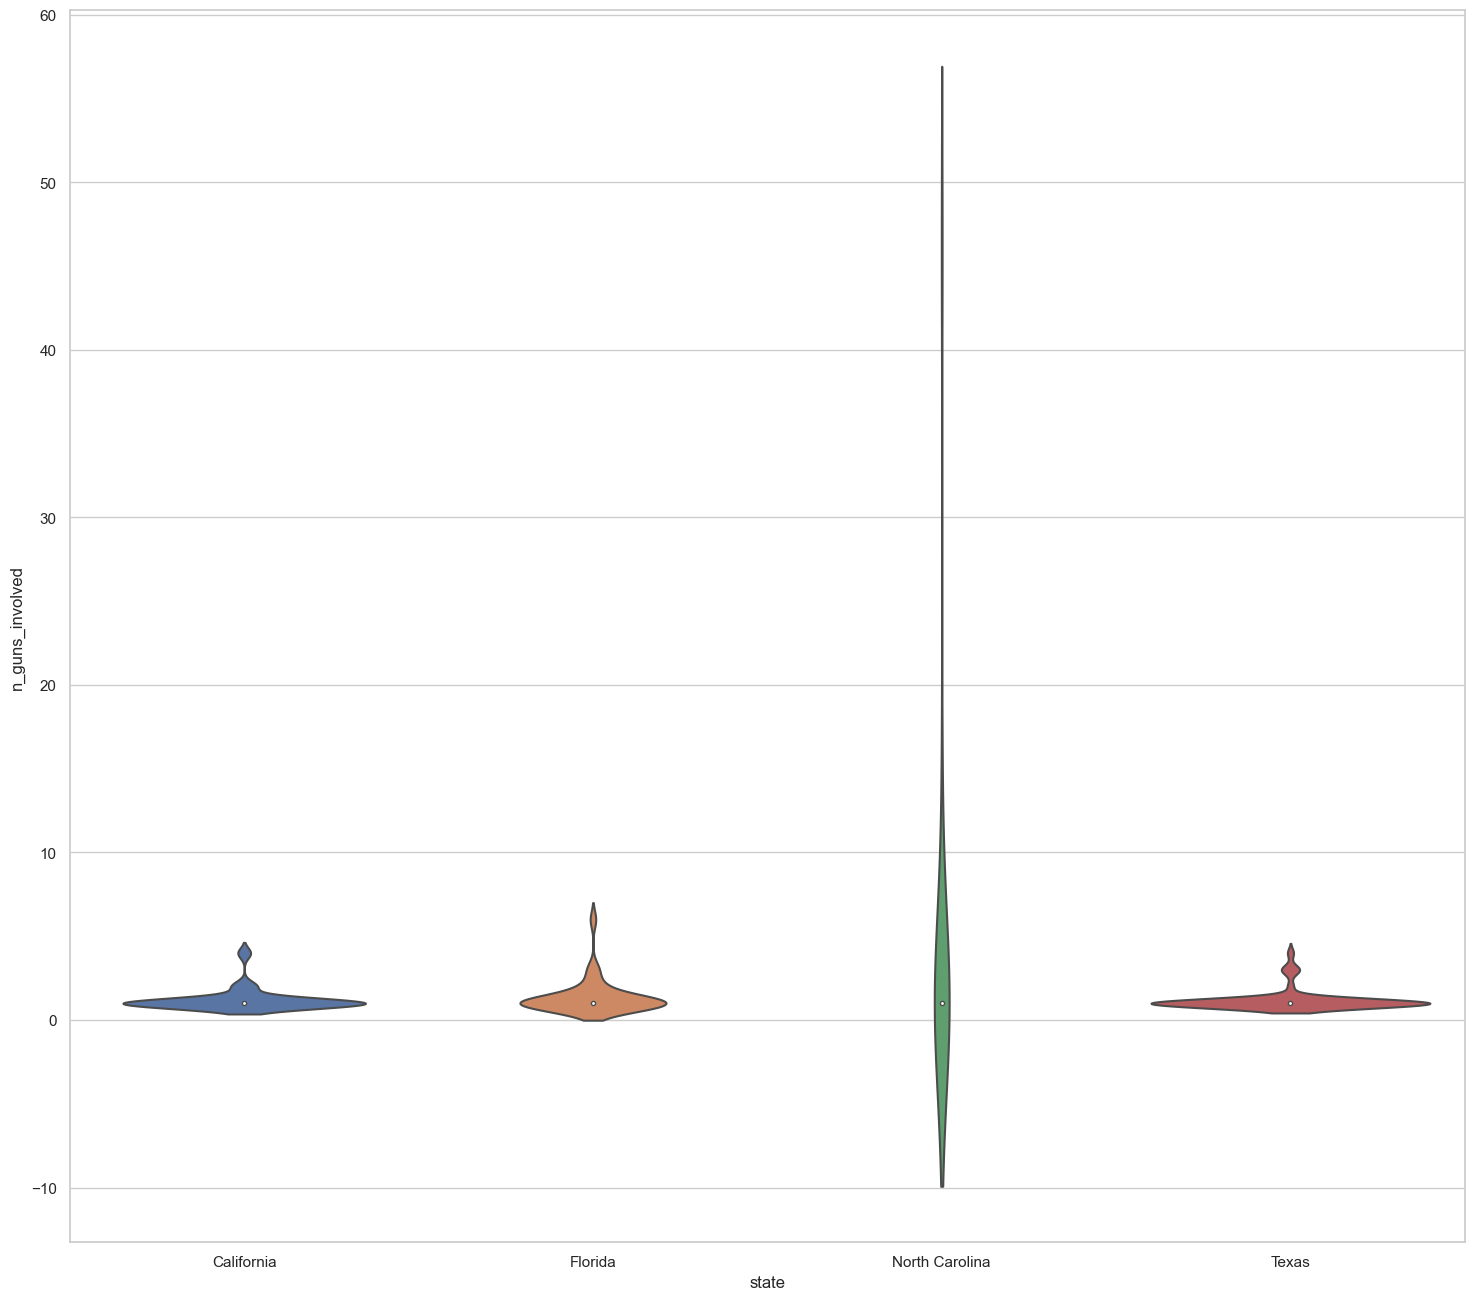

In [124]:
sub = gun_df[gun_df["state"].isin(["North Carolina", "Texas", "California", "Florida"])]

sub

sns.set(style="whitegrid")

sns.violinplot(x="state", y="n_guns_involved", data = sub)

We can that there is a HUGE spread for number of guns for Noth Carolina in comparison to the other three states - but there is a minimum of -10 guns? Let's take a closer look at North Carolina....

In [130]:
nc = gun_df[gun_df["state"].isin(["North Carolina"])]

nc.describe()

incident_id   latitude  longitude   n_killed  n_injured  \
count  3.000000e+01  30.000000  30.000000  30.000000  30.000000   
mean   4.784171e+05  35.488553 -79.656460   3.100000   0.333333   
std    3.059178e+05   0.507208   1.362719   0.305129   0.546672   
min    1.062150e+05  34.294000 -82.581300   3.000000   0.000000   
25%    2.267772e+05  35.163300 -80.809475   3.000000   0.000000   
50%    4.145740e+05  35.423600 -79.509400   3.000000   0.000000   
75%    6.889405e+05  35.864450 -78.589575   3.000000   1.000000   
max    1.069566e+06  36.345700 -77.583800   4.000000   2.000000   

       Number_Unknown_Guns  Number_Stolen_Guns  Number_Not_Stolen_Guns  \
count            30.000000                30.0                    30.0   
mean              2.900000                 0.0                     0.0   
std               8.429628                 0.0                     0.0   
min               1.000000                 0.0                     0.0   
25%               1.000000                 0.0                     0.0   
50%               1.000000                 0.0                     0.0   
75%               1.000000                 0.0                     0.0   
max              46.000000                 0.0                     0.0   

       n_guns_involved  Unknown_Guns  ...  Unknown_Gender       Male  \
count        21.000000     30.000000  ...            30.0  30.000000   
mean          3.714286      2.033333  ...             0.0   2.466667   
std          10.035651      8.318999  ...             0.0   1.502488   
min           1.000000      0.000000  ...             0.0   0.000000   
25%           1.000000      0.000000  ...             0.0   2.000000   
50%           1.000000      1.000000  ...             0.0   2.000000   
75%           1.000000      1.000000  ...             0.0   3.750000   
max          46.000000     46.000000  ...             0.0   5.000000   

          Female  Unknown_Age      Adult       Teen      Child  Unknown_Type  \
count  30.000000         30.0  30.000000  30.000000  30.000000          30.0   
mean    1.233333          0.0   3.166667   0.133333   0.233333           0.0   
std     0.935261          0.0   1.821014   0.434172   0.626062           0.0   
min     0.000000          0.0   0.000000   0.000000   0.000000           0.0   
25%     0.250000          0.0   2.000000   0.000000   0.000000           0.0   
50%     1.000000          0.0   3.500000   0.000000   0.000000           0.0   
75%     2.000000          0.0   4.000000   0.000000   0.000000           0.0   
max     3.000000          0.0   7.000000   2.000000   2.000000           0.0   

          Victim    Suspect  
count  30.000000  30.000000  
mean    2.833333   1.100000  
std     1.053183   0.711967  
min     0.000000   0.000000  
25%     2.250000   1.000000  
50%     3.000000   1.000000  
75%     3.000000   1.000000  
max     5.000000   3.000000  

[8 rows x 25 columns]

According to the describe function, the minimum of n_guns_involved of an incident in North Carolina is 1, not -10 as displayed on the violin plot. We do see that there is an incident where the maximum of 46 guns were involved, which definitely helped propel North Carolina past Florida, California and Texas. 

## Regression Models

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [56]:
labelencoder=LabelEncoder()
gun_mute = gun_state_sum_df.copy()
gun_mute['abbrev'] = labelencoder.fit_transform(gun_mute['abbrev'])
gun_mute = gun_mute.fillna(0)
gun_mute.sample(5)

abbrev  n_killed  n_injured  n_guns_involved  n_incidents  Male  \
state                                                                        
Nevada         33        51          0              9.0           15  35.0   
Colorado        5        42         12             12.0           13  39.0   
Tennessee      42        43          7             11.0           13  40.0   
Wisconsin      48        30          1             10.0            9  17.0   
Minnesota      23        18          2              5.0            5  10.0   

           Female  Adult  Teen  Child  Victim  Suspect  Unknown_Guns  Handgun  \
state                                                                           
Nevada       20.0   47.0   2.0    5.0    40.0     16.0           9.0      0.0   
Colorado     18.0   57.0   1.0    4.0    49.0     16.0           6.0      3.0   
Tennessee    21.0   50.0   5.0    7.0    46.0     16.0           4.0      3.0   
Wisconsin    15.0   26.0   3.0    3.0    25.0      7.0           5.0      3.0   
Minnesota    11.0   14.0   5.0    2.0    16.0      5.0           3.0      1.0   

           Shotgun  Rifle  Other  Automatic  
state                                        
Nevada         0.0    0.0    0.0        0.0  
Colorado       0.0    0.0    0.0        3.0  
Tennessee      0.0    0.0    1.0        3.0  
Wisconsin      0.0    2.0    0.0        0.0  
Minnesota      1.0    0.0    0.0        0.0

### Number Killed as Response Variable

In [57]:
y = gun_mute['n_killed']
X = gun_mute.drop(columns = ['n_killed'])

In [58]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(3254)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.9965566328062053
RMSE mean:
 1.8420097957360617

DecisionTreeRegressor(random_state=42)
r2 mean:
 0.9268234733030623
RMSE mean:
 10.626848250651868

RandomForestRegressor(random_state=42)
r2 mean:
 0.9402784853712701
RMSE mean:
 10.88937548903946

Lasso()
r2 mean:
 0.9928474657724993
RMSE mean:
 2.8551898869573504

Ridge()
r2 mean:
 0.9955014773836645
RMSE mean:
 2.0827286395189923


From the models, we see that linear regression is the best choice as a model where number of killed is the response variable. We obtained an R2 value of 0.9965 and an RSME value of 1.842.

In [59]:
best_model = LinearRegression().fit(X,y)
y_pred=best_model.predict(X)

In [60]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.98


#### Predicted vs Actual - Number of Killed

Text(0.5, 0.98, 'Predicted vs Actual - Number of Killed')

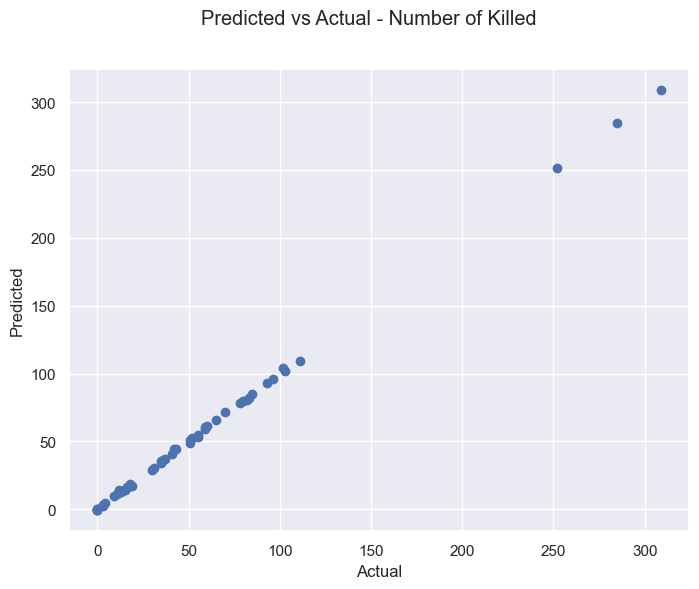

In [61]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Number of Killed")

### Number of Suspects as Response Variable

In [62]:
y = gun_mute['Suspect']
X = gun_mute.drop(columns = ['Suspect'])

In [63]:
random.seed(3654)
for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.8922194489202834
RMSE mean:
 4.033503658091632

DecisionTreeRegressor(random_state=42)
r2 mean:
 0.7825329139197567
RMSE mean:
 5.128338168729526

RandomForestRegressor(random_state=42)
r2 mean:
 0.898218940346438
RMSE mean:
 3.8745232105086993

Lasso()
r2 mean:
 0.9424417394171035
RMSE mean:
 2.693011335010272

Ridge()
r2 mean:
 0.9312801125374979
RMSE mean:
 3.1568712594182062


From the models, we see that Lasso Regression is the best choice as a model where number of suspects is the response variable. We obtained an R2 value of 0.942 and an RSME value of 2.693.

In [64]:
best_model = Lasso().fit(X,y)
y_pred=best_model.predict(X)

In [65]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 98.96


#### Predicted vs Actual - Number of Suspects

Text(0.5, 0.98, 'Predicted vs Actual - Number of Suspects')

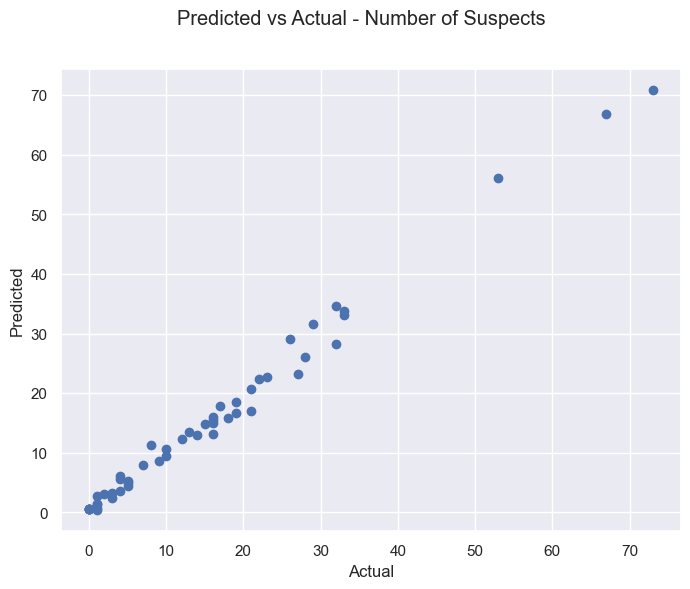

In [66]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Number of Suspects")

### Number of Injured as Response Variable

In [67]:
y = gun_mute['n_injured']
X = gun_mute.drop(columns = ['n_injured'])

In [68]:
random.seed(12)
for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.7185962405800719
RMSE mean:
 3.485591011904053

DecisionTreeRegressor(random_state=42)
r2 mean:
 -0.14460360339814932
RMSE mean:
 5.570457093950436

RandomForestRegressor(random_state=42)
r2 mean:
 -0.41659170430513087
RMSE mean:
 6.8574971147484005

Lasso()
r2 mean:
 0.8448613957816878
RMSE mean:
 2.3317394555137874

Ridge()
r2 mean:
 0.8867135691367123
RMSE mean:
 1.8128296047274446


From the models, we see that Ridge Regression is the best choice as a model where number of injured is the response variable. We obtained an R2 value of 0.887 and an RSME value of 1.8128.

In [69]:
best_model = Ridge().fit(X,y)
y_pred=best_model.predict(X)

In [70]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.64


#### Predicted vs Actual - Number of Injured

Text(0.5, 0.98, 'Predicted vs Actual - Number of Injured')

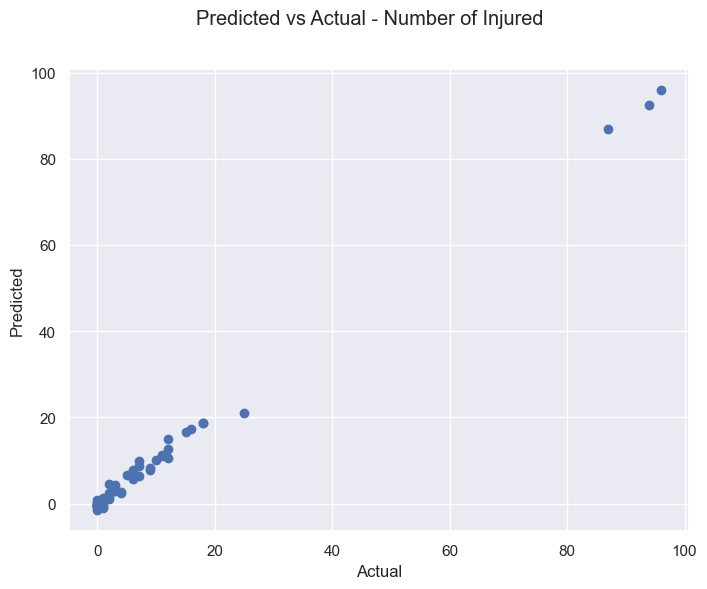

In [71]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Number of Injured")

### Number of Incidents as Response Variable

In [72]:
y = gun_mute['n_incidents']
X = gun_mute.drop(columns = ['n_incidents'])

In [73]:
random.seed(12)
for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.8774513165384473
RMSE mean:
 3.327151044690735

DecisionTreeRegressor(random_state=42)
r2 mean:
 0.9467886143433457
RMSE mean:
 2.443258892010001

RandomForestRegressor(random_state=42)
r2 mean:
 0.9396335503063158
RMSE mean:
 2.942186388829498

Lasso()
r2 mean:
 0.9666961003111426
RMSE mean:
 1.8105368927185232

Ridge()
r2 mean:
 0.9264087436899044
RMSE mean:
 2.607976601740459


From the models, we see that Lasso Regression is the best choice as a model where number of incidents is the response variable. We obtained an R2 value of 0.967 and an RSME value of 1.8105.

In [74]:
best_model = Lasso().fit(X,y)
y_pred=best_model.predict(X)

In [75]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.61


#### Predicted vs Actual - Number of Incidents

Text(0.5, 0.98, 'Predicted vs Actual - Number of Incidents')

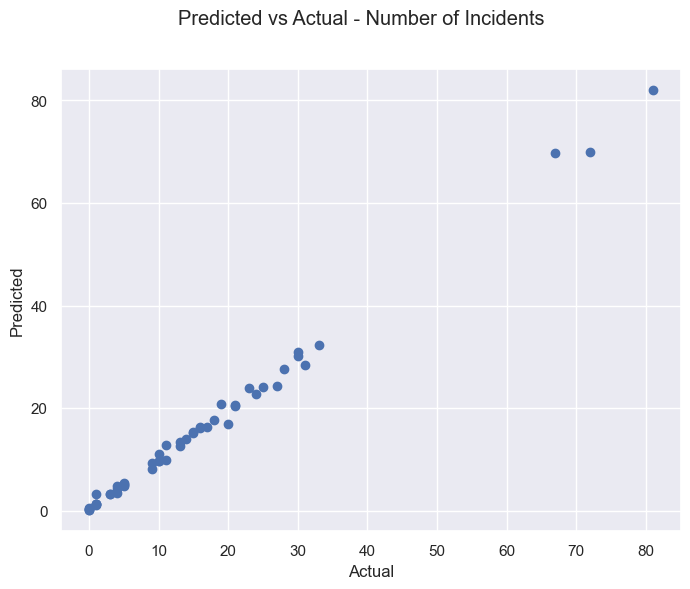

In [76]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Number of Incidents")

### Rifle Gun Type as Response Variable

In [77]:
y = gun_mute['Rifle']
X = gun_mute.drop(columns = ['Rifle'])

In [78]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(245)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.33865572712161296
RMSE mean:
 0.4161310635578147

DecisionTreeRegressor(random_state=42)
r2 mean:
 -5.557924263674613
RMSE mean:
 1.5107393678470231

RandomForestRegressor(random_state=42)
r2 mean:
 -1.4383568796750814
RMSE mean:
 1.1828824607571093

Lasso()
r2 mean:
 -0.2262658733977677
RMSE mean:
 0.9278339587944144

Ridge()
r2 mean:
 0.08120316737300645
RMSE mean:
 0.527044467877678


From the models, we see that linear regression is the best choice as a model where number of killed is the response variable. We obtained an R2 value of 0.338 and an RSME value of 0.416. However this most is not very great, which we will see with the predicted vs actual plot. 

In [79]:
best_model = LinearRegression().fit(X,y)
y_pred=best_model.predict(X)

In [80]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.37


#### Predicted vs Actual - Rifle Gun Type

Text(0.5, 0.98, 'Predicted vs Actual - Rifle Type')

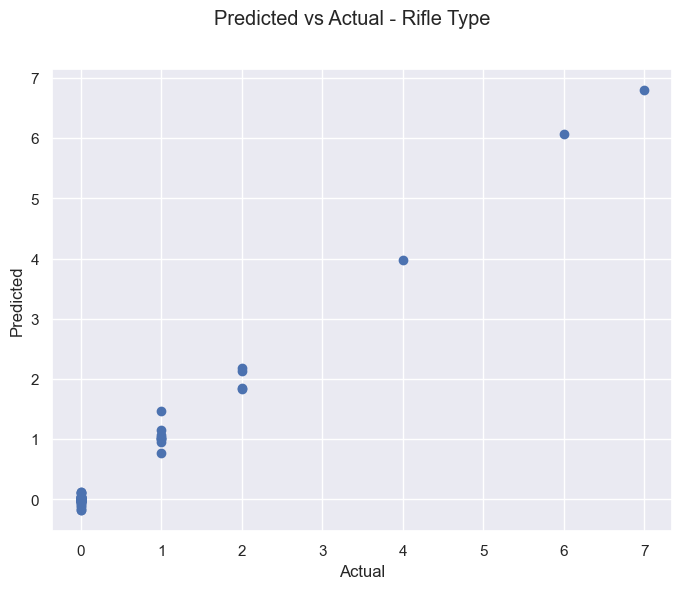

In [81]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Rifle Type")

### Handgun Type as Response Variable

In [82]:
y = gun_mute['Handgun']
X = gun_mute.drop(columns = ['Handgun'])

In [83]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(135)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.954877209912139
RMSE mean:
 0.4185242276032515

DecisionTreeRegressor(random_state=42)
r2 mean:
 -0.1122664969749763
RMSE mean:
 2.347196190144369

RandomForestRegressor(random_state=42)
r2 mean:
 0.3681764087413823
RMSE mean:
 1.7328243326047132

Lasso()
r2 mean:
 0.6690504832312211
RMSE mean:
 1.2920509742599833

Ridge()
r2 mean:
 0.9649082104794291
RMSE mean:
 0.3643244303988391


From the models, we see that Ridge regression is the best choice as a model where number of handguns is the response variable. We obtained an R2 value of 0.965 and an RSME value of 0.364.

In [84]:
best_model = Ridge().fit(X,y)
y_pred=best_model.predict(X)

In [85]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.73


#### Predicted vs Actual - Handgun Type

Text(0.5, 0.98, 'Predicted vs Actual - Handgun Type')

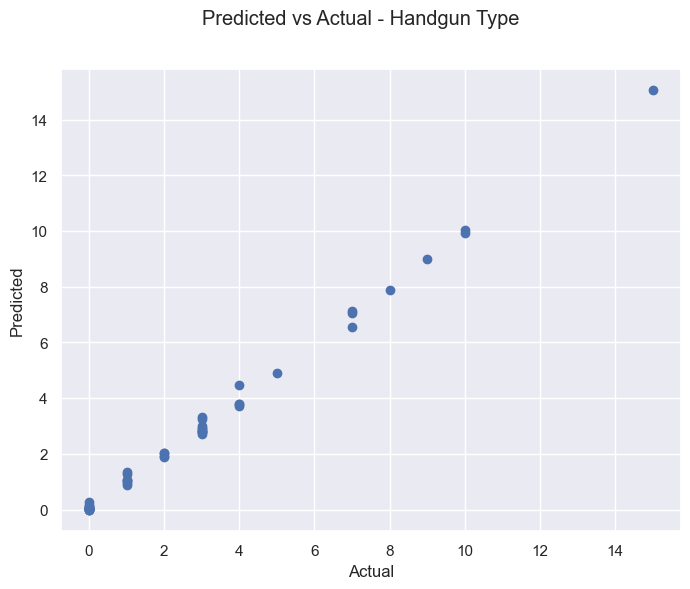

In [86]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Handgun Type")

### Shotgun Type as Response Variable

In [87]:
y = gun_mute['Shotgun']
X = gun_mute.drop(columns = ['Shotgun'])

In [88]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(65)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.5338095477303836
RMSE mean:
 0.438665208570628

DecisionTreeRegressor(random_state=42)
r2 mean:
 -0.3692460317460317
RMSE mean:
 0.8853961941044937

RandomForestRegressor(random_state=42)
r2 mean:
 0.3258470634920635
RMSE mean:
 0.6086732329528565

Lasso()
r2 mean:
 0.11901433203679276
RMSE mean:
 0.6911289086891859

Ridge()
r2 mean:
 0.0931130233362763
RMSE mean:
 0.5934955382535717


From the models, we see that linear regression is the best choice as a model where number of shotguns is the response variable. We obtained an R2 value of 0.534 and an RSME value of 0.4387.

In [89]:
best_model = LinearRegression().fit(X,y)
y_pred=best_model.predict(X)

In [90]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 98.61


#### Predicted vs Actual - Shotgun Type

Text(0.5, 0.98, 'Predicted vs Actual - Shotgun Type')

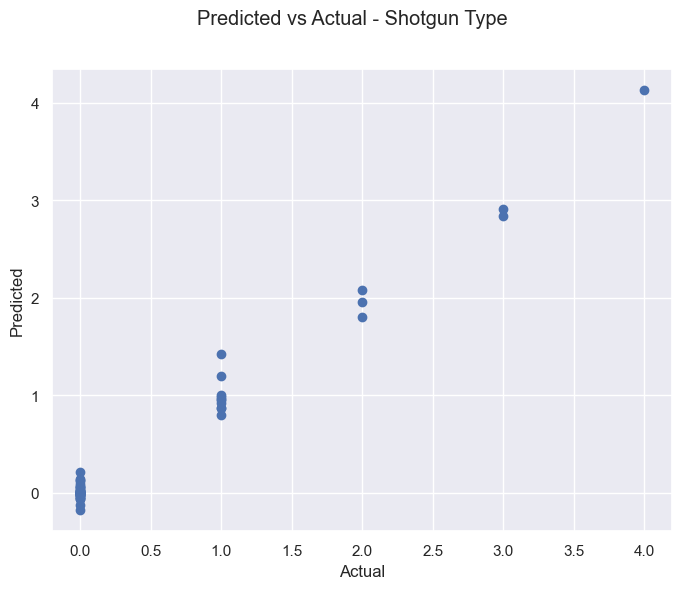

In [91]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Shotgun Type")

### Automatic Gun as Response Variable

In [92]:
y = gun_mute['Automatic']
X = gun_mute.drop(columns = ['Automatic'])

In [93]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(8)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.9127695814557761
RMSE mean:
 0.4071685254509819

DecisionTreeRegressor(random_state=42)
r2 mean:
 -1.7454602903883902
RMSE mean:
 2.5015000176036364

RandomForestRegressor(random_state=42)
r2 mean:
 -0.12546714978106208
RMSE mean:
 1.6042813822856918

Lasso()
r2 mean:
 -0.9258855122228317
RMSE mean:
 1.6062250313669193

Ridge()
r2 mean:
 0.8225475448986082
RMSE mean:
 0.6820146448649784


From the models, we see that linear regression is the best choice as a model where number of automatic guns is the response variable. We obtained an R2 value of 0.913 and an RSME value of 0.407.

In [94]:
best_model = LinearRegression().fit(X,y)
y_pred=best_model.predict(X)

In [95]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.73


#### Predicted vs Actual - Automatic Gun Type

Text(0.5, 0.98, 'Predicted vs Actual - Automatic Guns')

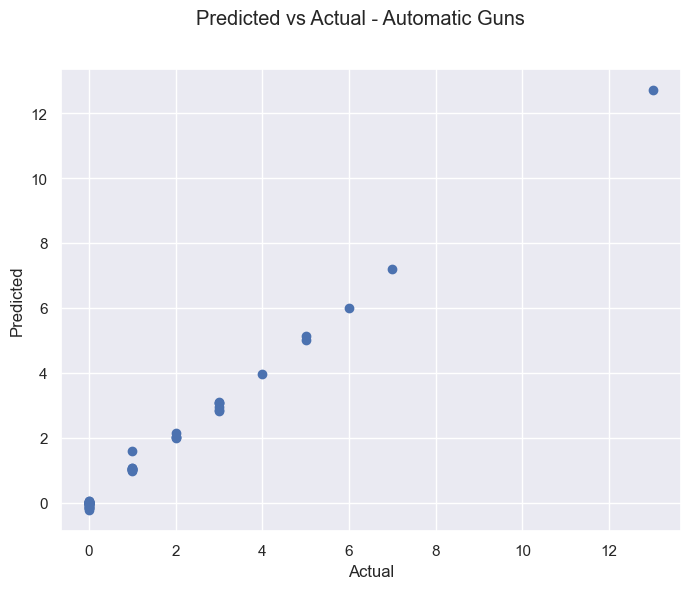

In [96]:
plt.figure(figsize = (8,6))
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Automatic Guns")

### Other Gun as Response Variable

In [97]:
y = gun_mute['Other']
X = gun_mute.drop(columns = ['Other'])

In [98]:
import random
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

random.seed(3254)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 -0.21286545805046136
RMSE mean:
 0.30589949430910013

DecisionTreeRegressor(random_state=42)
r2 mean:
 0.45
RMSE mean:
 0.23823446089974126

RandomForestRegressor(random_state=42)
r2 mean:
 0.05733750000000006
RMSE mean:
 0.18657707124895812

Lasso()
r2 mean:
 -0.04001065247854951
RMSE mean:
 0.12286293894545372

Ridge()
r2 mean:
 0.024845441022004665
RMSE mean:
 0.21068066236465496


From the models, we see that RandomForest is the best choice as a model where number of other guns is the response variable. We obtained an R2 value of 0.0573 and an RSME value of 0.187. We will saay that this is not a very great model by the predicted vs actual graph.

In [99]:
best_model = RandomForestRegressor(random_state=42).fit(X,y)
y_pred=best_model.predict(X)

In [100]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 81.93


#### Predicted vs Actual - Other Gun Type

Text(0.5, 0.98, 'Predicted vs Actual - Other Guns')

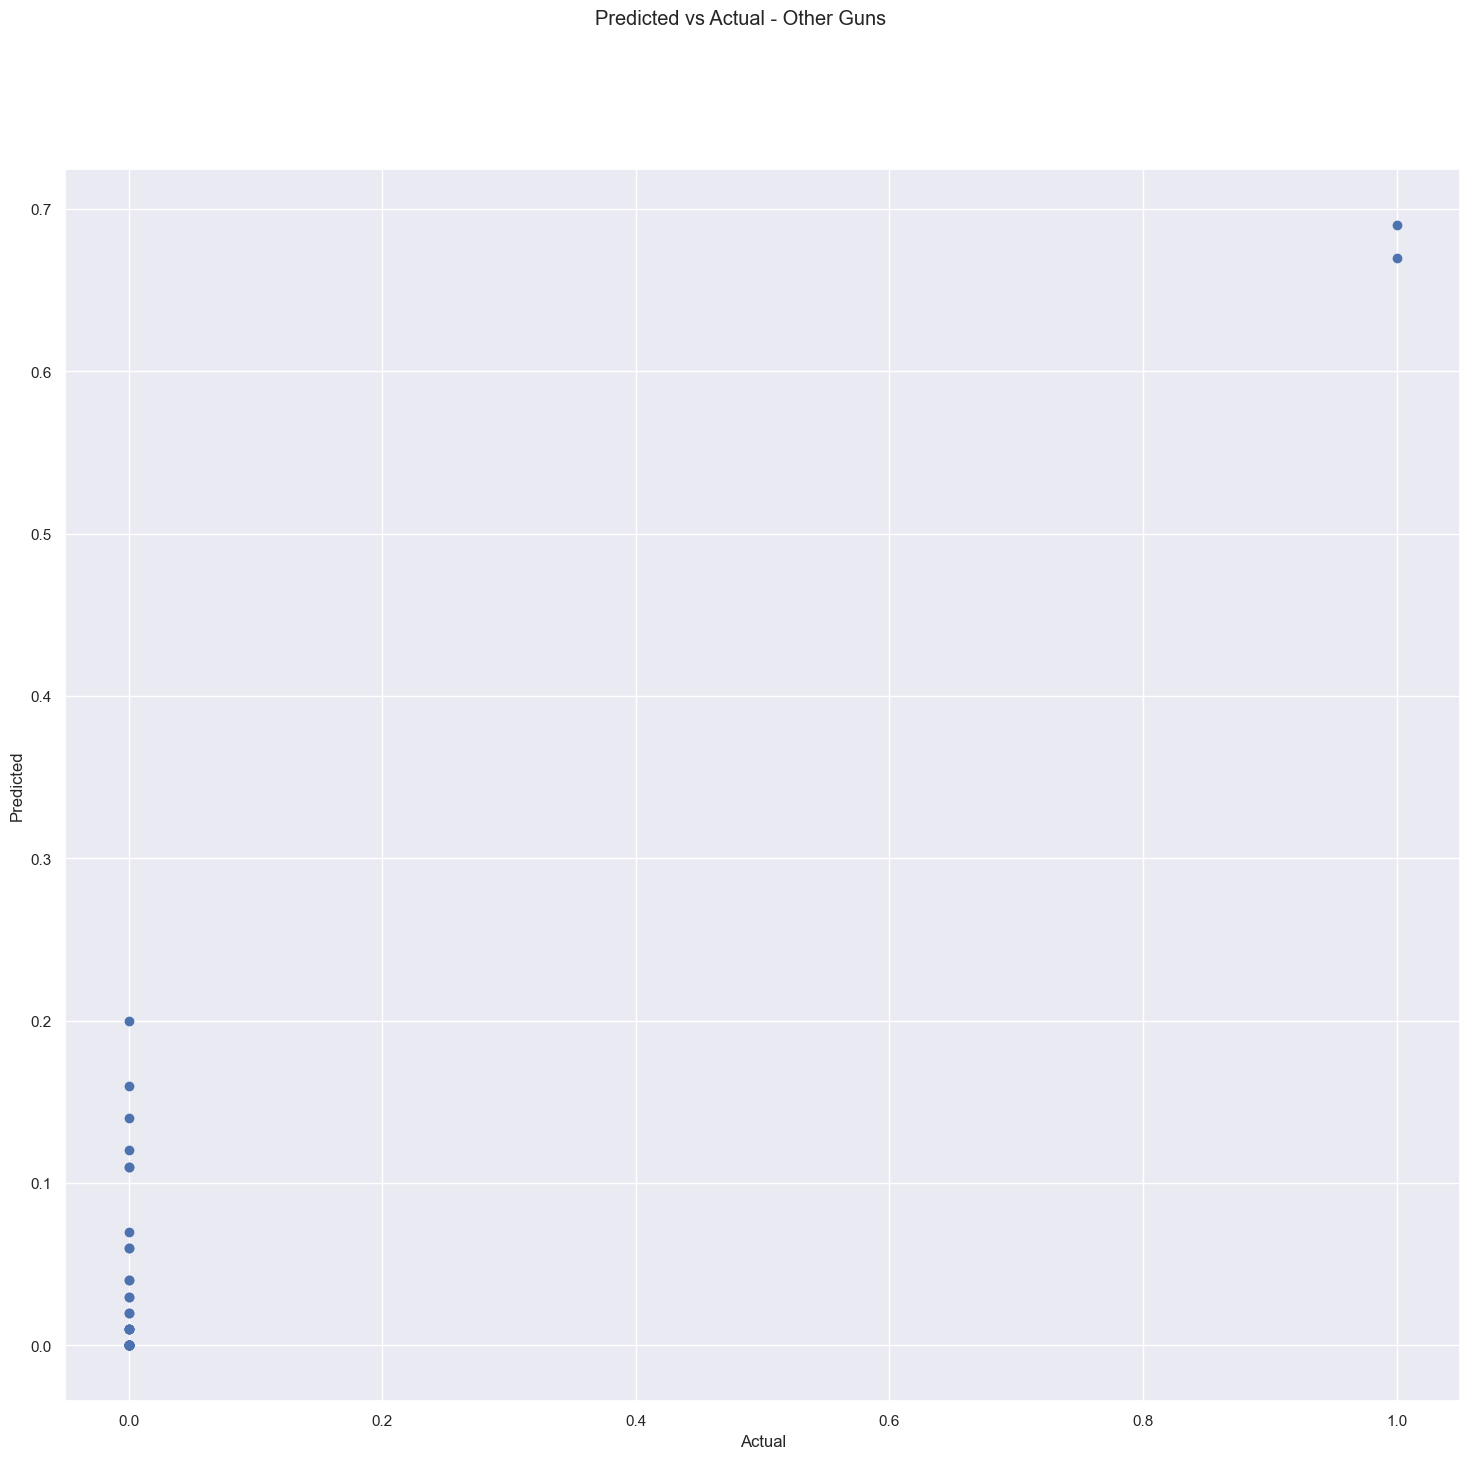

In [101]:
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual - Other Guns")

# Conclusion

